In [1]:
%matplotlib inline

# Imports
import gc
import matplotlib.pyplot as plt
import numpy
import os
import pandas
import scipy
import scipy.spatial.distance
import seaborn
seaborn.set_style("darkgrid")

In [2]:
# Setup PLOS ONE font dictionary
title_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 14}
axis_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 12}
plos_one_fontdict = axis_plos_one_fontdict

# Filing metadata

In [3]:
filing_df = pandas.read_csv("../data/input/all_filing_list.csv", low_memory=False)
filing_df.loc[:, "year_filed"] = filing_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
print(filing_df.shape)

(181755, 13)


# Agency Analysis

In [4]:
# Read agency data
agency_df = pandas.read_csv("../data/output/agency_result_data.csv.gz", compression="gzip")
agency_df.loc[:, "year_filed"] = agency_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))

In [5]:
agency_df.head().T

0  \
company_cik                                                     929186   
company_name                              FIRST MERCURY FINANCIAL CORP   
date_filed                                                  2007-03-15   
segment_id                                                 8.46611e+06   
segment_file_name                                      c13119e10vk.htm   
segment_description  ANNUAL REPORT FOR FISCAL YEAR ENDED DECEMBER 3...   
segment_type                                                      10-K   
agency                              Securities and Exchange Commission   
year_filed                                                        2007   

                                                                     1  \
company_cik                                                     929186   
company_name                              FIRST MERCURY FINANCIAL CORP   
date_filed                                                  2007-03-15   
segment_id                                                 8.46611e+06   
segment_file_name                                      c13119e10vk.htm   
segment_description  ANNUAL REPORT FOR FISCAL YEAR ENDED DECEMBER 3...   
segment_type                                                      10-K   
agency                              Securities and Exchange Commission   
year_filed                                                        2007   

                                                                     2  \
company_cik                                                     929186   
company_name                              FIRST MERCURY FINANCIAL CORP   
date_filed                                                  2007-03-15   
segment_id                                                 8.46611e+06   
segment_file_name                                      c13119e10vk.htm   
segment_description  ANNUAL REPORT FOR FISCAL YEAR ENDED DECEMBER 3...   
segment_type                                                      10-K   
agency                              Securities and Exchange Commission   
year_filed                                                        2007   

                                                                     3  \
company_cik                                                     929186   
company_name                              FIRST MERCURY FINANCIAL CORP   
date_filed                                                  2007-03-15   
segment_id                                                 8.46611e+06   
segment_file_name                                      c13119e10vk.htm   
segment_description  ANNUAL REPORT FOR FISCAL YEAR ENDED DECEMBER 3...   
segment_type                                                      10-K   
agency                              Securities and Exchange Commission   
year_filed                                                        2007   

                                                                     4  
company_cik                                                     929186  
company_name                              FIRST MERCURY FINANCIAL CORP  
date_filed                                                  2007-03-15  
segment_id                                                 8.46611e+06  
segment_file_name                                      c13119e10vk.htm  
segment_description  ANNUAL REPORT FOR FISCAL YEAR ENDED DECEMBER 3...  
segment_type                                                      10-K  
agency                              Securities and Exchange Commission  
year_filed                                                        2007

In [6]:
agency_df["agency"].value_counts()

Securities and Exchange Commission                   831339
Environmental Protection Agency                       44928
Food and Drug Administration                          36078
Department of Justice                                 30492
Federal Trade Commission                              20135
Federal Energy Regulatory Commission                  20055
Department of Defense                                 19329
Department of Energy                                  18873
Federal Communications Commission                     16229
Department of Education                               15471
Department of Transportation                          15123
Department of Health and Human Services               14337
Commodity Futures Trading Commission                  13395
Department of the Treasury                            11436
Department of Agriculture                              9949
Small Business Administration                          9506
Department of Commerce                  

In [7]:
agency_df.shape

(1255664, 9)

In [8]:
agency_df.loc[agency_df["agency"] != "Securities and Exchange Commission", :].shape

(424325, 9)

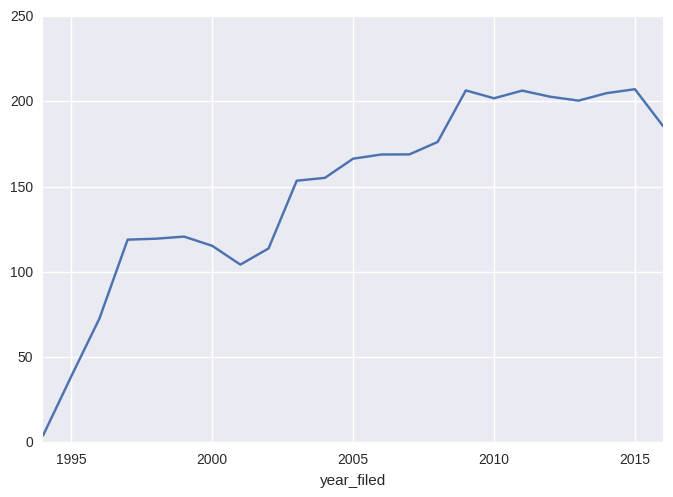

In [9]:
agency_presence_per_year = agency_df.groupby(["year_filed", "agency"])["company_cik"].nunique()\
    .unstack().fillna(0).astype(int)
agency_presence_per_year.mean(axis=1).plot()

In [10]:
# Get counts per year
agency_per_year = agency_df.groupby(["year_filed", "agency"])["company_cik"].count()\
    .unstack().fillna(0).astype(int)
agency_per_year.to_csv("../data/output/agency_count_per_year.csv", encoding="utf-8")
agency_per_year.head()

agency      Advanced Research Projects Agency  \
year_filed                                      
1994                                        2   
1995                                        7   
1996                                       16   
1997                                       46   
1998                                       54   

agency      Alcohol and Tobacco Tax and Trade Bureau  \
year_filed                                             
1994                                               0   
1995                                               0   
1996                                               0   
1997                                               0   
1998                                               0   

agency      American Battle Monuments Commission  \
year_filed                                         
1994                                           0   
1995                                           0   
1996                                           0   
1997                                           0   
1998                                           0   

agency      Appalachian Regional Commission  Arctic Research Commission  \
year_filed                                                                
1994                                      0                           0   
1995                                      0                           0   
1996                                      0                           0   
1997                                      0                           0   
1998                                      0                           0   

agency      Bonneville Power Administration  Census Bureau  \
year_filed                                                   
1994                                      1              2   
1995                                      7             12   
1996                                     36             33   
1997                                     33             82   
1998                                     41             68   

agency      Central Intelligence Agency  Commodity Futures Trading Commission  \
year_filed                                                                      
1994                                  0                                     3   
1995                                  3                                    22   
1996                                  5                                    63   
1997                                  6                                   113   
1998                                  7                                   117   

agency      Consumer Financial Protection Bureau  \
year_filed                                         
1994                                           0   
1995                                           0   
1996                                           0   
1997                                           0   
1998                                           0   

agency                    ...                  Social Security Administration  \
year_filed                ...                                                   
1994                      ...                                               2   
1995                      ...                                              11   
1996                      ...                                              18   
1997                      ...                                              32   
1998                      ...                                              38   

agency      Southeastern Power Administration  \
year_filed                                      
1994                                        0   
1995                                        0   
1996                                        5   
1997                                        6   
1998                                       34   

agency      Southwestern Power Administration  \
year_filed                                 

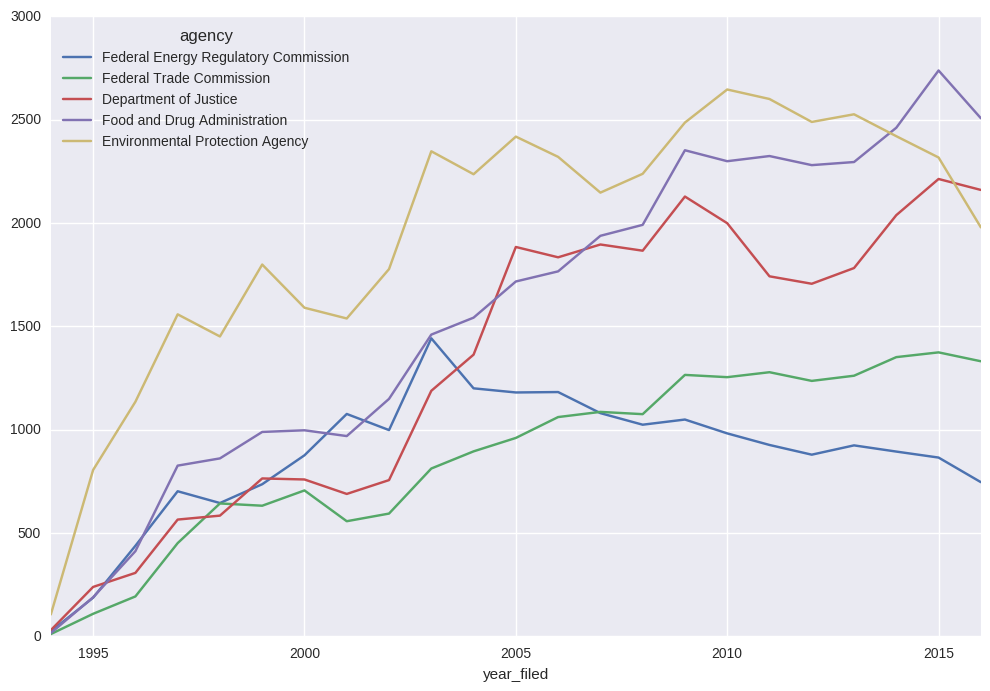

In [11]:
agency_plot_list = [c for c in agency_per_year.columns if c not in ["Securities and Exchange Commission"]]
top_agency_list = agency_per_year.loc[:, agency_plot_list].sum().sort_values().tail(5).index
agency_per_year.loc[:, top_agency_list].plot(figsize=(12,8))

In [12]:
filings_per_year  = agency_df.groupby("year_filed")["segment_id"].nunique()
cik_per_year  = agency_df.groupby("year_filed")["company_cik"].nunique()
references_per_year = agency_df.groupby("year_filed")["company_cik"].count()

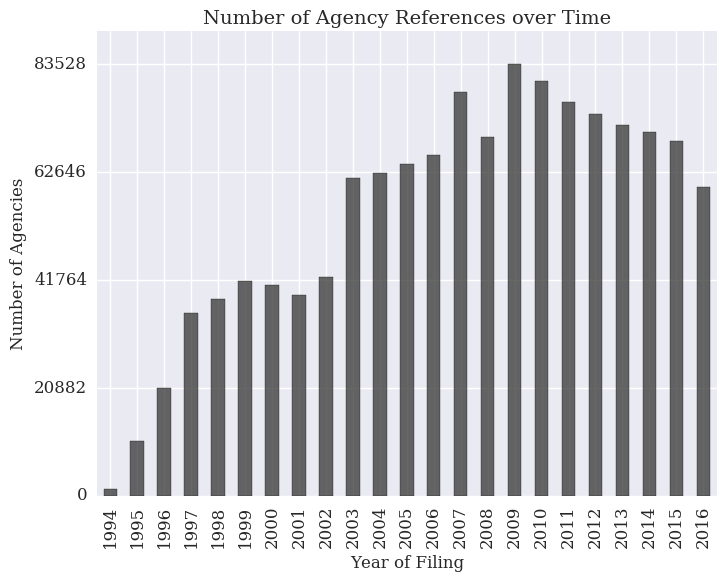

In [13]:
# Build normalize dataframe
agency_count_per_year = agency_per_year.sum(axis=1)
f, ax = plt.subplots(figsize=(8, 6))
agency_count_per_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Agency References over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=axis_plos_one_fontdict)
ax.set_xticklabels(list(map(str, agency_count_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of Agencies", fontdict=axis_plos_one_fontdict)
y_tick_list = numpy.linspace(0, agency_count_per_year.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "agency_count_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "agency_count_ts.pdf"), dpi=300)

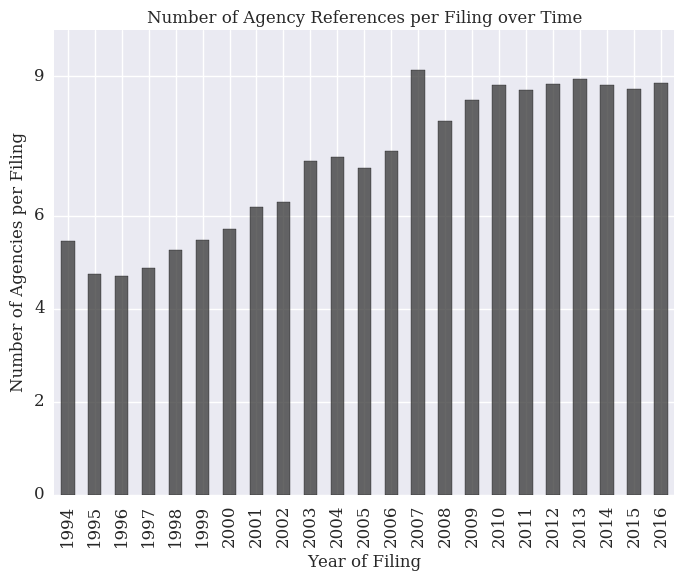

In [14]:
# Build normalize dataframe
agency_per_filing_year = agency_per_year.copy()
for i in agency_per_filing_year.index:
    agency_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_agency_per_filing_year = agency_per_filing_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
average_agency_per_filing_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Agency References per Filing over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, average_agency_per_filing_year.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of Agencies per Filing", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, average_agency_per_filing_year.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "agencies_per_filing.png"), dpi=300)
f.savefig(os.path.join("../figures/", "agencies_per_filing.pdf"), dpi=300)

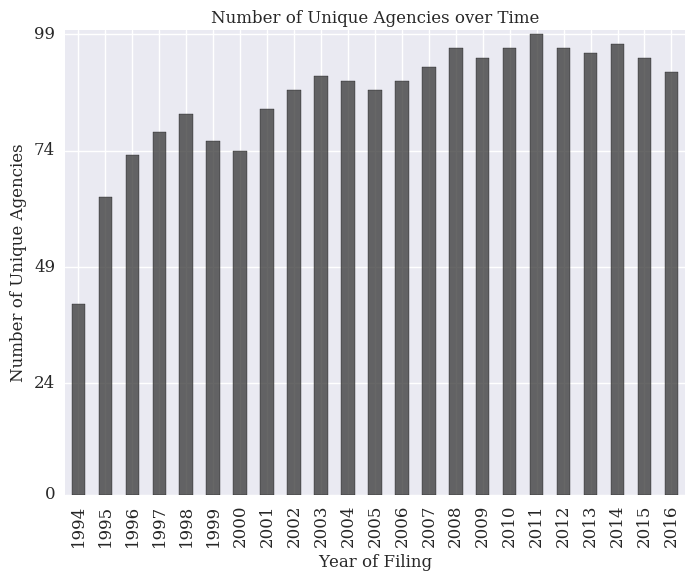

In [15]:
nunique_agency_per_year = agency_df.groupby("year_filed")["agency"].nunique()
    
f, ax = plt.subplots(figsize=(8, 6))
nunique_agency_per_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Unique Agencies over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, nunique_agency_per_year.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of Unique Agencies", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, nunique_agency_per_year.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "unique_agencies_per_year.png"), dpi=300)
f.savefig(os.path.join("../figures/", "unique_agencies_per_year.pdf"), dpi=300)

In [16]:
filing_agency_count_df = agency_df.groupby(["year_filed", "segment_id"])["agency"].nunique().unstack()
filing_agency_mean_ts = filing_agency_count_df.mean(axis=1)

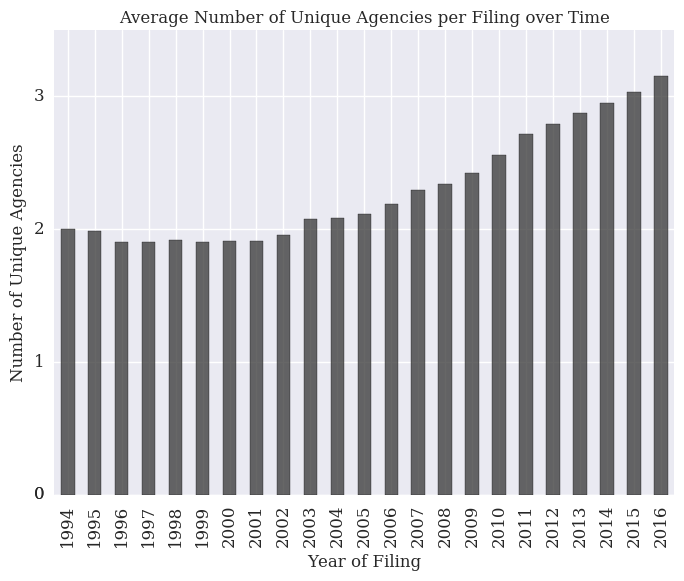

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
filing_agency_mean_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Number of Unique Agencies per Filing over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, filing_agency_mean_ts.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of Unique Agencies", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, filing_agency_mean_ts.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "filing_unique_agency_mean_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "filing_unique_agency_mean_ts.pdf"), dpi=300)

Advanced Research Projects Agency
Alcohol and Tobacco Tax and Trade Bureau
American Battle Monuments Commission
Appalachian Regional Commission
Arctic Research Commission
Bonneville Power Administration
Census Bureau
Central Intelligence Agency
Commodity Futures Trading Commission
Consumer Financial Protection Bureau
Consumer Product Safety Commission
Court Services and Offender Supervision Agency
Defense Advanced Research Projects Agency
Defense Commissary Agency
Defense Contract Audit Agency
Defense Contract Management Agency
Defense Health Agency
Defense Information Systems Agency
Defense Intelligence Agency
Defense Logistics Agency
Defense Security Cooperation Agency


/data/workspace/measuring-modeling-us-regulatory-ecosystem/env/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Defense Technology Security Administration
Defense Threat Reduction Agency
Delaware River Basin Commission
Department of Agriculture
Department of Commerce
Department of Defense
Department of Defense Education Activity
Department of Education
Department of Energy
Department of Health and Human Services
Department of Homeland Security
Department of Housing and Urban Development
Department of Justice
Department of Labor
Department of State
Department of Transportation
Department of Veterans Affairs
Department of the Air Force
Department of the Army
Department of the Interior
Department of the Navy
Department of the Treasury
Drug Enforcement Administration
Economic Development Administration
Economics and Statistics Administration
Election Assistance Commission
Employee Benefits Security Administration
Employment and Training Administration
Energy Information Administration
Environmental Protection Agency
Equal Employment Opportunity Commission
Farm Credit Administration
Farm Service Agen

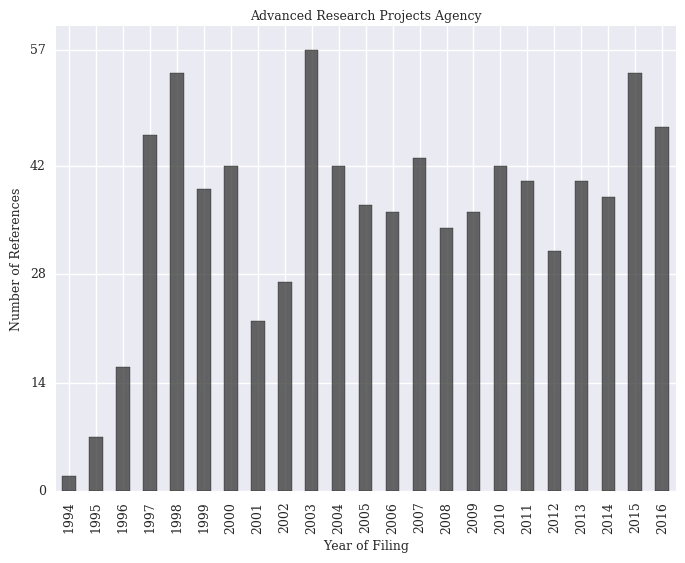

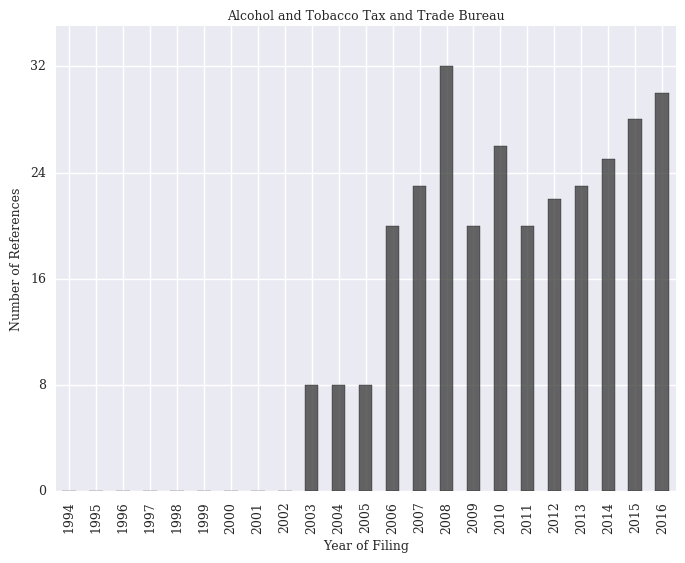

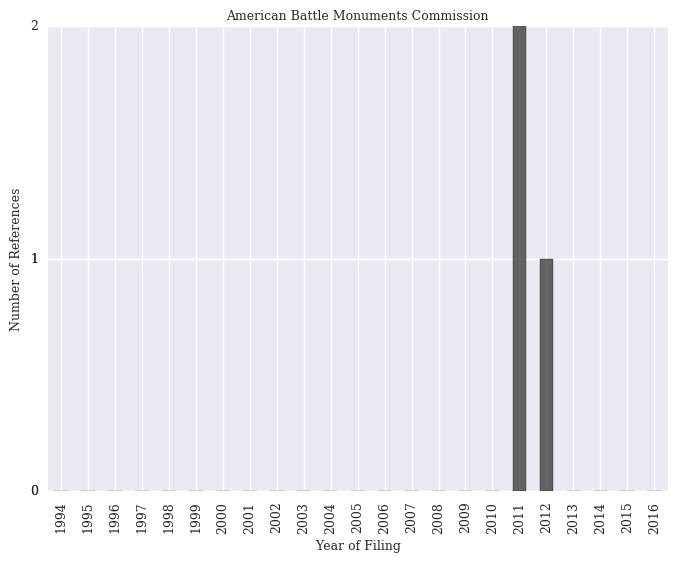

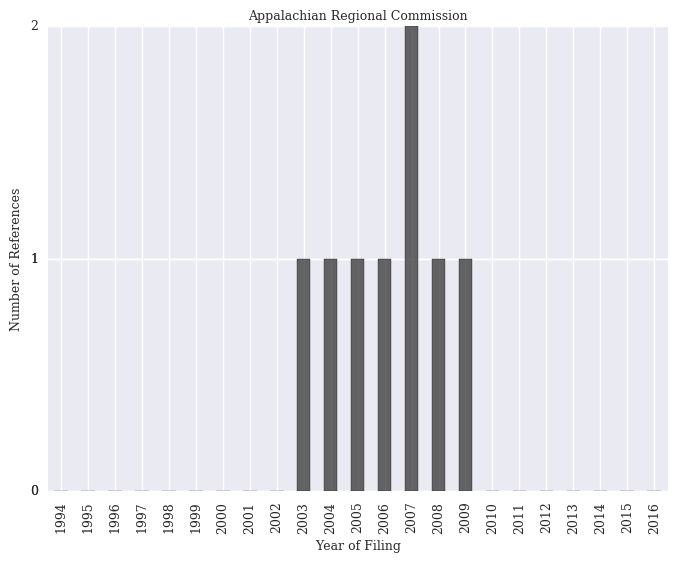

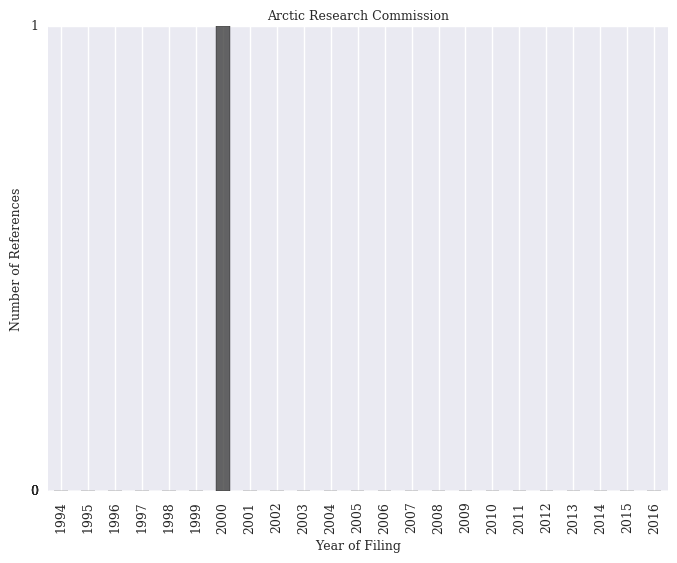

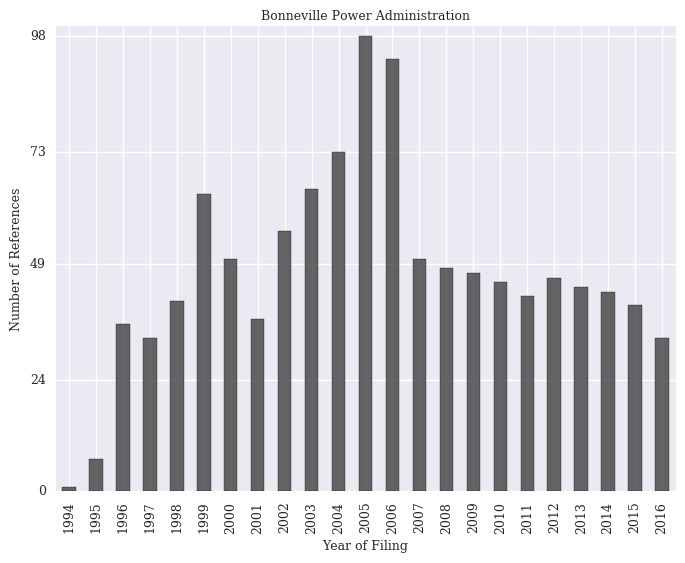

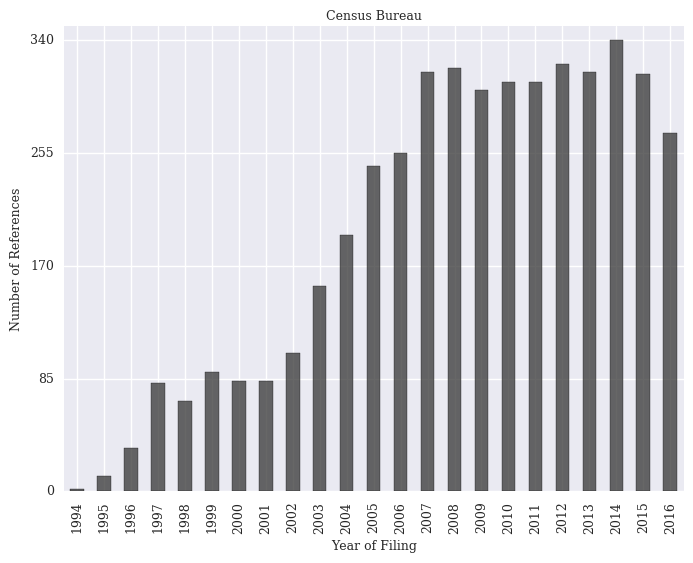

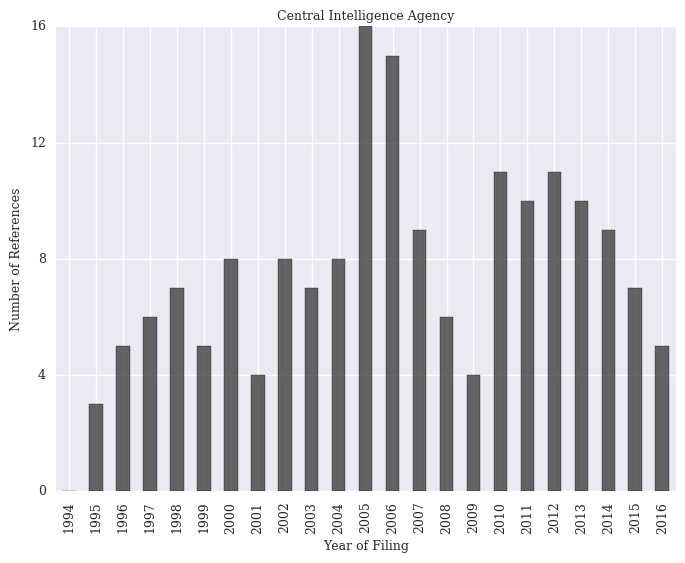

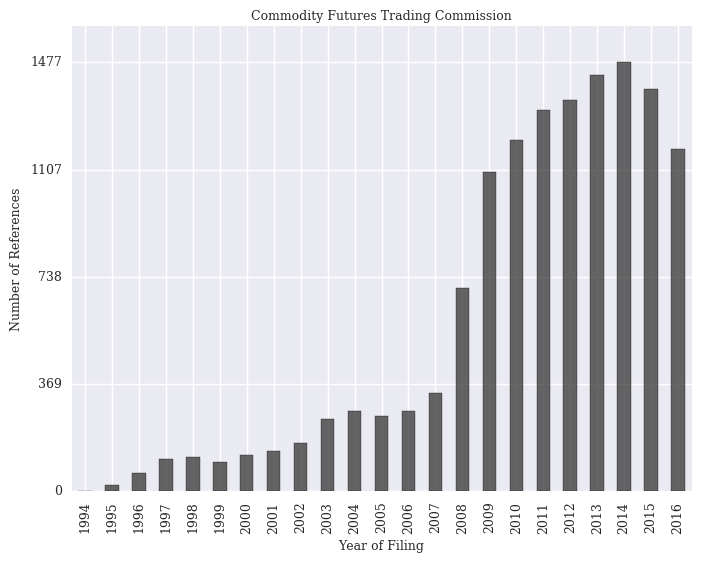

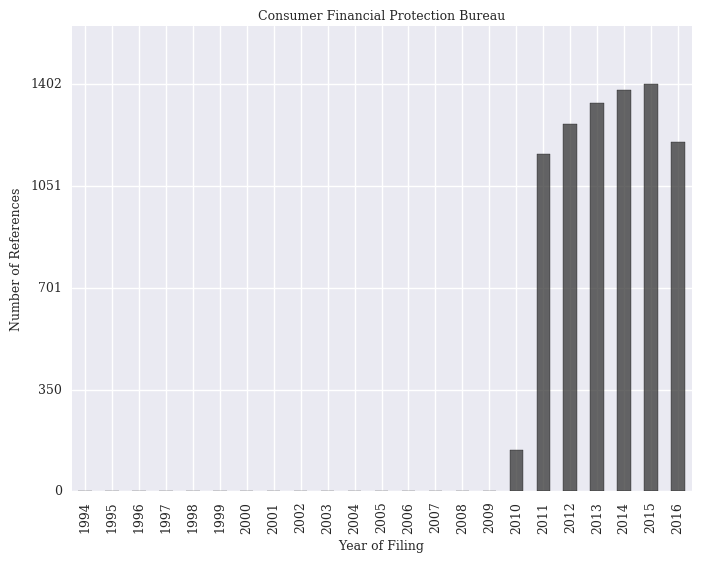

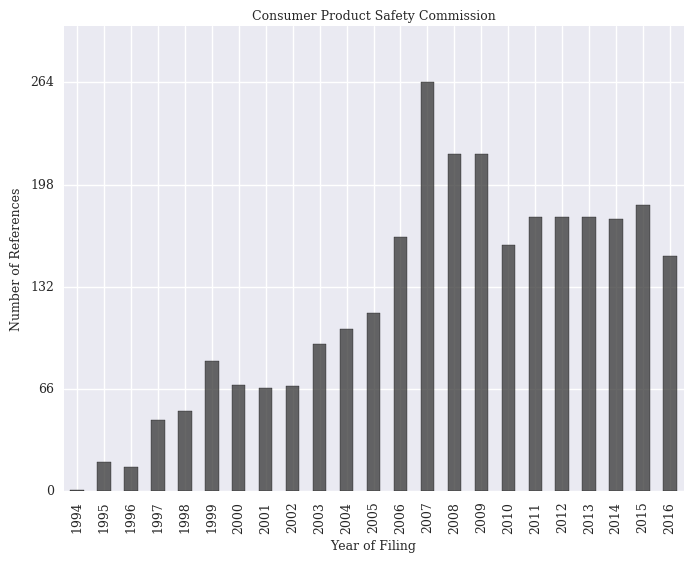

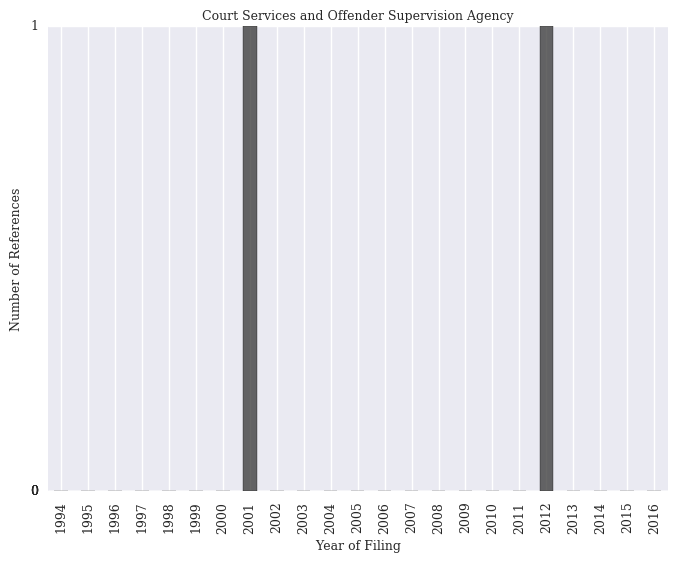

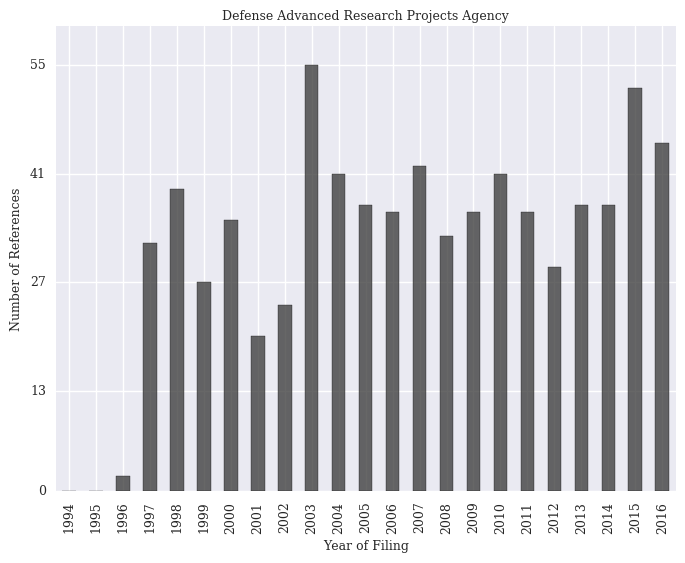

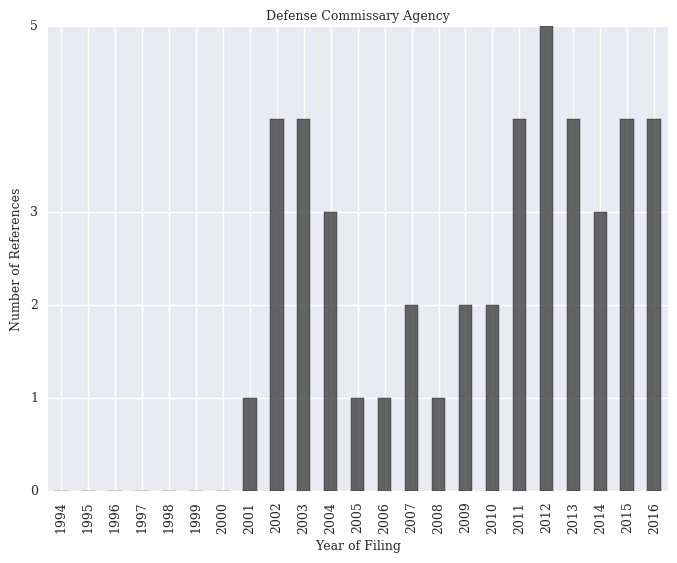

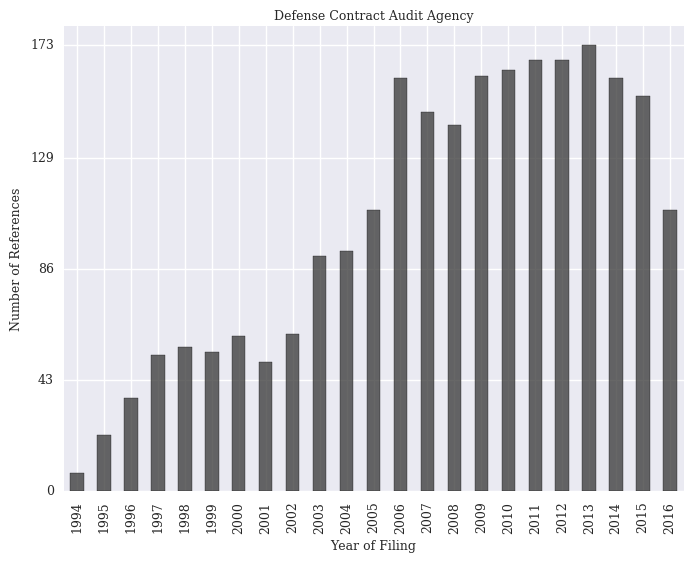

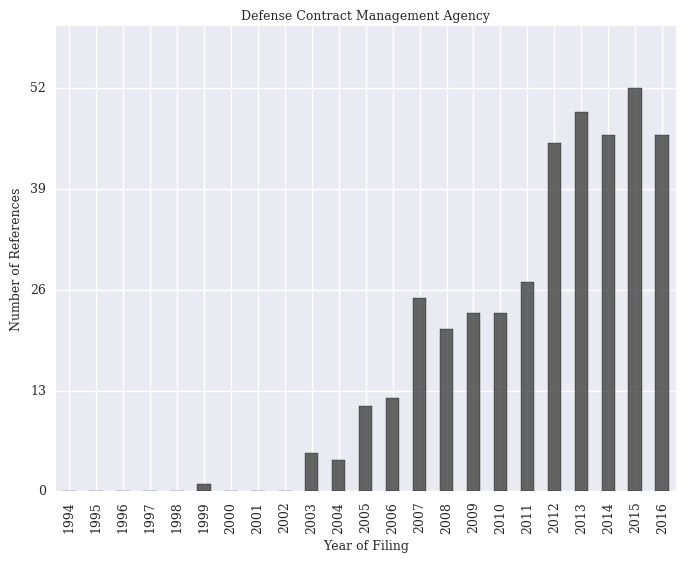

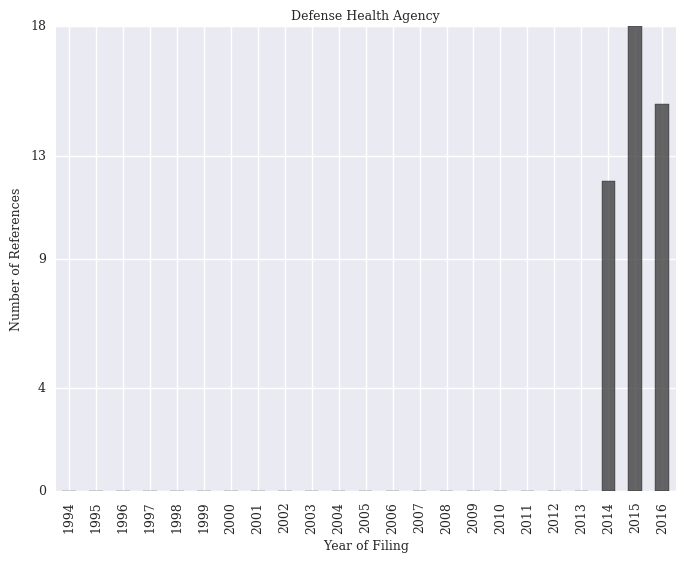

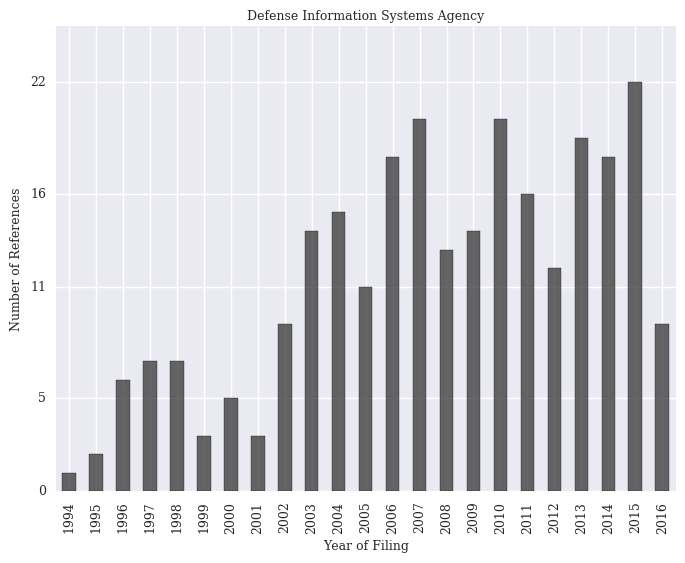

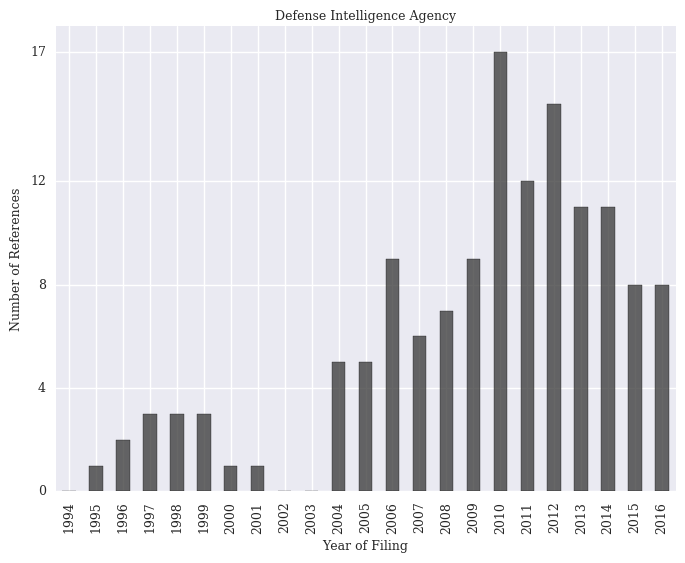

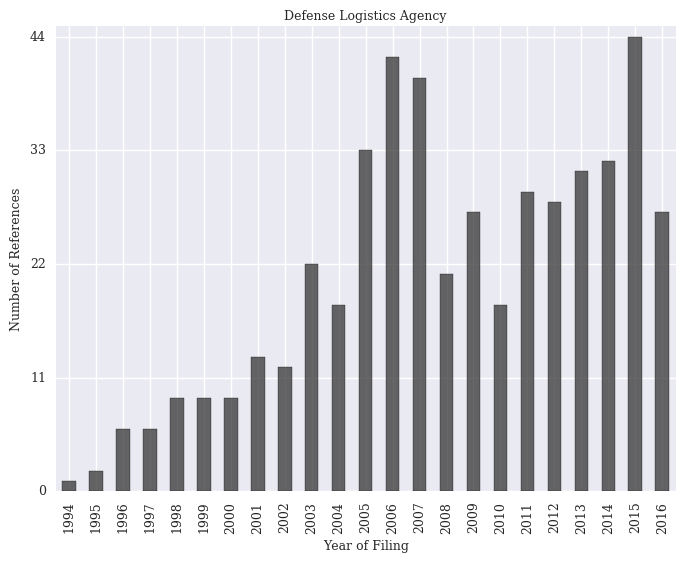

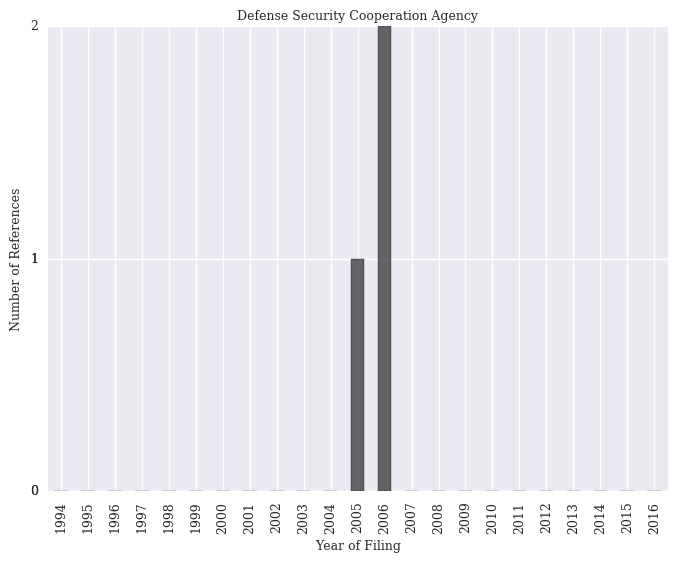

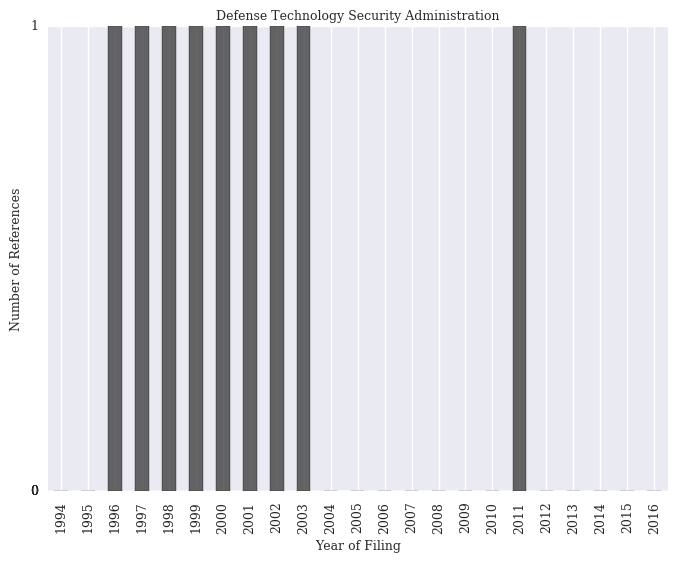

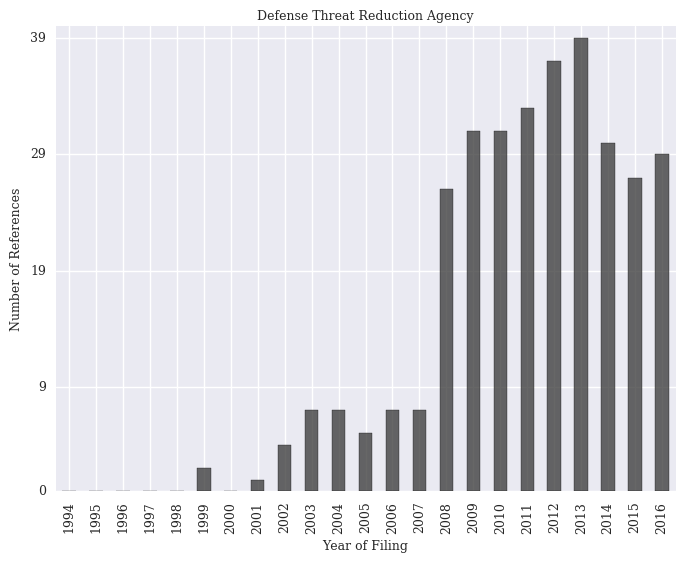

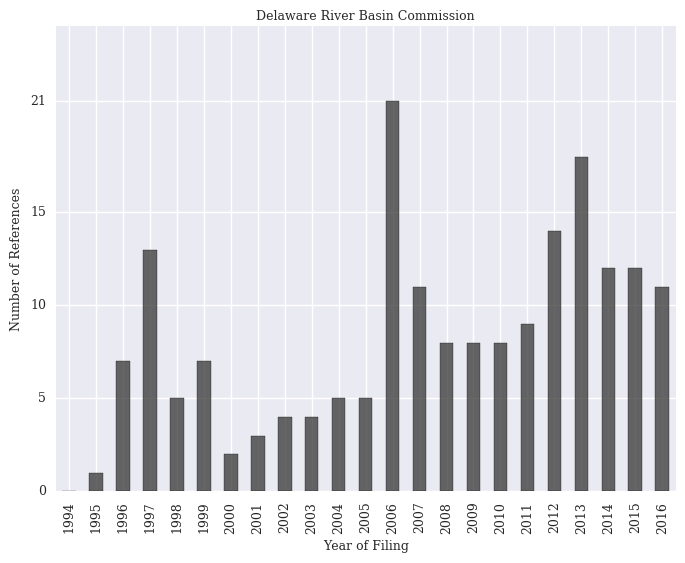

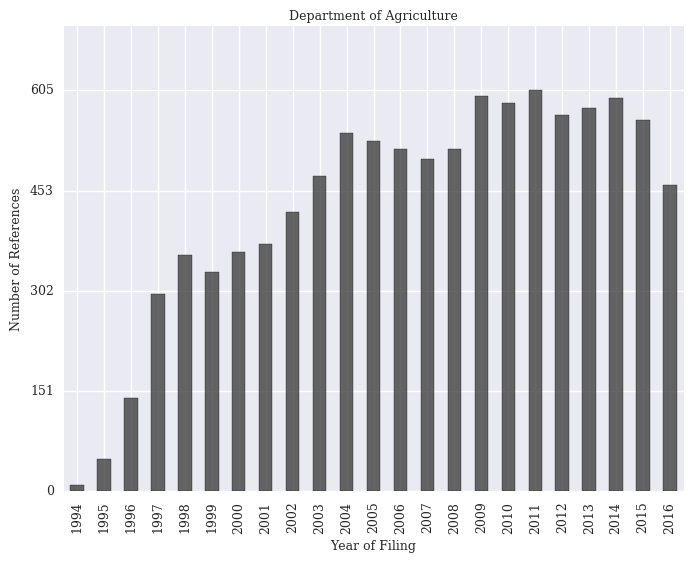

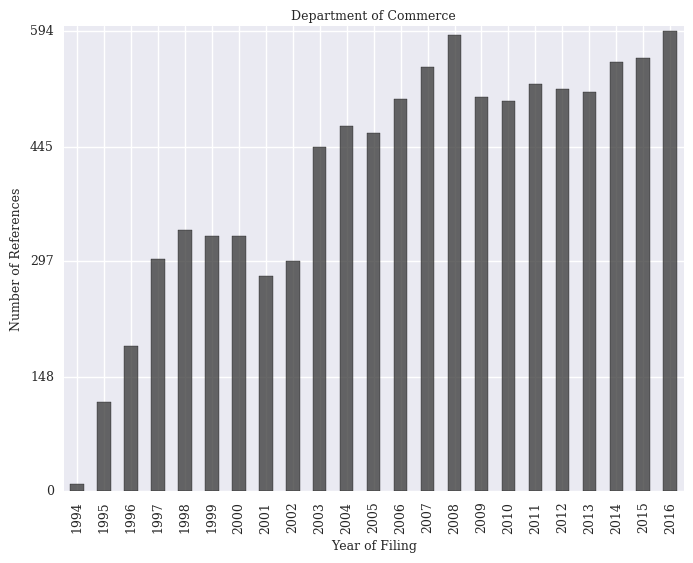

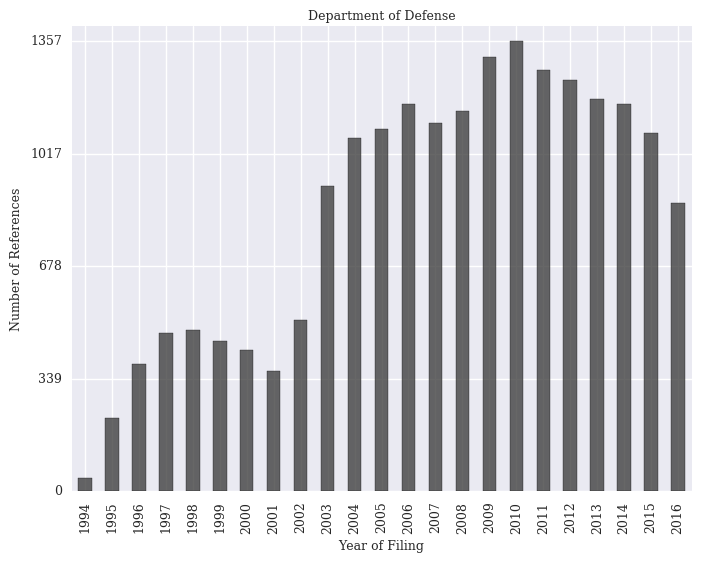

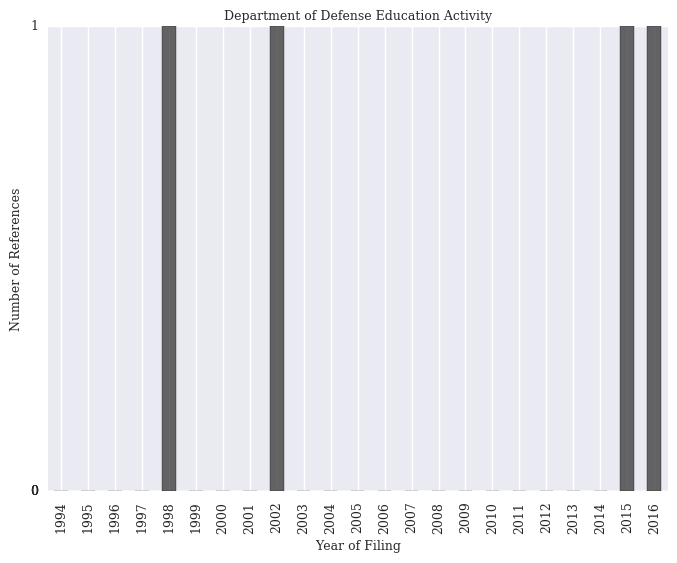

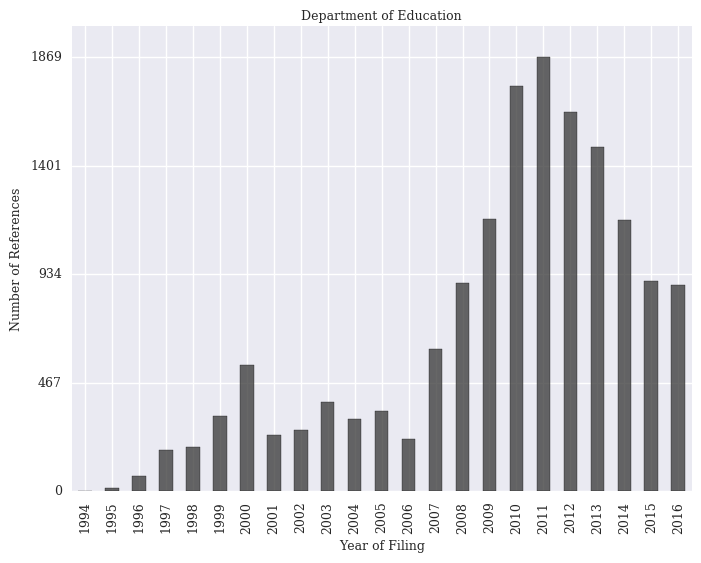

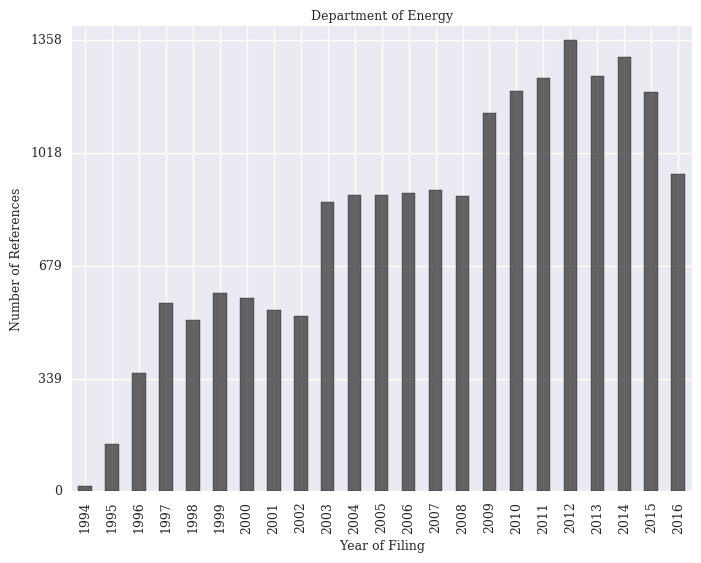

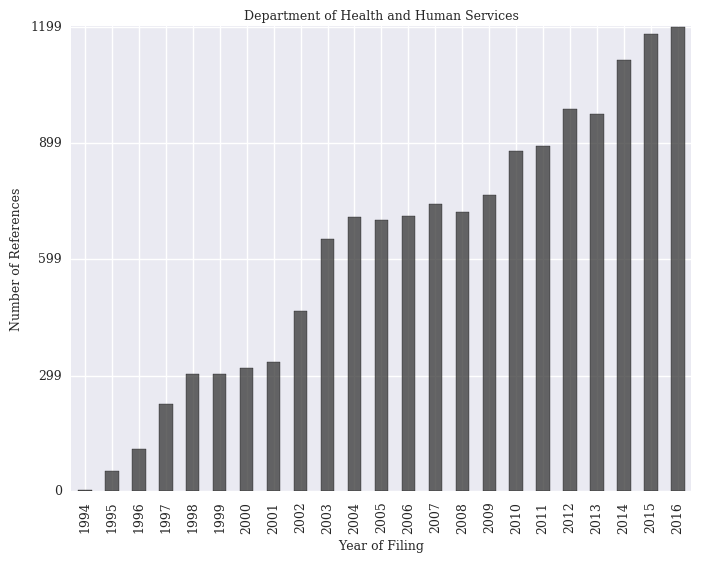

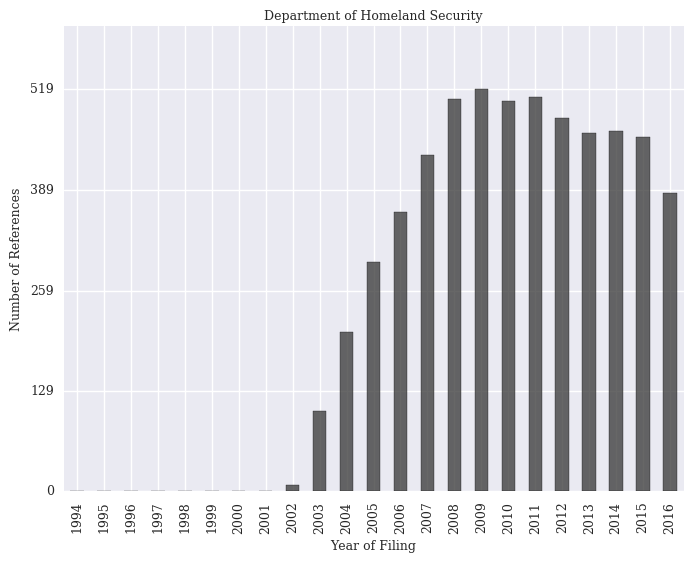

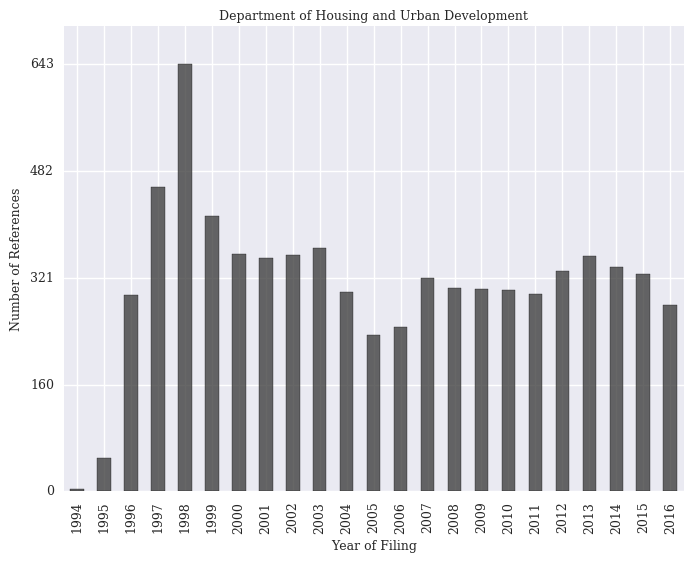

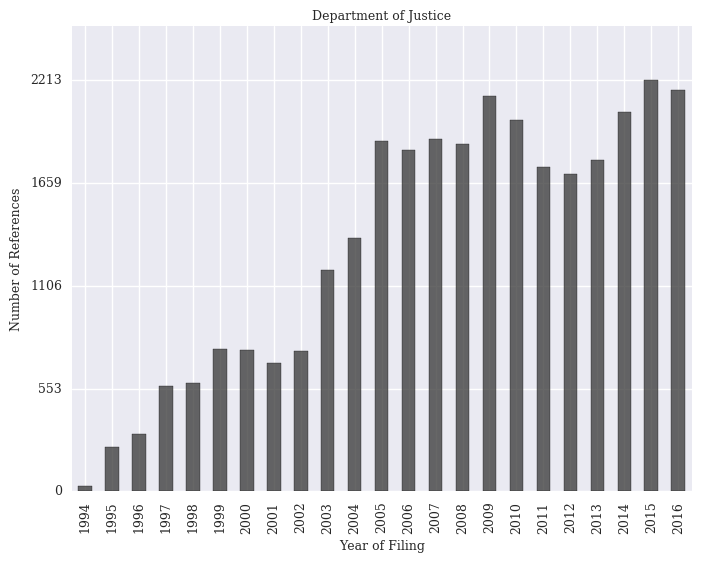

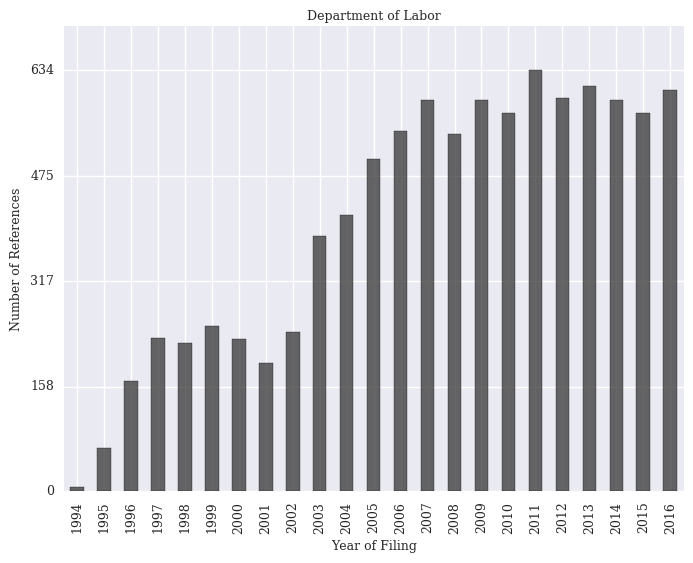

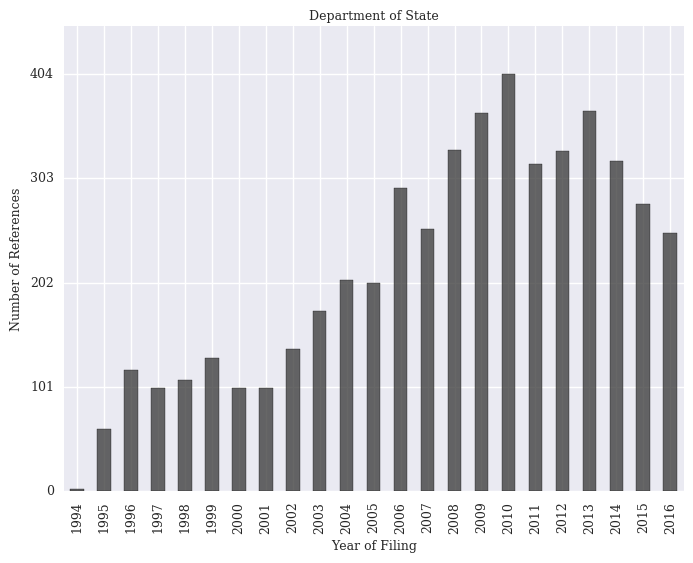

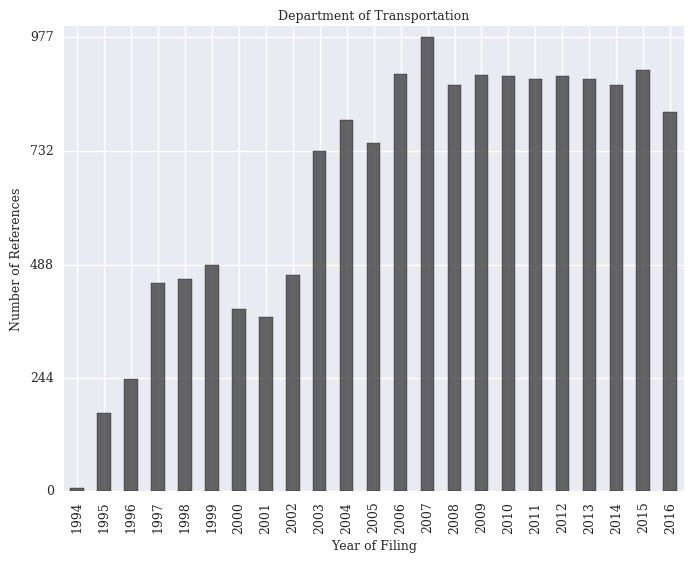

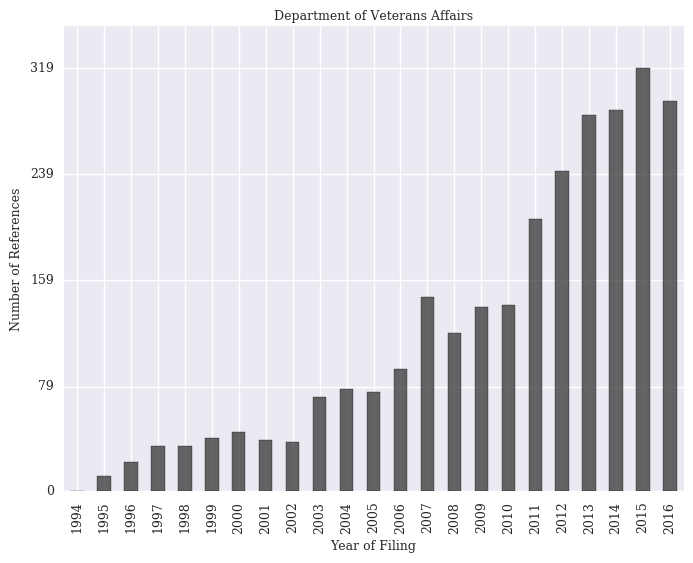

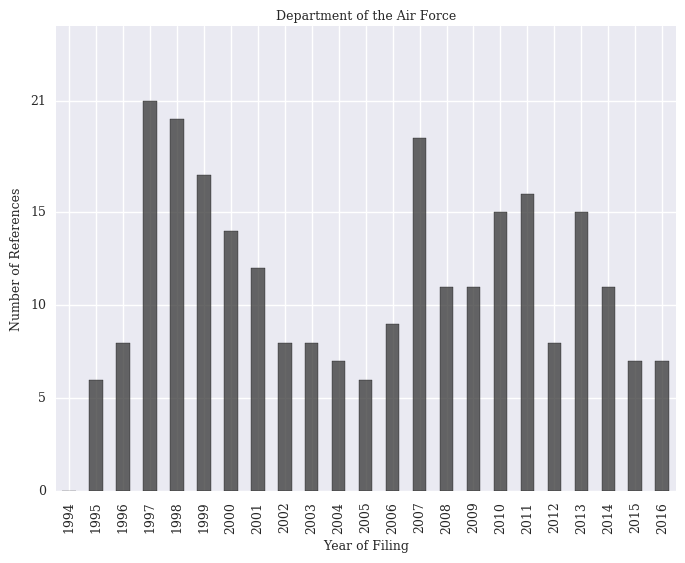

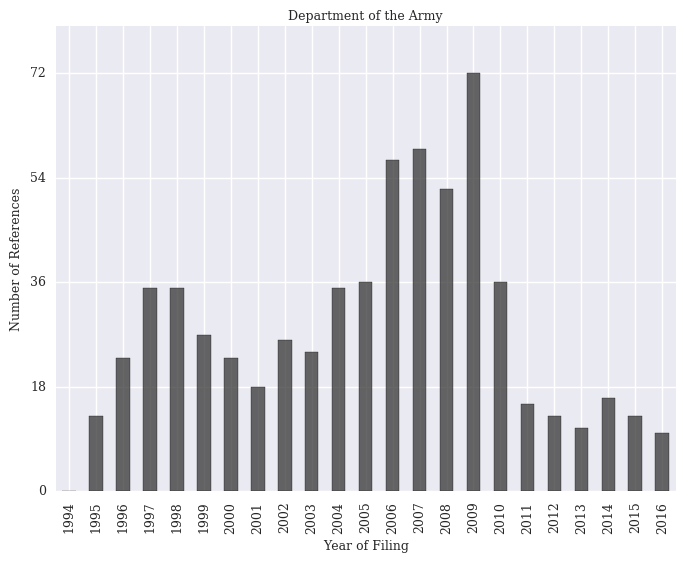

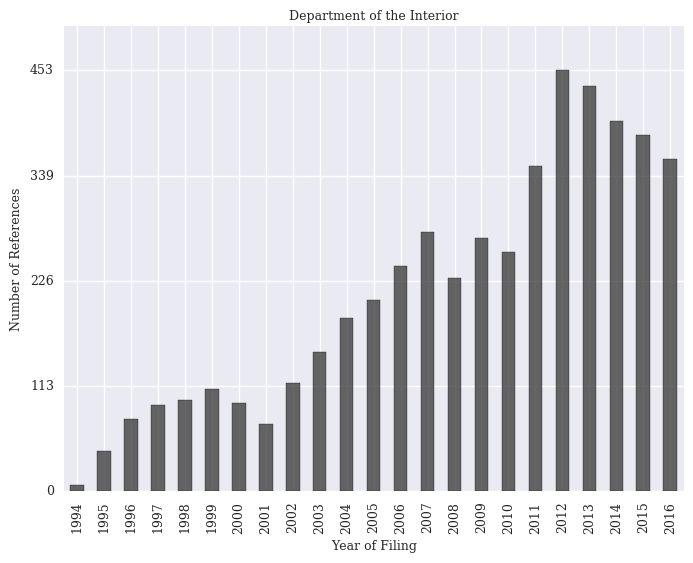

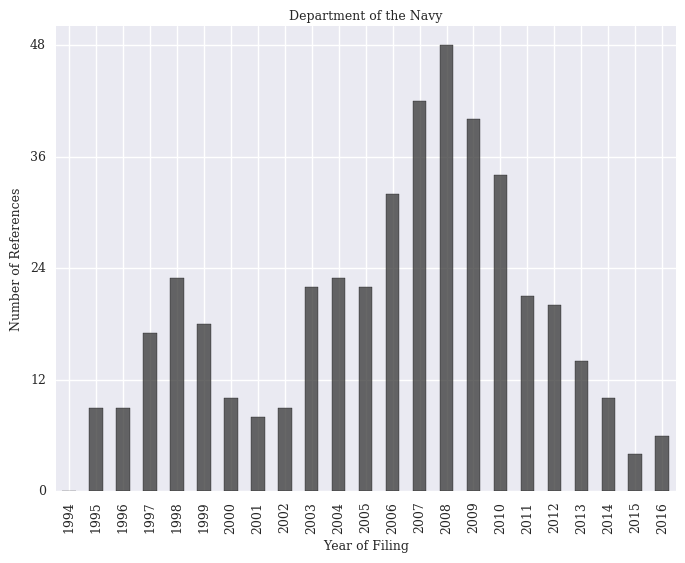

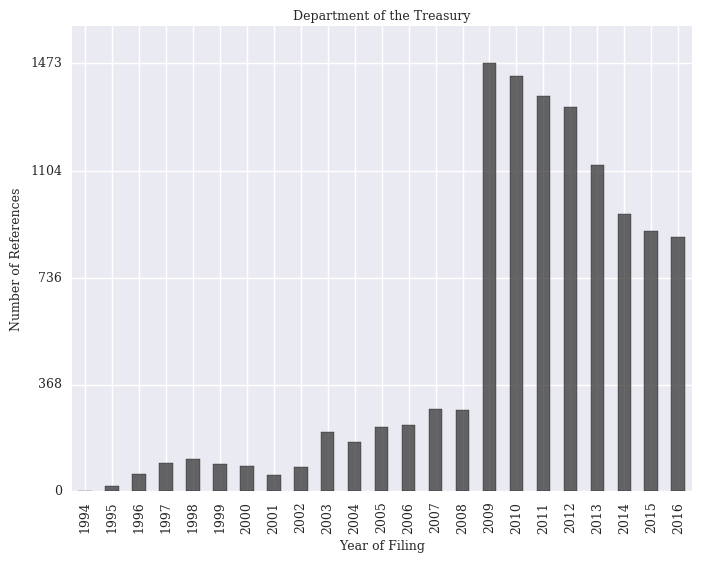

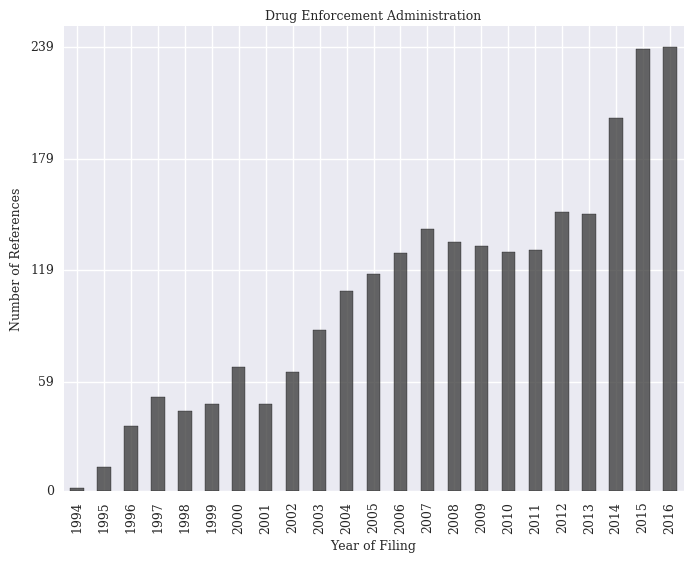

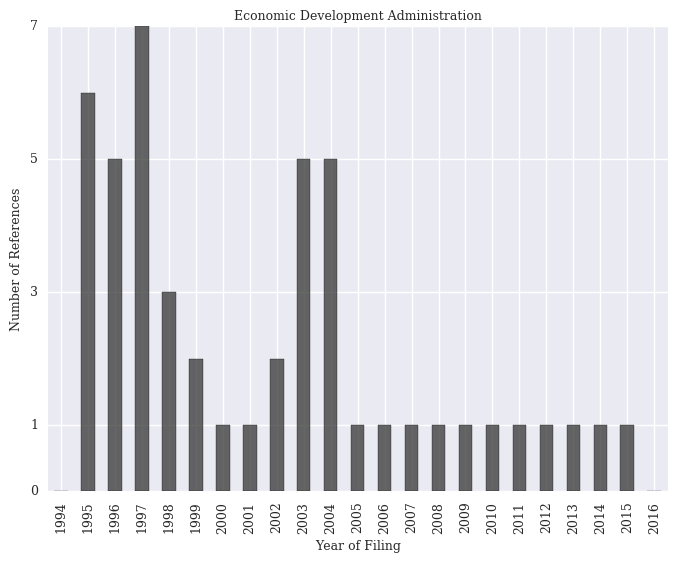

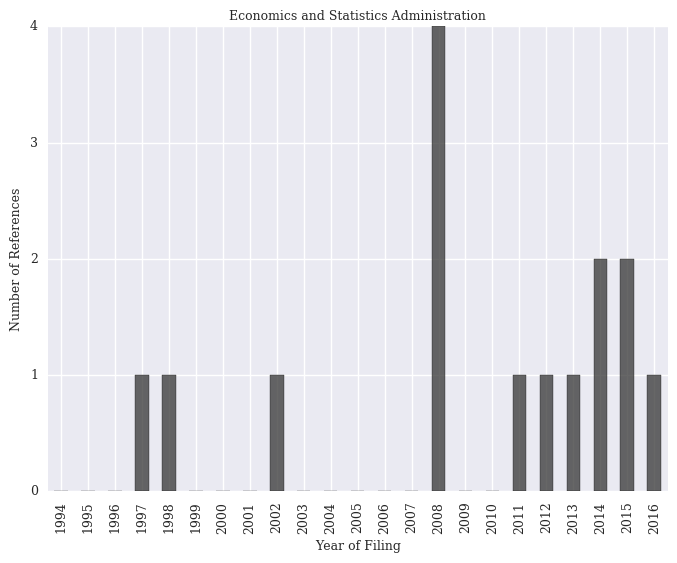

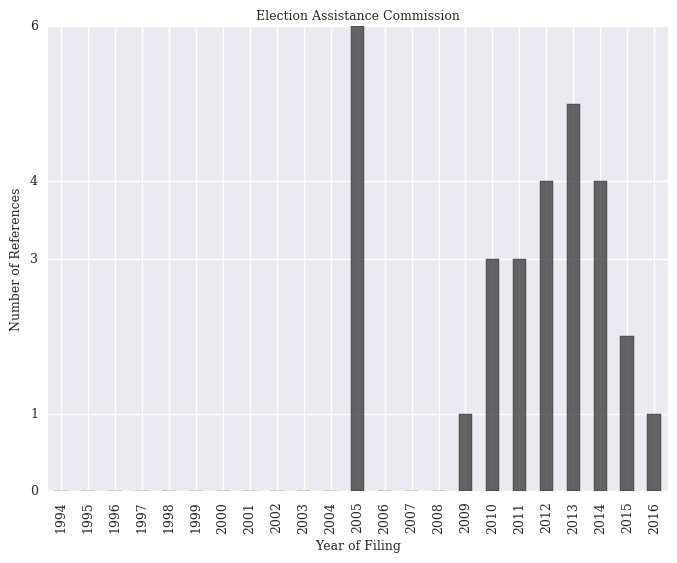

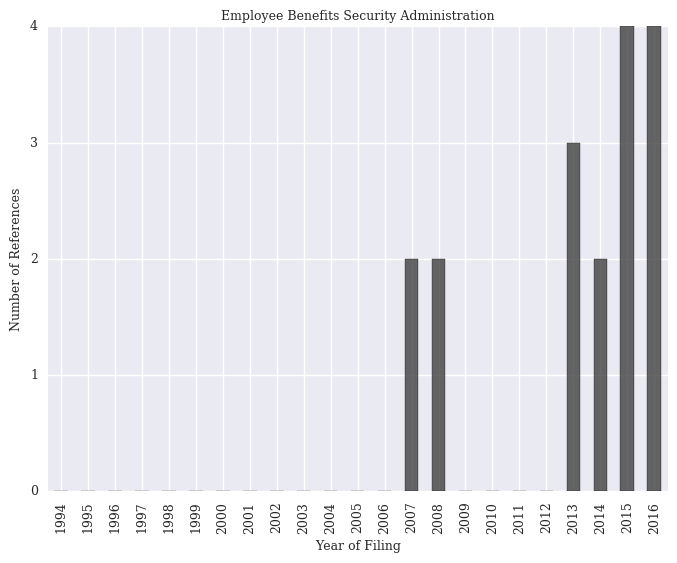

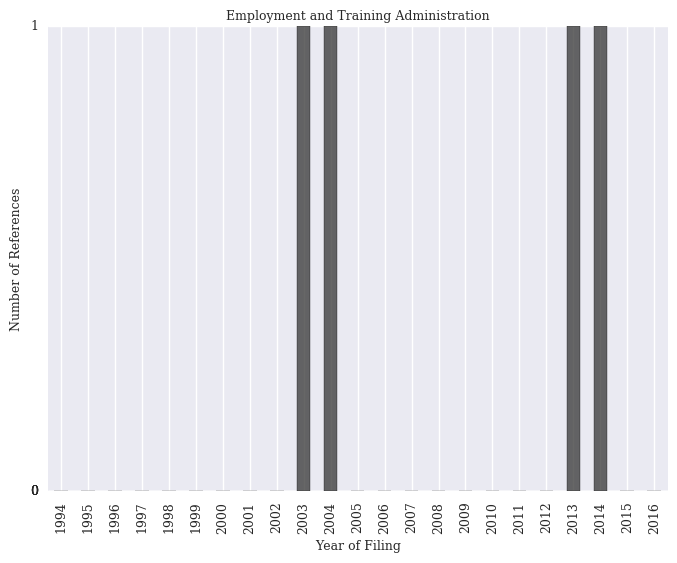

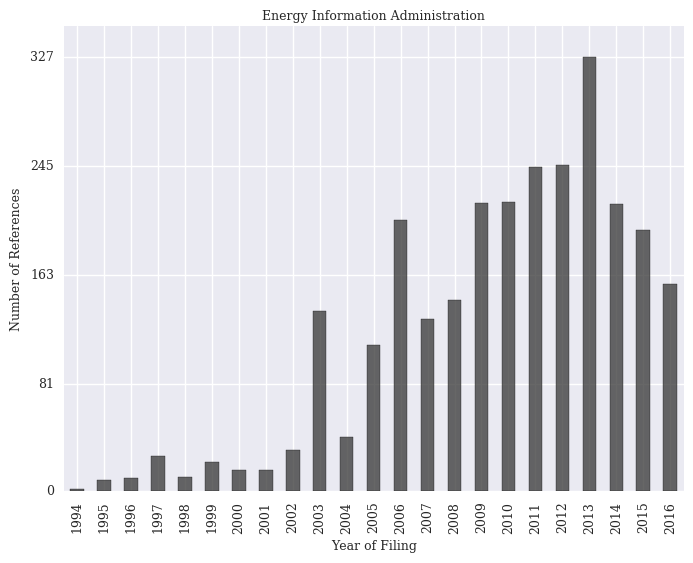

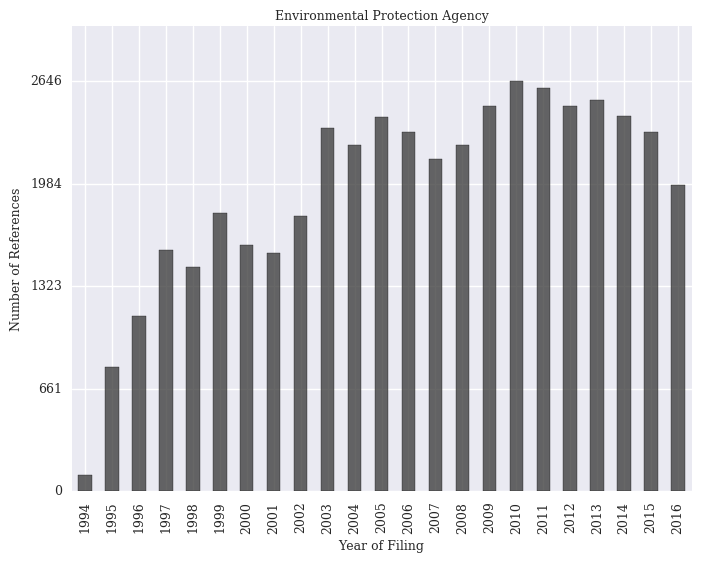

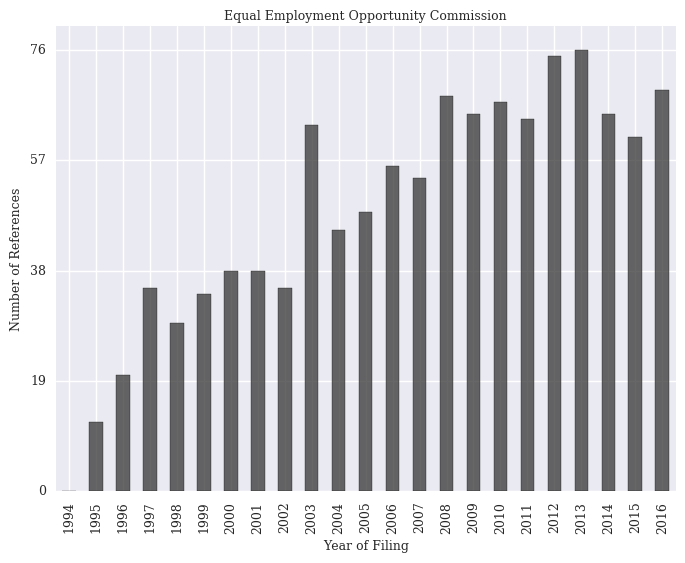

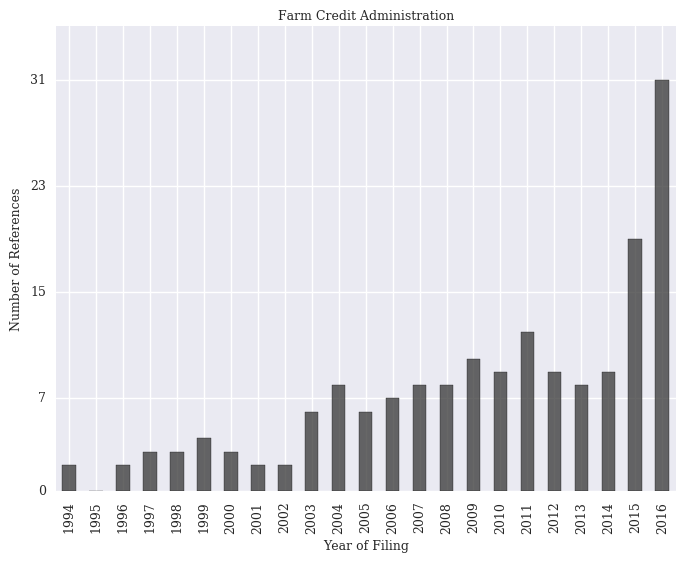

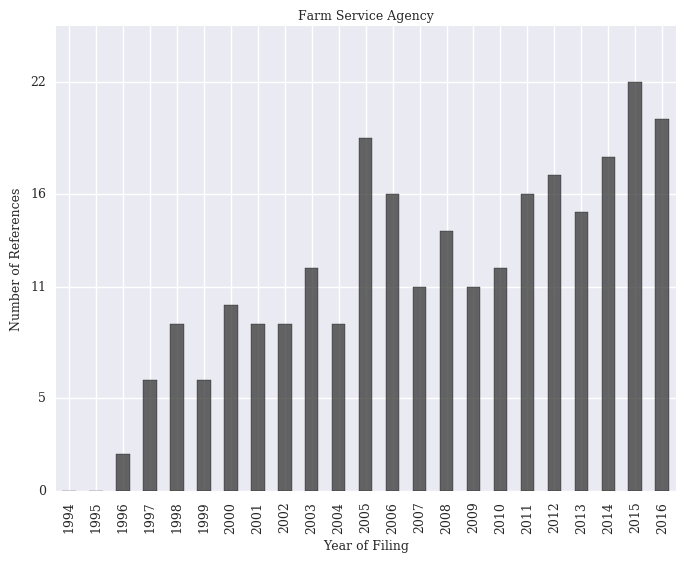

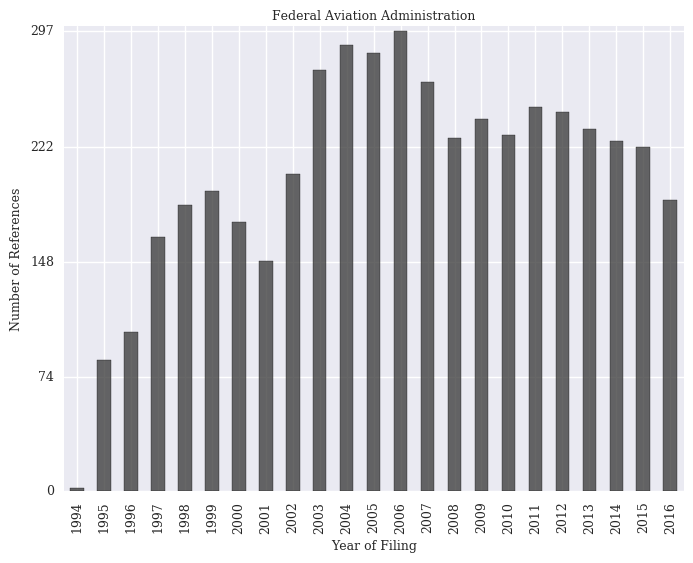

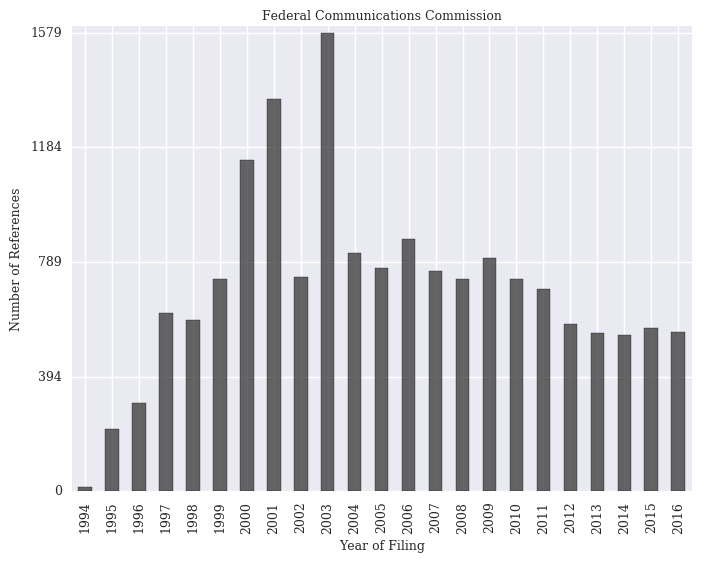

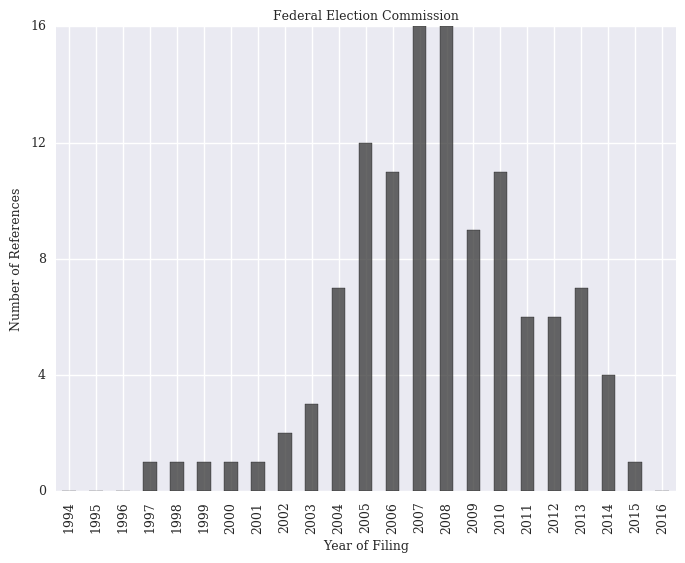

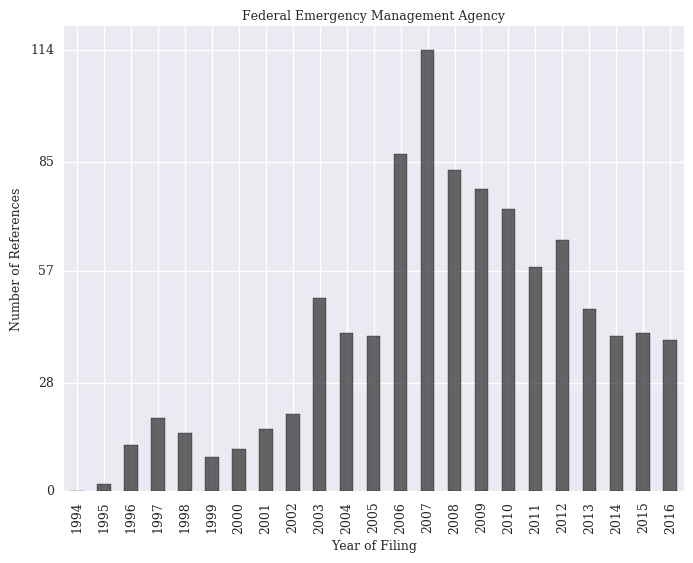

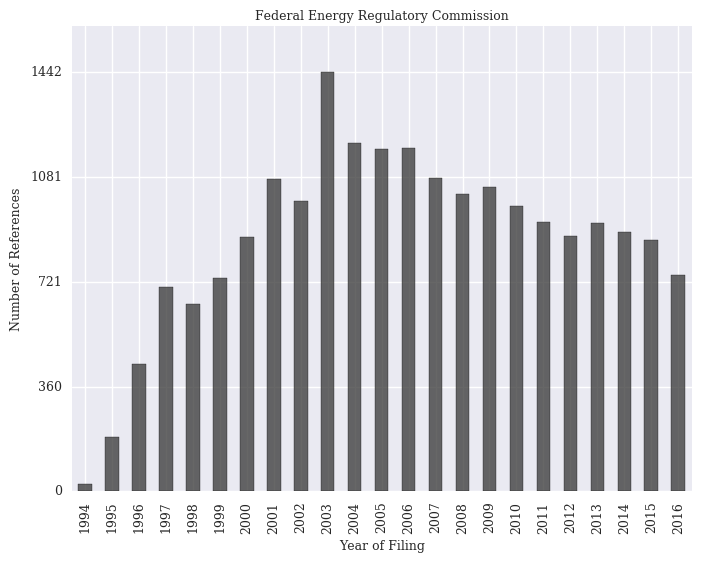

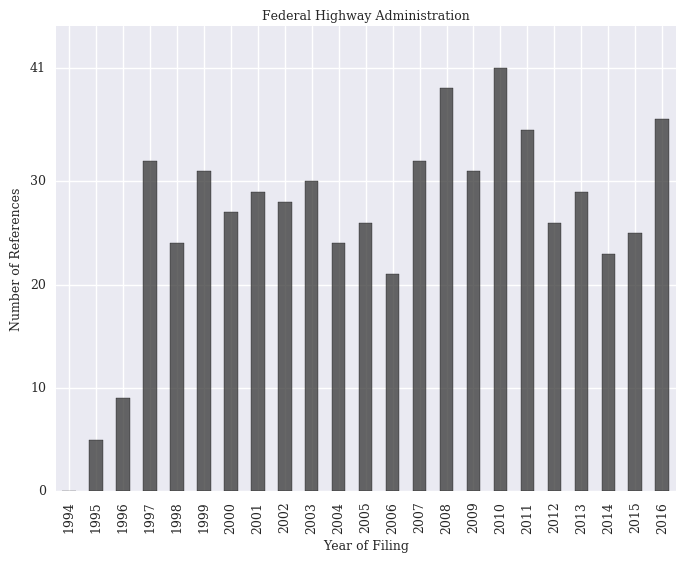

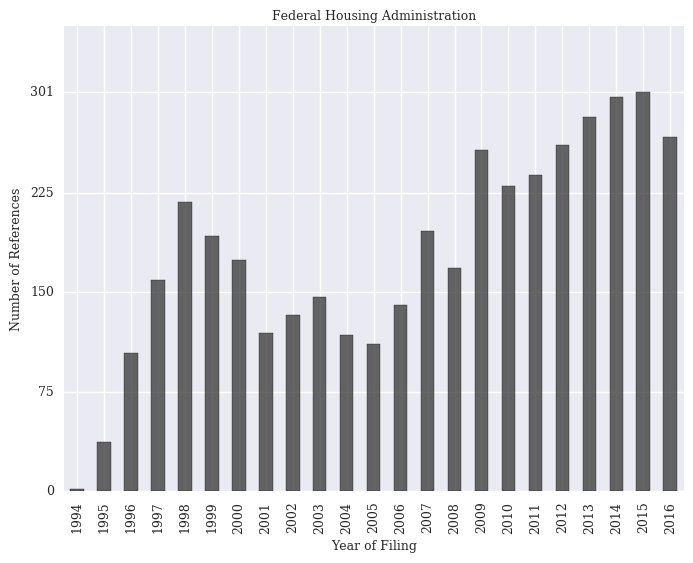

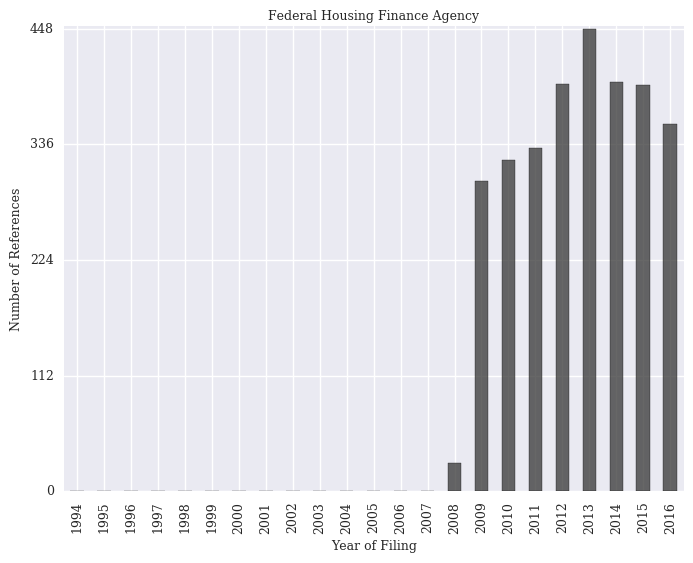

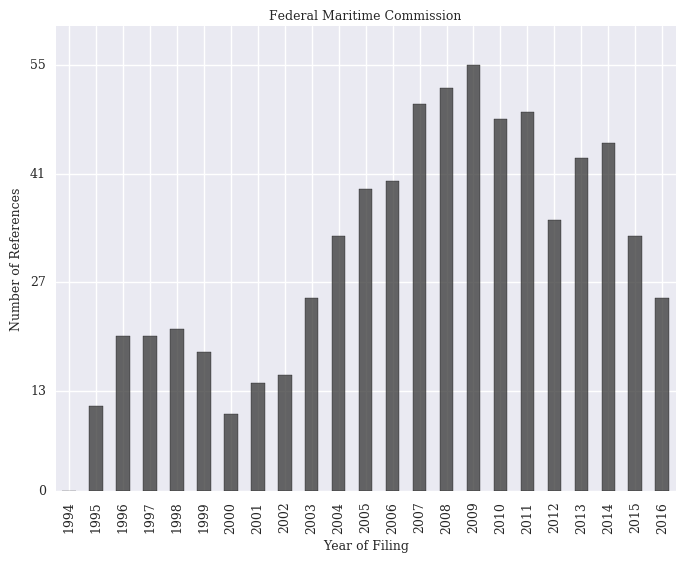

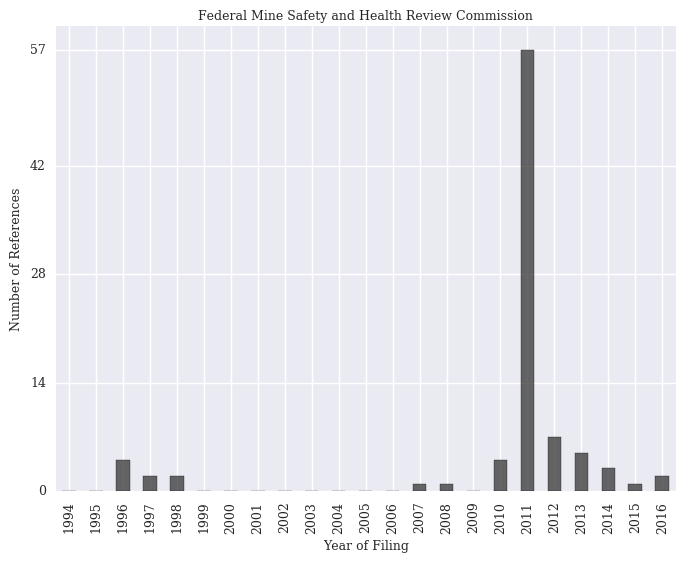

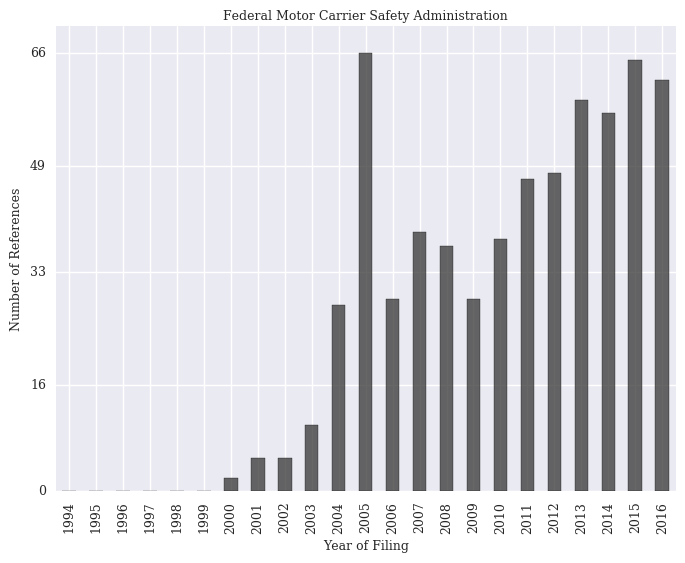

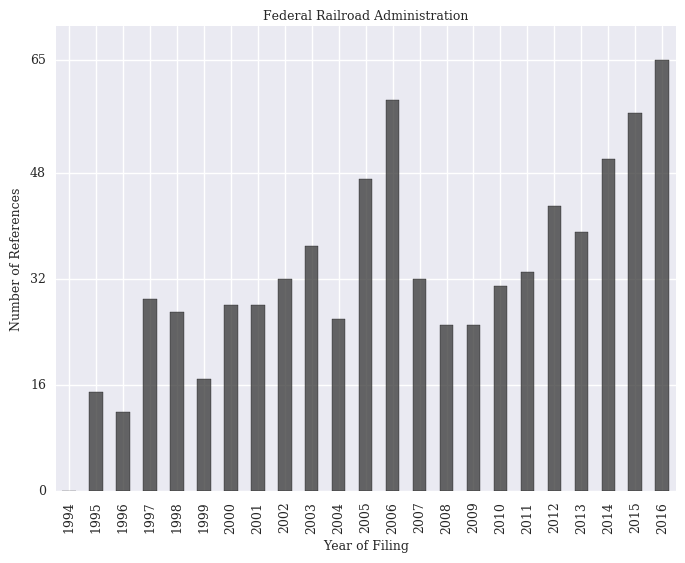

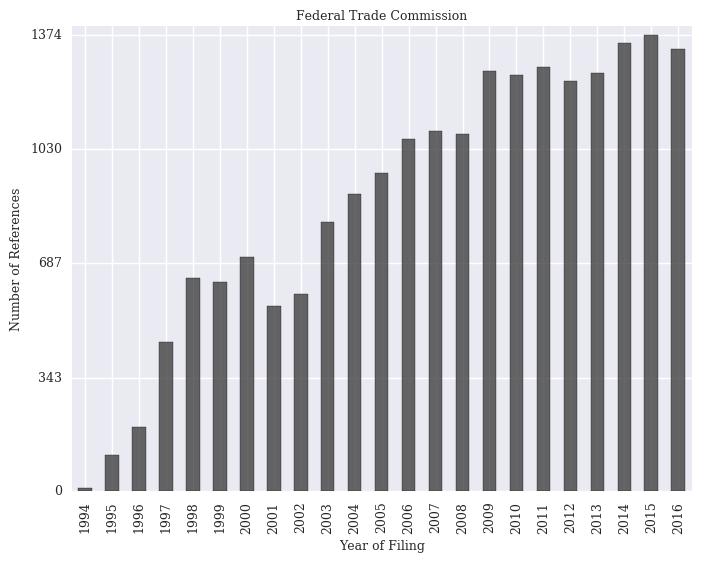

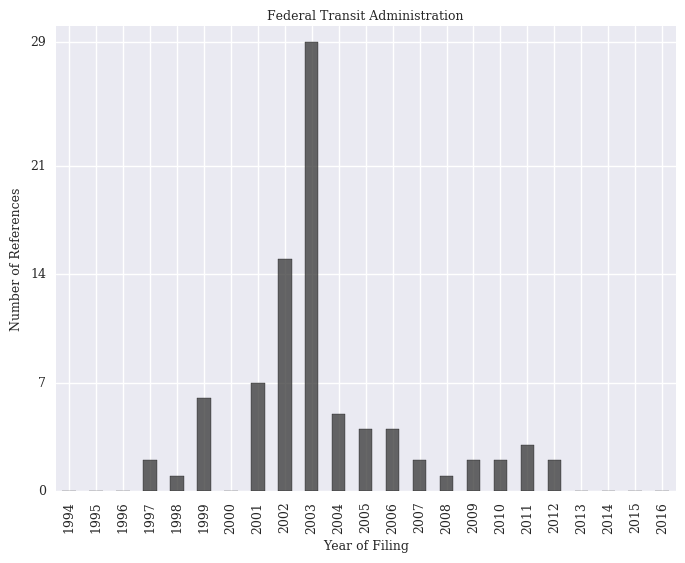

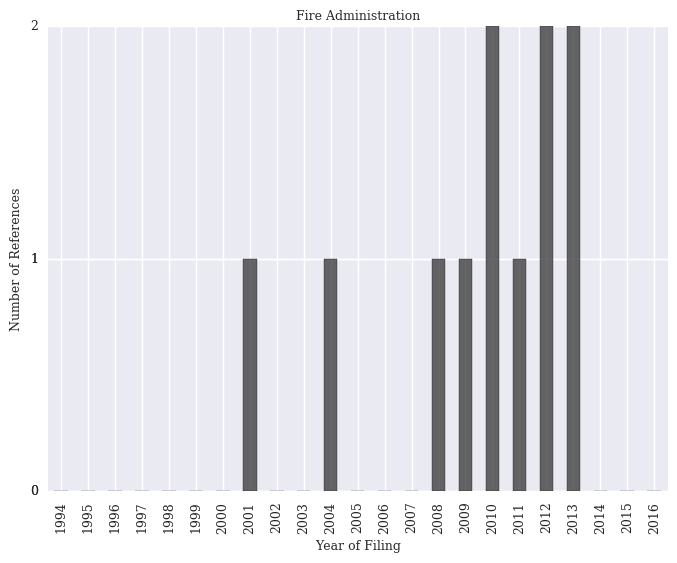

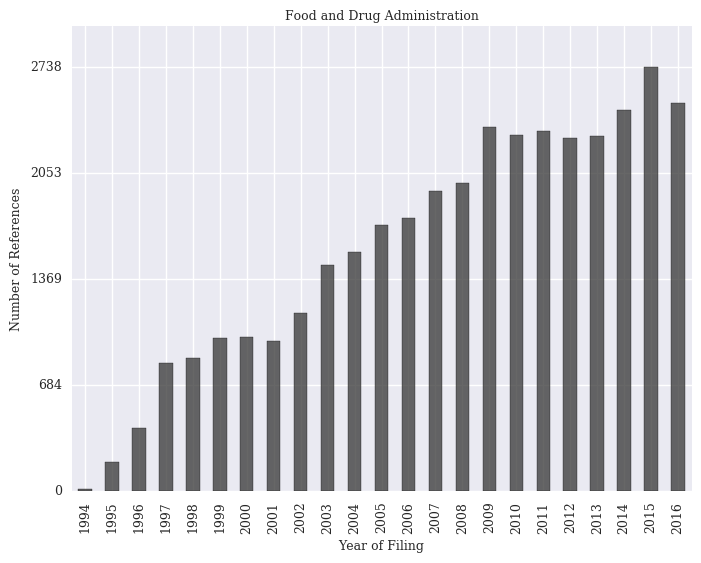

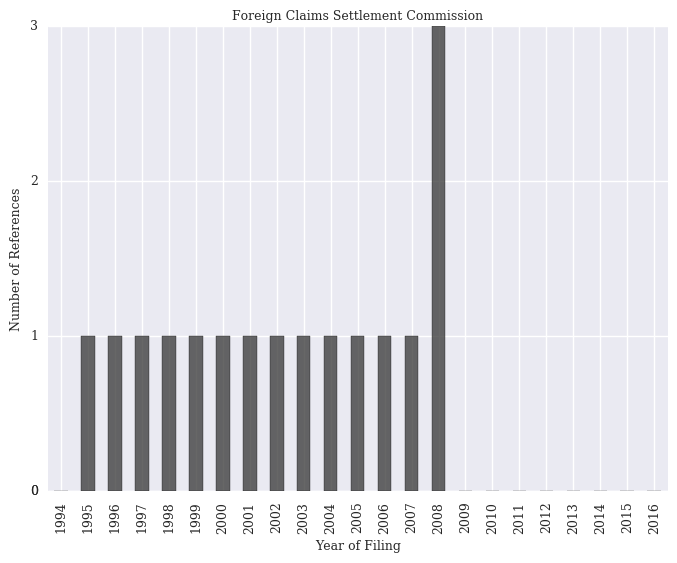

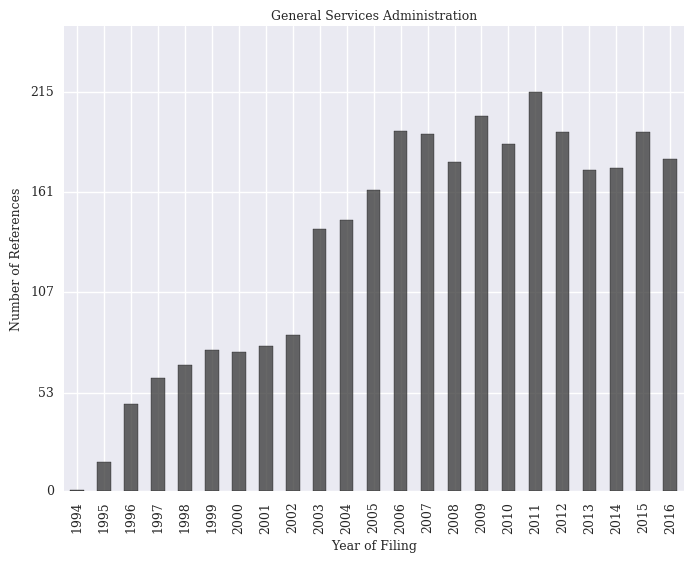

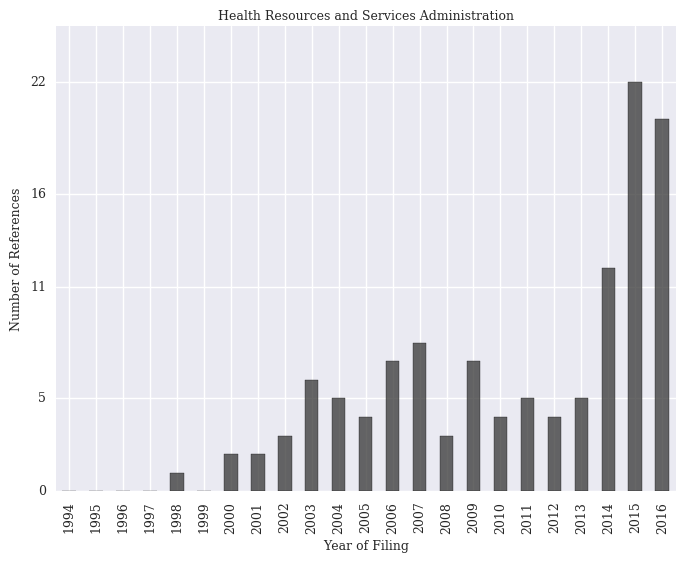

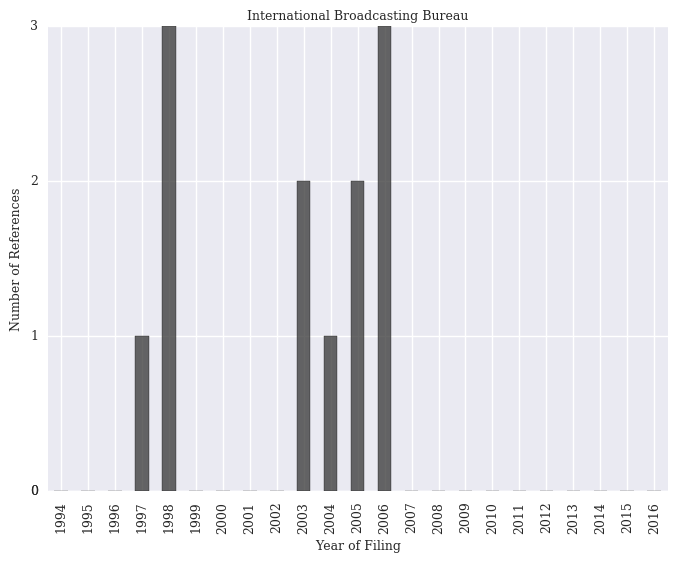

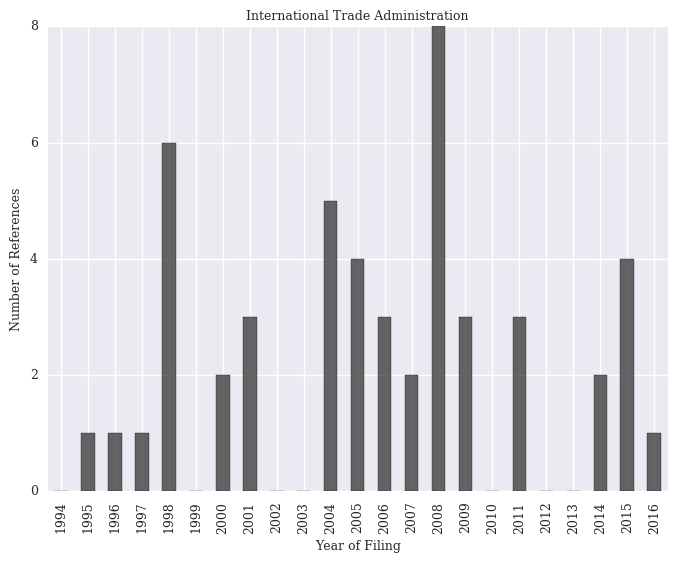

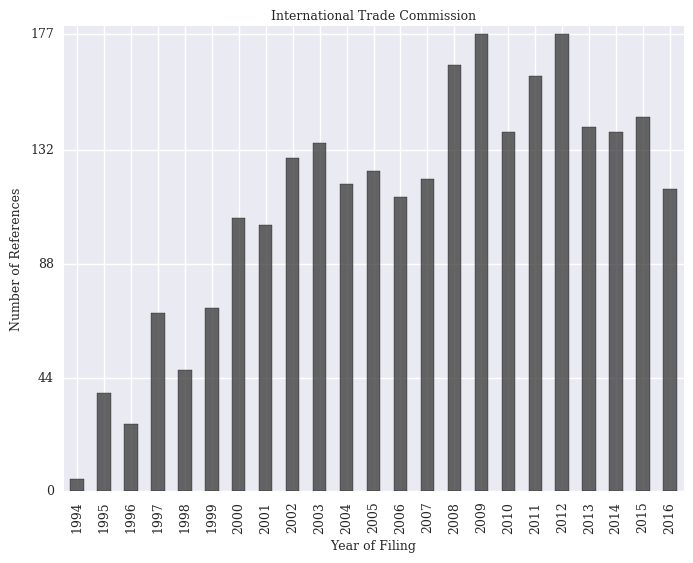

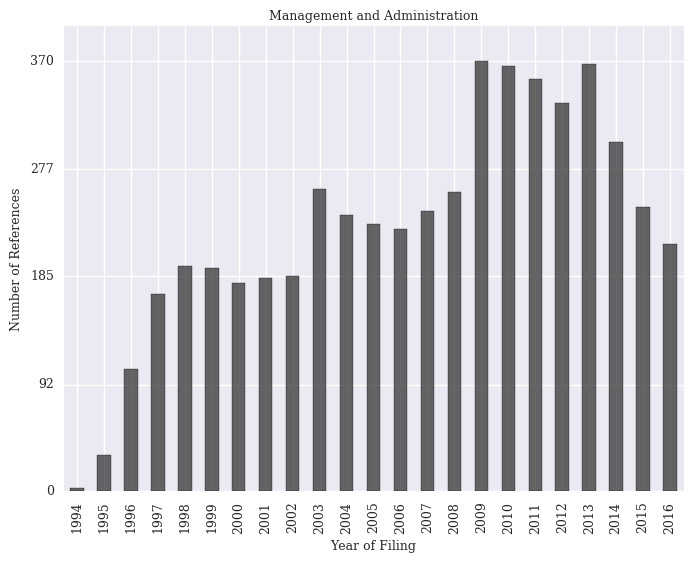

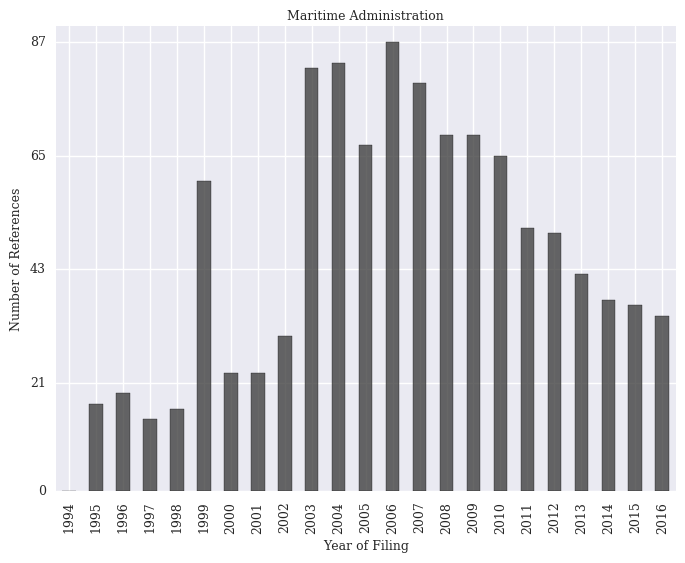

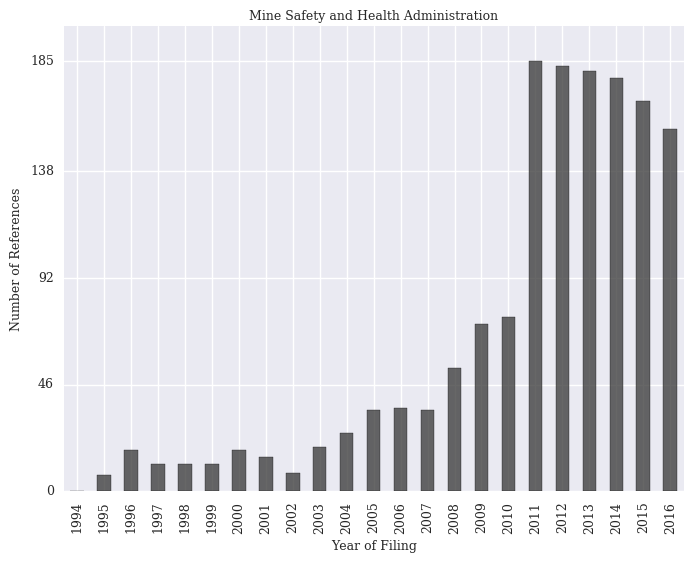

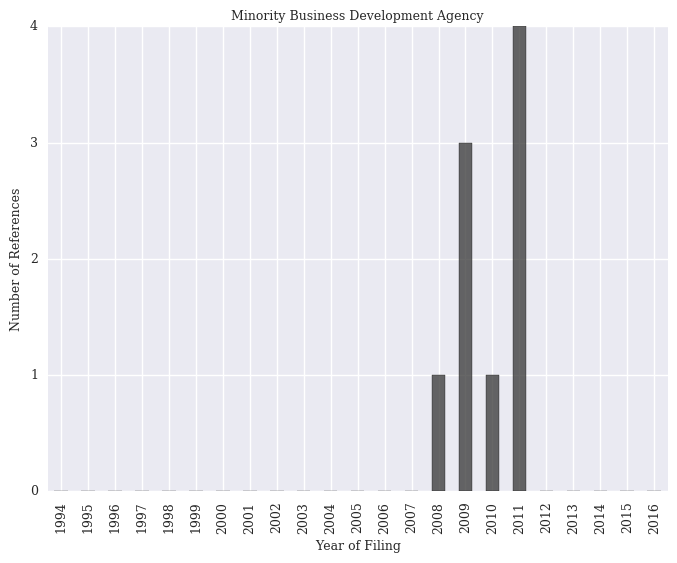

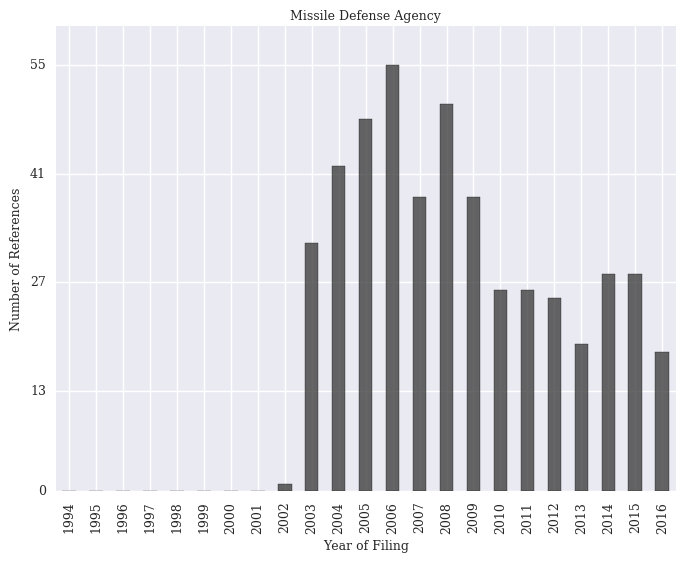

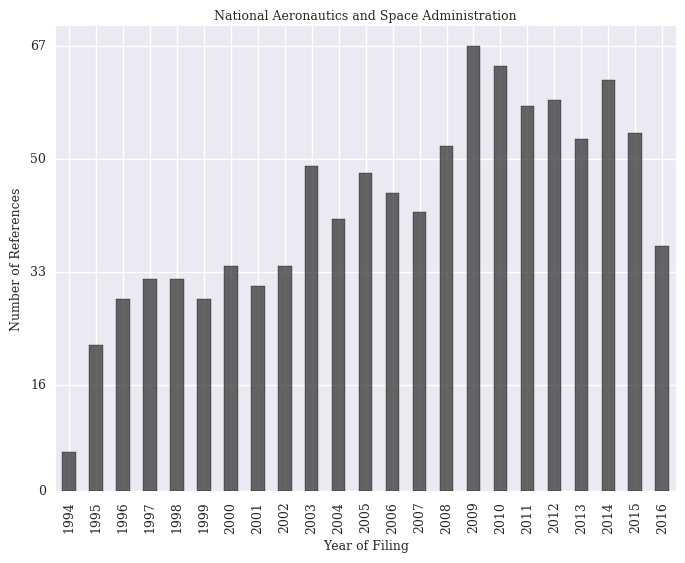

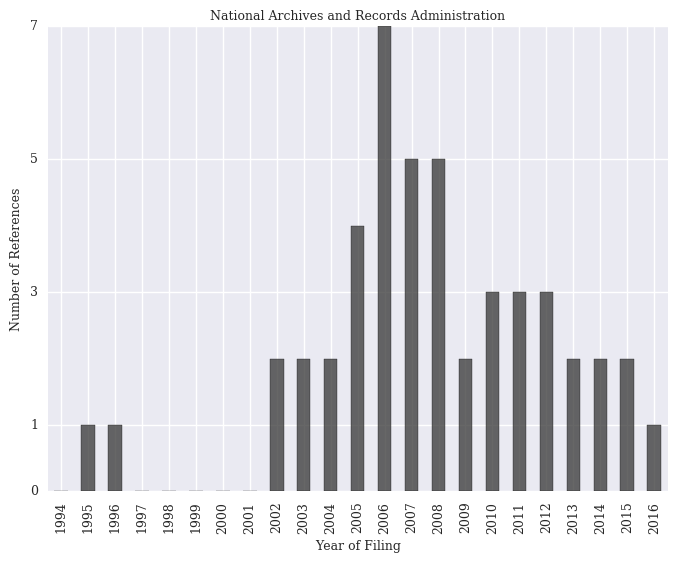

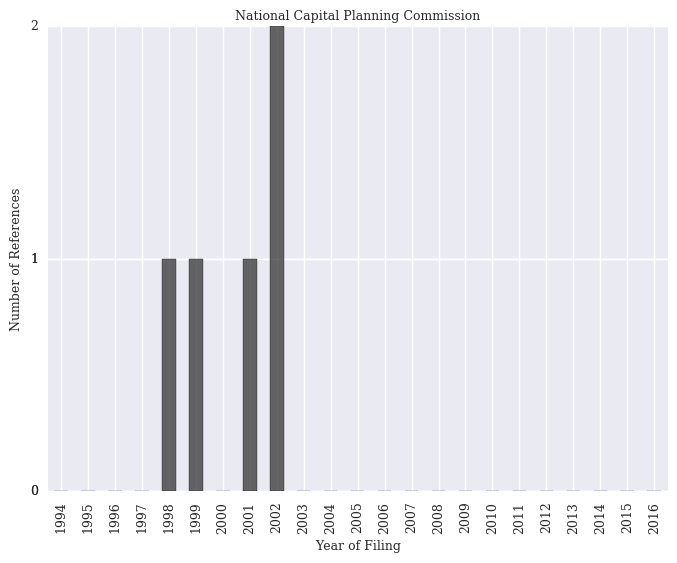

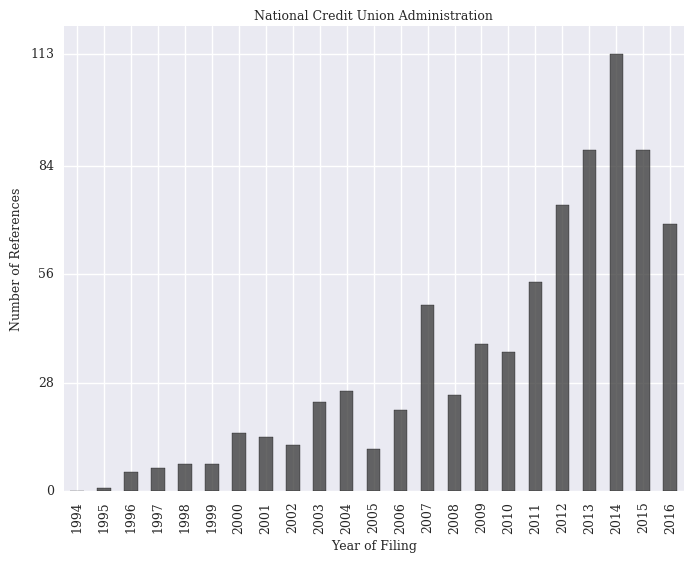

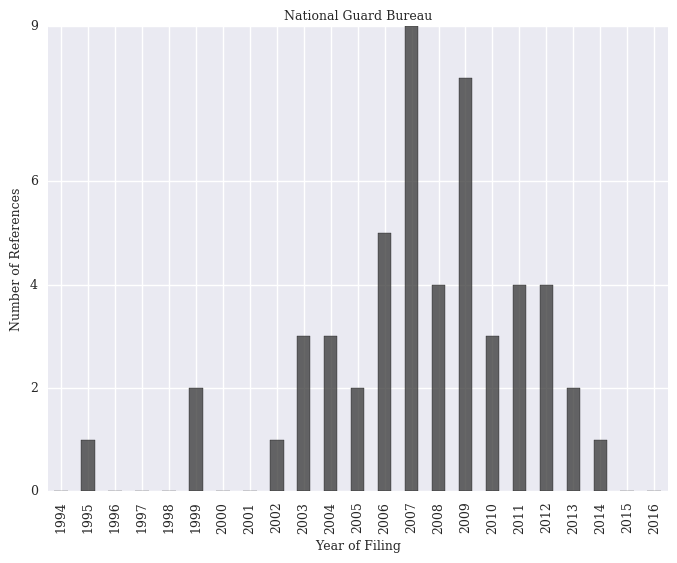

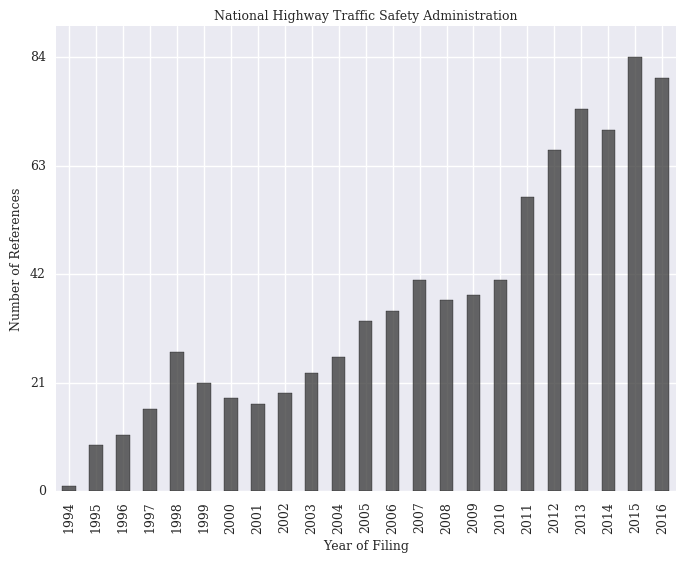

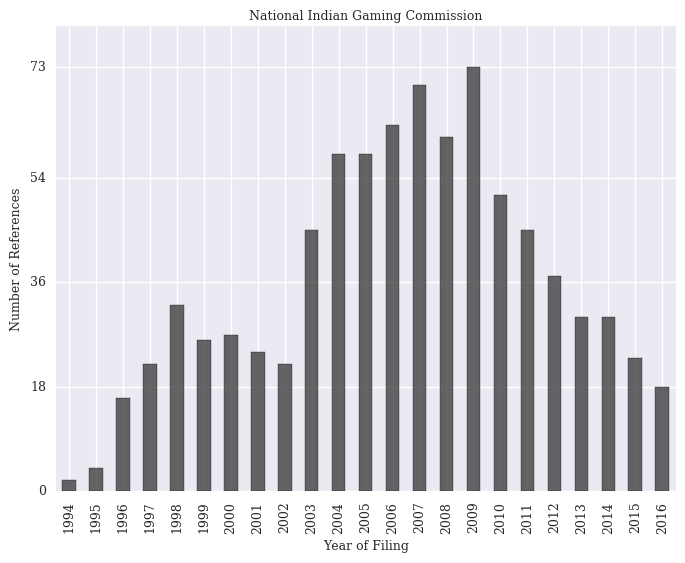

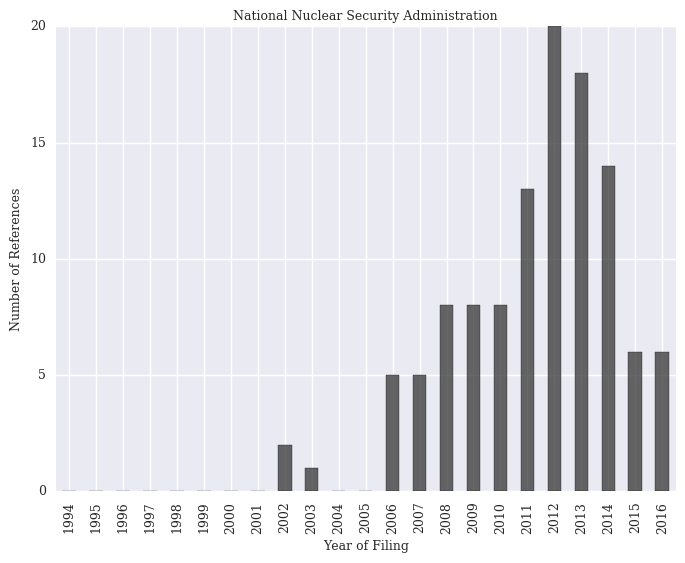

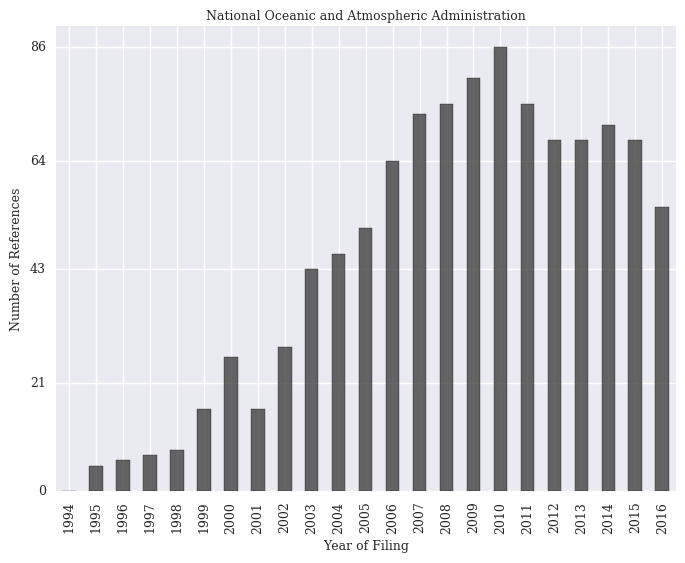

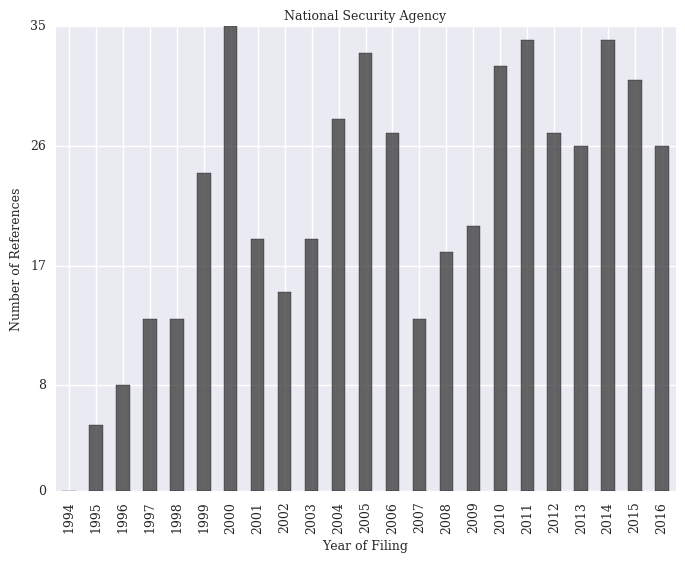

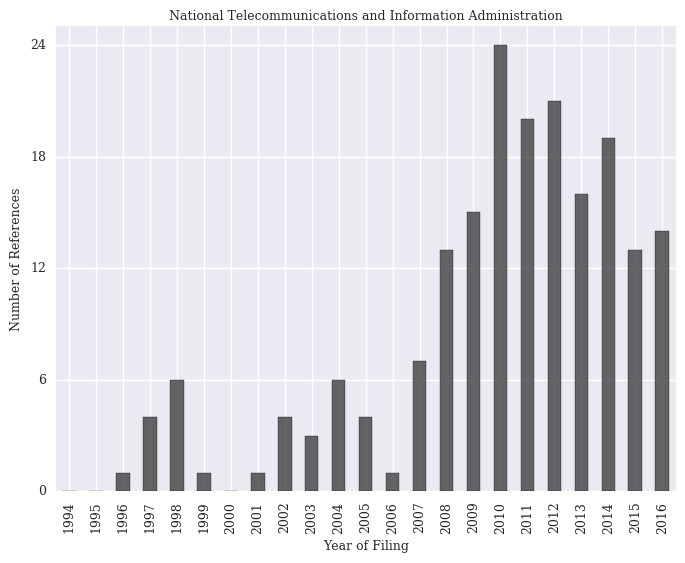

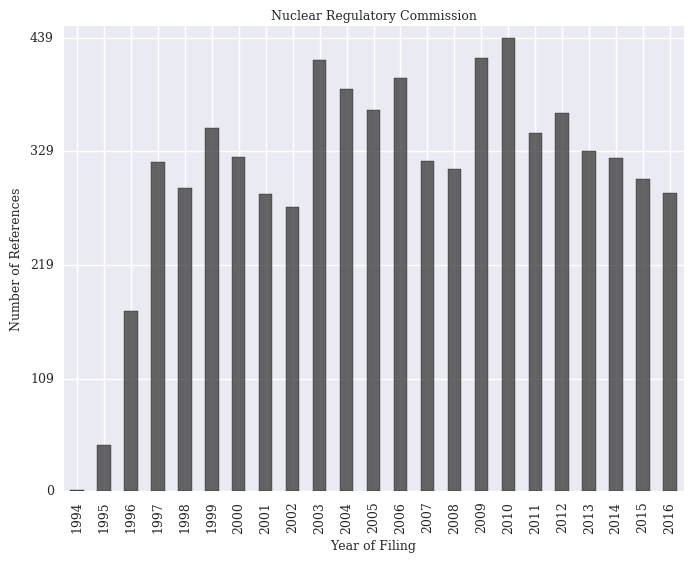

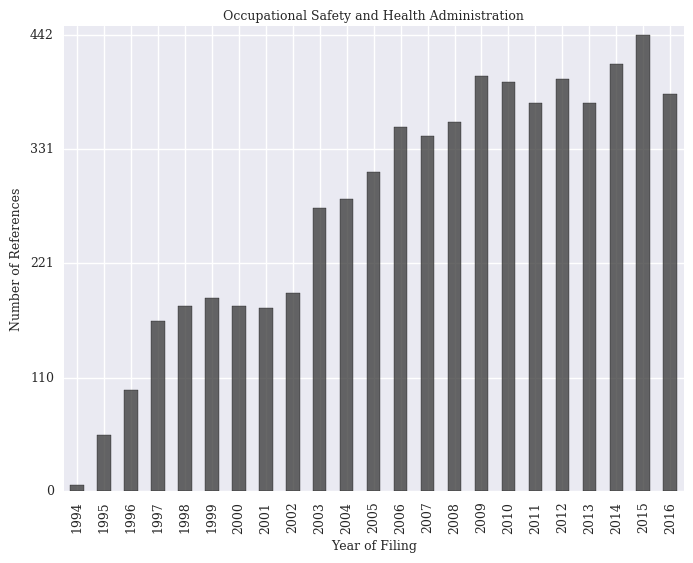

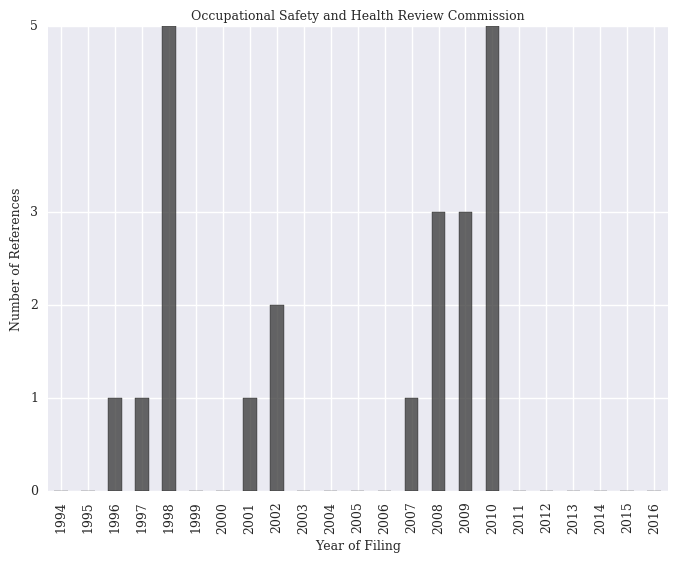

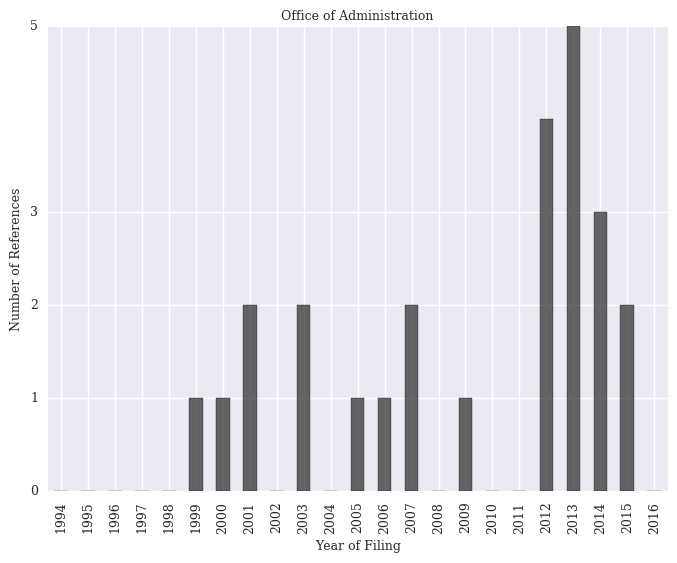

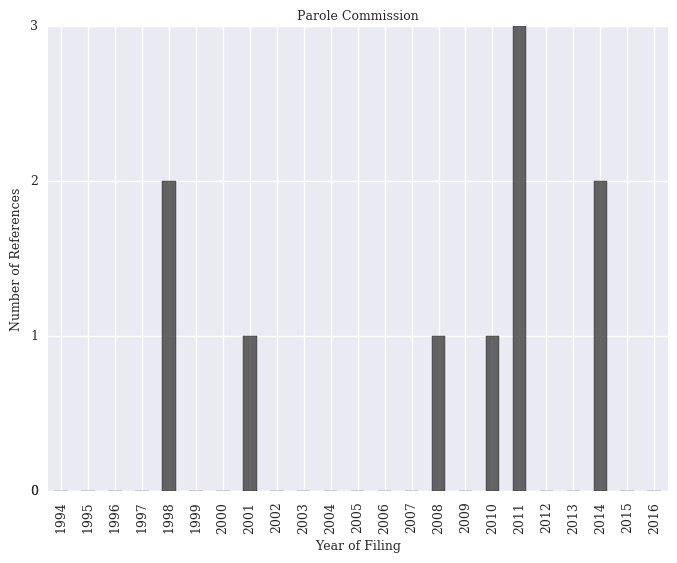

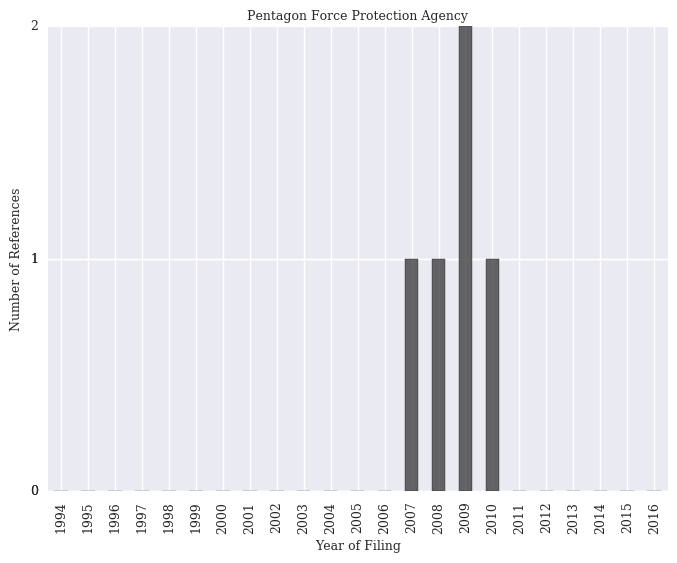

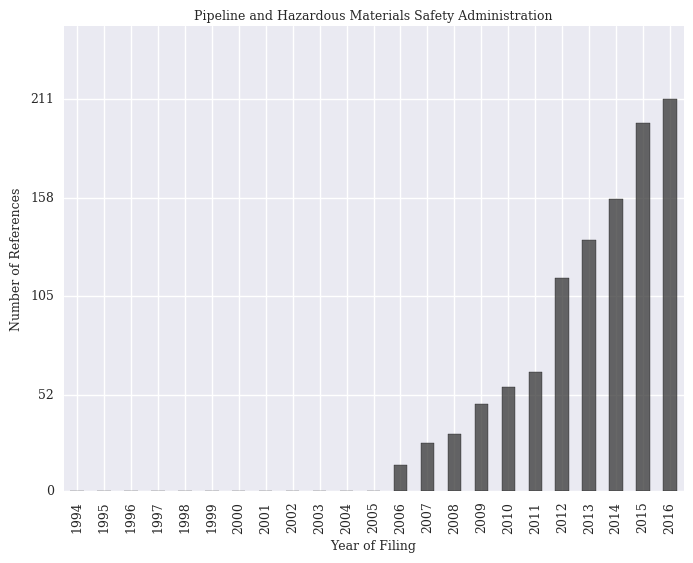

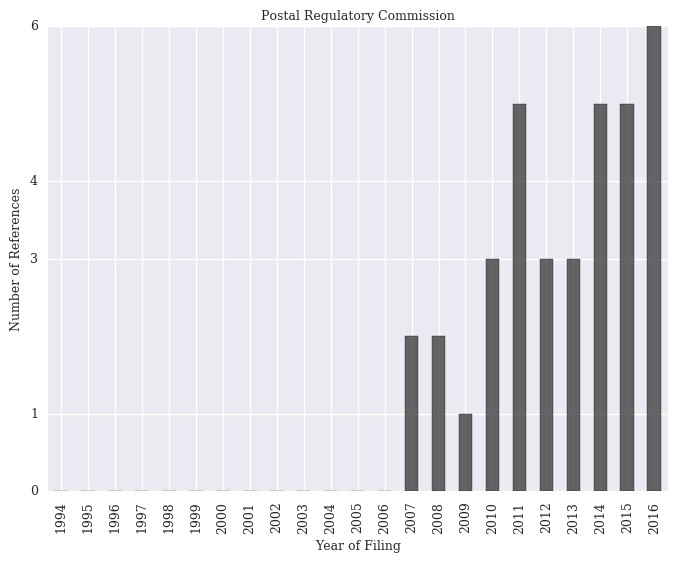

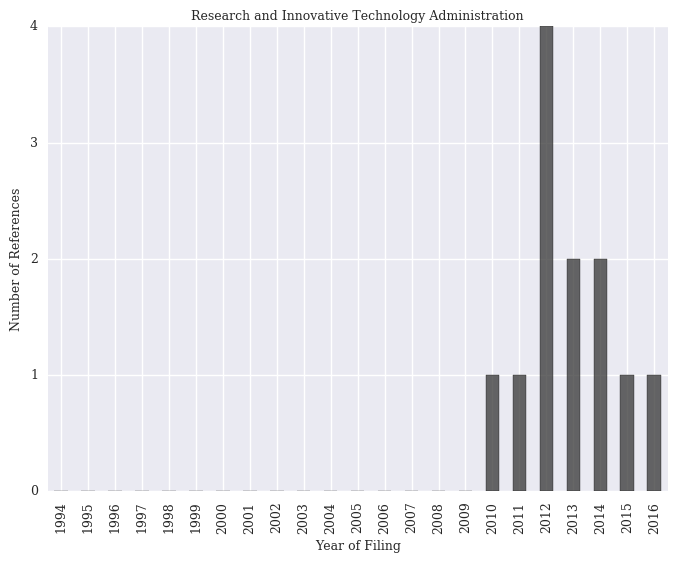

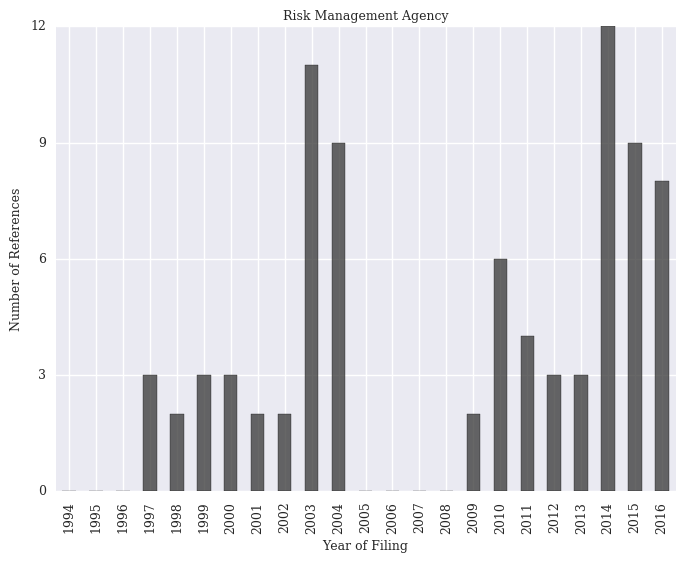

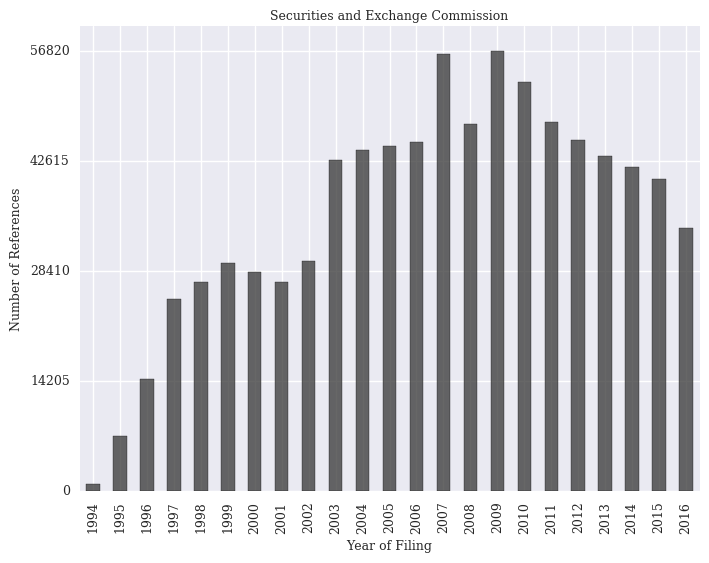

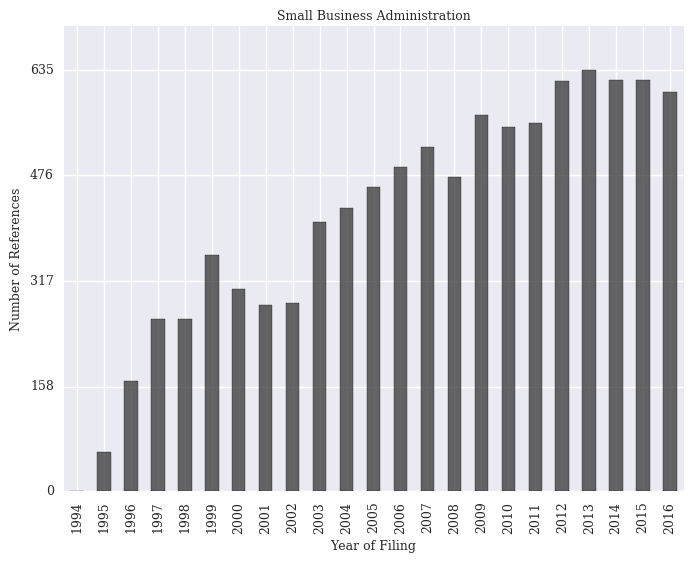

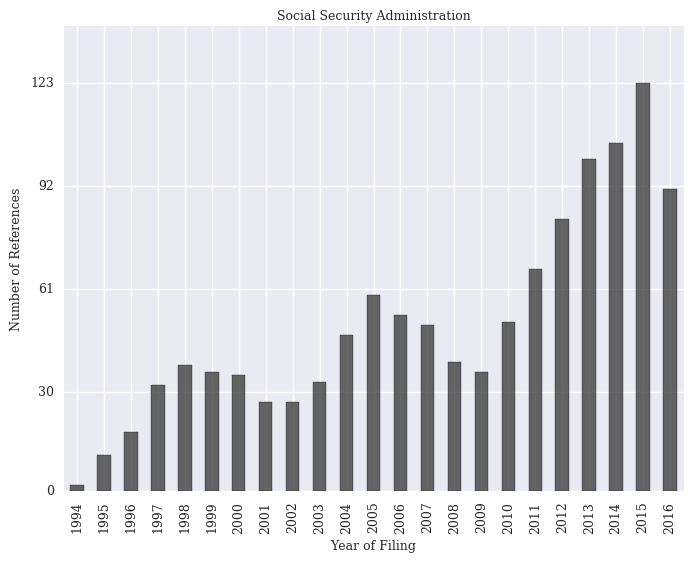

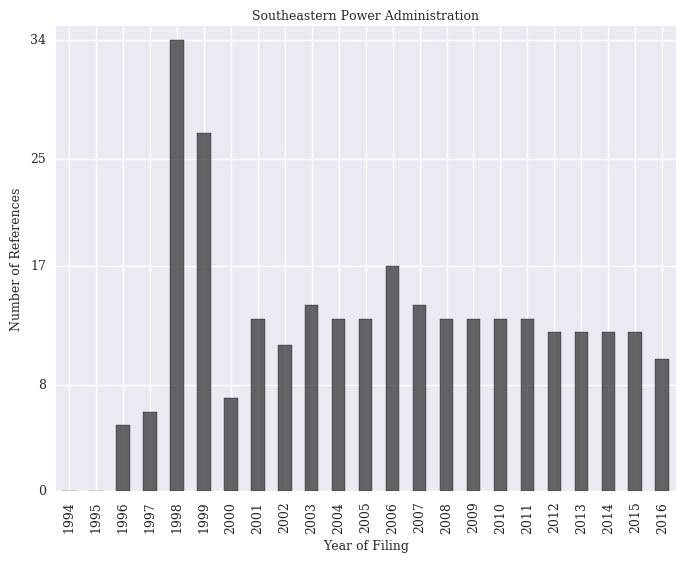

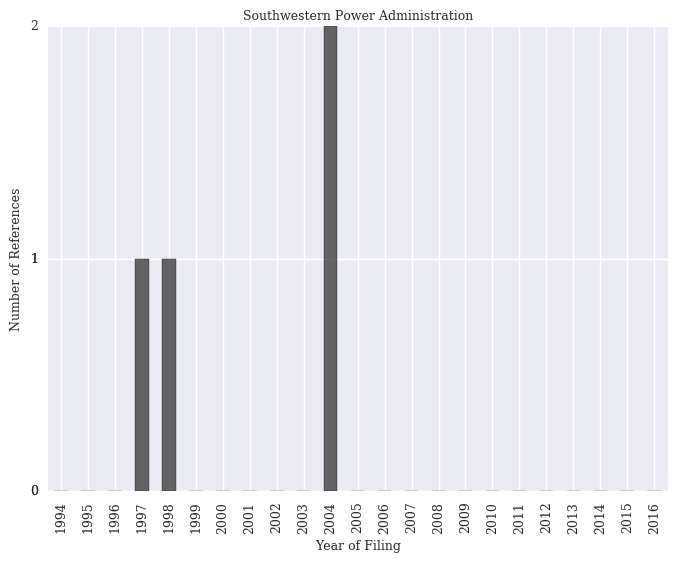

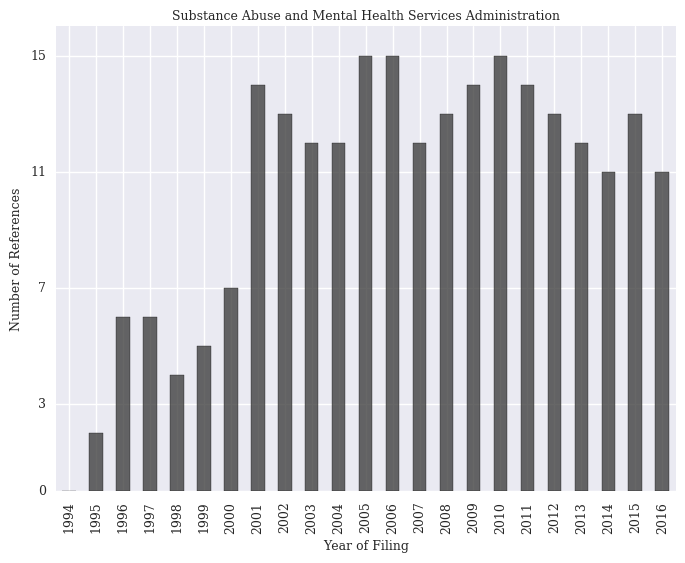

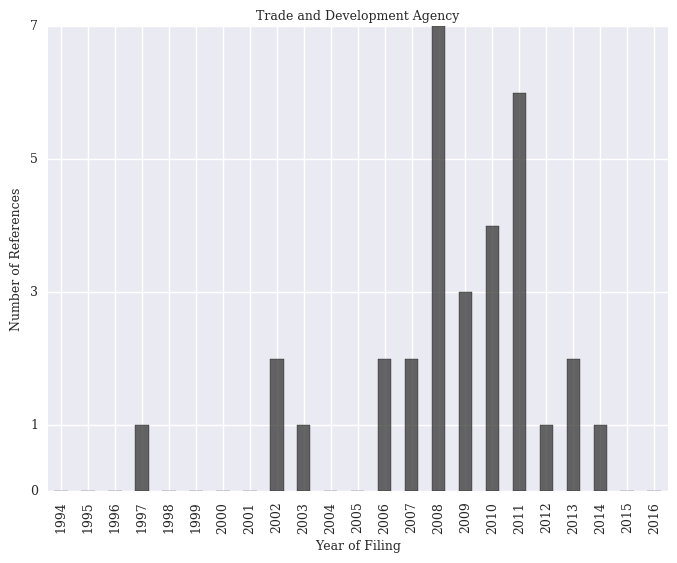

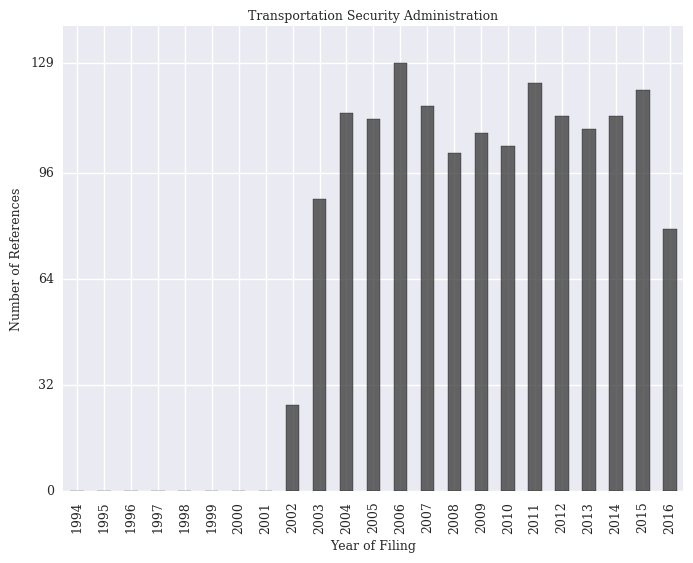

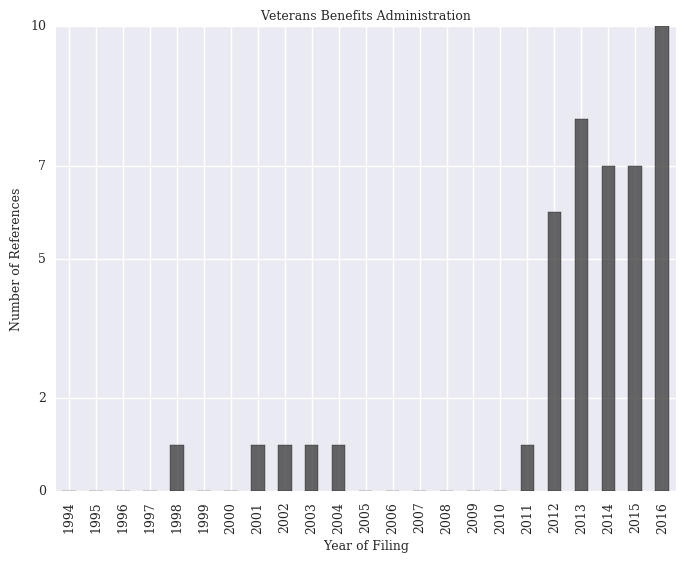

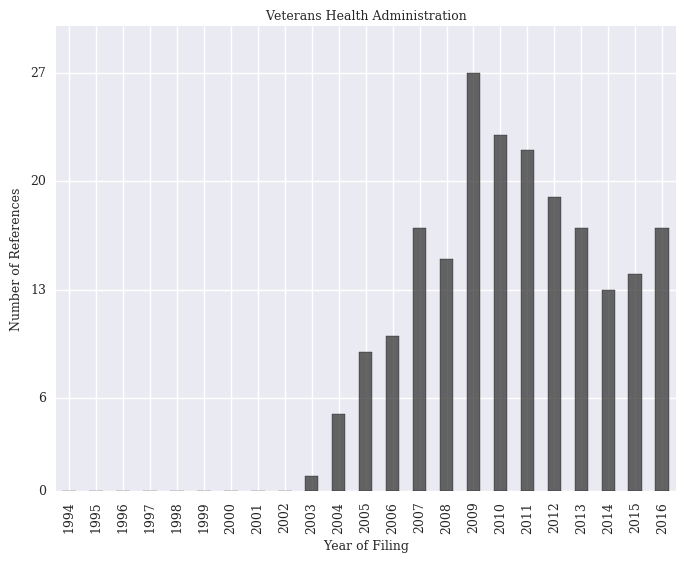

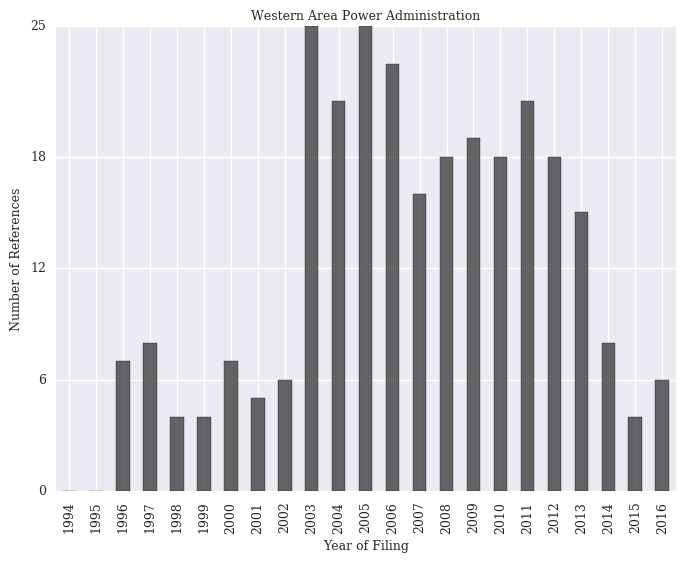

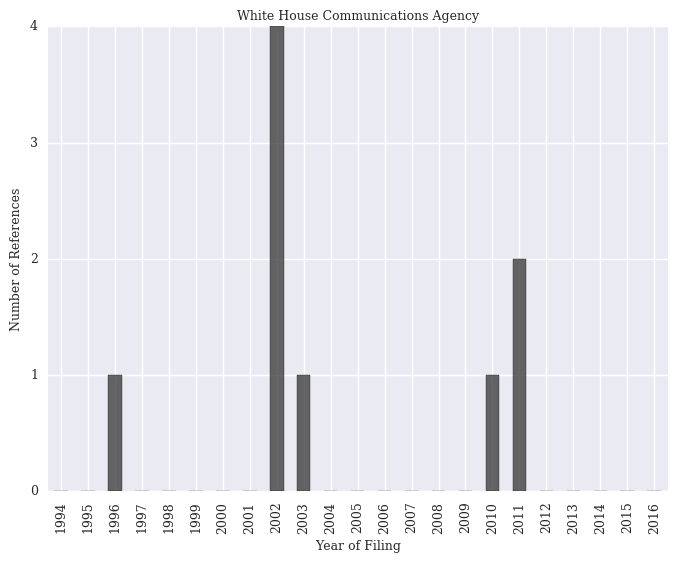

In [18]:
# Create base figure path
base_figure_path = "../figures/agency/"
try:
    os.makedirs(base_figure_path)
except Exception as e:
    pass

# Setup PLOS ONE font dictionary
plos_one_fontdict = {'fontname': "Serif", 'fontsize': 9}

for agency_name in agency_per_year.columns:
    print(agency_name)
    f, ax = plt.subplots(figsize=(8, 6))
    agency_per_year.loc[:, agency_name].plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
    plt.title(agency_name, fontdict=plos_one_fontdict)
    
    # x-axis
    plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
    ax.set_xticklabels(list(map(str, agency_per_year.index)), fontdict=plos_one_fontdict)
    
    # y-axis
    plt.ylabel("Number of References", fontdict=plos_one_fontdict)
    y_tick_list = numpy.linspace(0, agency_per_year.loc[:, agency_name].max(), 5).astype(numpy.int32)
    ax.set_yticks(y_tick_list)
    ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)
    
    # Write to figure files
    clean_agency_name = agency_name.replace(" ", "_").replace("-", "_")
    f.savefig(os.path.join(base_figure_path, "agency_count_{0}.png".format(clean_agency_name)), dpi=300)
    f.savefig(os.path.join(base_figure_path, "agency_count_{0}.pdf".format(clean_agency_name)), dpi=300)
    
    # Cleanup
    del f
    del ax
    gc.collect()

# Act Analysis

In [19]:
# Read agency data
act_df = pandas.read_csv("../data/output/clean_act_result_data.csv.gz", compression="gzip", low_memory=False)
act_df.loc[:, "year_filed"] = act_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
print(act_df.shape)

(3606888, 14)


In [20]:
act_df = act_df.loc[act_df["match_score"] > 0.0, :]
print(act_df.shape)

(3392667, 14)


In [21]:
act_df["clean_act_name"].describe()

count                 3392667
unique                    401
top       Securities Exchange
freq                  1478420
Name: clean_act_name, dtype: object

In [22]:
act_df.groupby(["original_act_name", "clean_act_name"])["company_cik"].count().sort_values(ascending=False).head(10)

original_act_name                     clean_act_name                                       
Securities Exchange                   Securities Exchange                                      903410
Exchange                              Securities Exchange                                      509012
Sarbanes Oxley                        Sarbanes Oxley                                           363108
Securities                            Securities                                               357334
Dodd Frank                            Dodd Frank Wall Street Reform And Consumer Protection     93549
Private Securities Litigation Reform  Private Securities Litigation Reform                      63062
Investment Company                    Investment Company                                        40913
Clean Air                             Clean Air                                                 40613
1940                                  Investment Company                                    

In [23]:
act_df.head().T

0                           1  \
company_cik                              100880                      100880   
company_name         UNION OIL CO OF CALIFORNIA  UNION OIL CO OF CALIFORNIA   
date_filed                           1994-03-31                  1994-03-31   
segment_id                          9.13452e+06                 9.13452e+06   
segment_file_name                           NaN                         NaN   
segment_description      FORM 10-K FOR 12-31-93      FORM 10-K FOR 12-31-93   
segment_type                               10-K                        10-K   
original_act_name                     Clean Air        Solid Waste Disposal   
original_act_year                           NaN                         NaN   
clean_act_name                        Clean Air        Solid Waste Disposal   
clean_act_year                             1990                        1965   
match_score                                 100                         100   
match_type               no_year_fuzzy_no_remap          no_year_exact_name   
year_filed                                 1994                        1994   

                                              2  \
company_cik                              100880   
company_name         UNION OIL CO OF CALIFORNIA   
date_filed                           1994-03-31   
segment_id                          9.13452e+06   
segment_file_name                           NaN   
segment_description      FORM 10-K FOR 12-31-93   
segment_type                               10-K   
original_act_name             Federal Clean Air   
original_act_year                           NaN   
clean_act_name                        Clean Air   
clean_act_year                             1990   
match_score                                  90   
match_type               no_year_fuzzy_no_remap   
year_filed                                 1994   

                                                      3  \
company_cik                                      100880   
company_name                 UNION OIL CO OF CALIFORNIA   
date_filed                                   1994-03-31   
segment_id                                  9.13452e+06   
segment_file_name                                   NaN   
segment_description              FORM 10-K FOR 12-31-93   
segment_type                                       10-K   
original_act_name    Resource Conservation And Recovery   
original_act_year                                  1976   
clean_act_name       Resource Conservation And Recovery   
clean_act_year                                     1976   
match_score                                         100   
match_type                                  exact_match   
year_filed                                         1994   

                                                                     4  
company_cik                                                     100880  
company_name                                UNION OIL CO OF CALIFORNIA  
date_filed                                                  1994-03-31  
segment_id                                                 9.13452e+06  
segment_file_name                                                  NaN  
segment_description                             FORM 10-K FOR 12-31-93  
segment_type                                                      10-K  
original_act_name    Comprehensive Environmental Response, Compensa...  
original_act_year                                                 1980  
clean_act_name       Comprehensive Environmental Response, Compensa...  
clean_act_year                                                    1980  
match_score                                                        100  
match_type                                                 exact_match  
year_filed                                                        1994

In [24]:
# Group data by company-year
act_df.loc[:, "year_filed"] = act_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
act_per_year = act_df.groupby(["year_filed", "clean_act_name"])["company_cik"].count()\
    .unstack().fillna(0).astype(int)
act_per_year.to_csv("../data/output/act_count_per_year.csv", encoding="utf-8")
act_per_year.head()

clean_act_name  21st Century Communications And Video Accessibility  \
year_filed                                                            
1994                                                            0     
1995                                                            0     
1996                                                            0     
1997                                                            0     
1998                                                            0     

clean_act_name  Accountable Pipeline Safety and Partnership  \
year_filed                                                    
1994                                                      0   
1995                                                      0   
1996                                                      6   
1997                                                      6   
1998                                                     10   

clean_act_name  Age Discrimination In Employment  \
year_filed                                         
1994                                           0   
1995                                           6   
1996                                          20   
1997                                          34   
1998                                          59   

clean_act_name  Air Transportation Safety And System Stabilization  \
year_filed                                                           
1994                                                            0    
1995                                                            0    
1996                                                            0    
1997                                                            0    
1998                                                            2    

clean_act_name  Airline Deregulation  Airport Noise And Capacity  \
year_filed                                                         
1994                               1                           1   
1995                              15                          16   
1996                              24                          15   
1997                              21                          20   
1998                              23                          23   

clean_act_name  Alternative Energy Portfolio Standards  \
year_filed                                               
1994                                                 0   
1995                                                 0   
1996                                                 0   
1997                                                 0   
1998                                                 0   

clean_act_name  American Clean Energy And Security  American Jobs Creation  \
year_filed                                                                   
1994                                             0                       0   
1995                                             0                       0   
1996                                             1                       0   
1997                                             1                       5   
1998                                             1                       7   

clean_act_name  American Microturbine Manufacturing and Clean Energy Deployment  \
year_filed                                                                        
1994                                                            0                 
1995                                                            0                 
1996                                                            0                 
1997                                                            0                 
1998                                                            0                 

clean_act_name                       ...                        \
year_filed                           ...                         
1994                                 ...                   

In [25]:
act_per_year.sum().sort_values().head(10)

clean_act_name
Toxic Substances Recovery                                          1
Education                                                          1
Pension Annuitants' Protection                                     1
Port And Tanker Safety                                             1
American Microturbine Manufacturing and Clean Energy Deployment    1
Disaster Relief                                                    1
Household Goods Transportation                                     3
National Cooperative Research And Development                      3
National Emission Standards                                        4
Consolidated Omnibus Reconciliation                                4
dtype: int64

0.455982269996


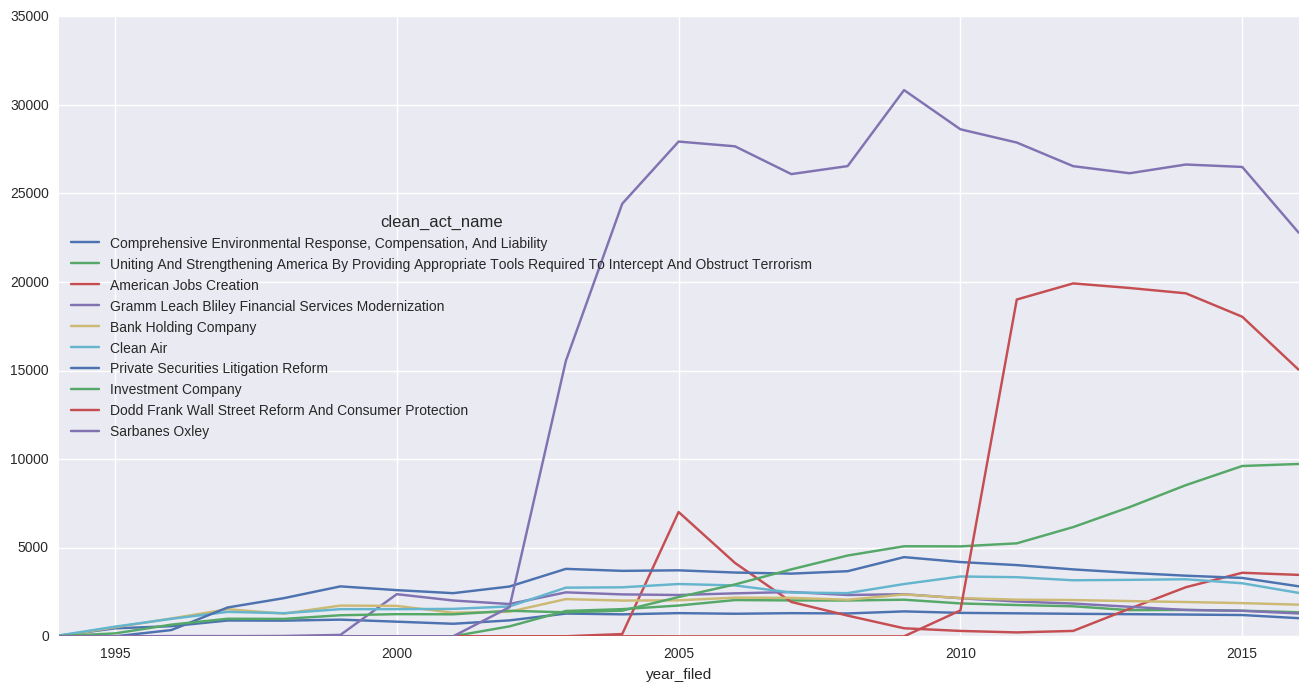

In [26]:
act_plot_list = [c for c in act_per_year.columns if c not in ["Securities", "Securities Exchange"]]
top_act_list = act_per_year.loc[:, act_plot_list].sum().sort_values().tail(10).index.tolist()
print(act_per_year.loc[:, act_plot_list].sum().sum() / act_per_year.sum().sum())
act_per_year.loc[:, top_act_list].plot(figsize=(16, 8))

In [27]:
# Create base figure path
base_figure_path = "../figures/act/"
try:
    os.makedirs(base_figure_path)
except Exception as e:
    pass

# Setup PLOS ONE font dictionary
plos_one_fontdict = {'fontname': "Serif", 'fontsize': 9}

for act_name in act_per_year.columns:
    print(act_name)
    f, ax = plt.subplots(figsize=(8, 6))
    act_per_year.loc[:, act_name].plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
    plt.title(act_name, fontdict=plos_one_fontdict)
    
    # x-axis
    plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
    ax.set_xticklabels(list(map(str, act_per_year.index)), fontdict=plos_one_fontdict)
    
    # y-axis
    plt.ylabel("Number of References", fontdict=plos_one_fontdict)
    y_tick_list = numpy.linspace(0, act_per_year.loc[:, act_name].max(), 5).astype(numpy.int32)
    ax.set_yticks(y_tick_list)
    ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)
    
    # Write to figure files
    clean_act_name = act_name.replace(" ", "_").replace("-", "_")
    f.savefig(os.path.join(base_figure_path, "act_count_{0}.png".format(clean_act_name)), dpi=300)
    f.savefig(os.path.join(base_figure_path, "act_count_{0}.pdf".format(clean_act_name)), dpi=300)
    
    # Cleanup
    plt.close(f)
    del f
    del ax
    gc.collect()

21st Century Communications And Video Accessibility
Accountable Pipeline Safety and Partnership
Age Discrimination In Employment
Air Transportation Safety And System Stabilization
Airline Deregulation
Airport Noise And Capacity
Alternative Energy Portfolio Standards
American Clean Energy And Security
American Jobs Creation
American Microturbine Manufacturing and Clean Energy Deployment
American Recovery And Reinvestment
American Taxpayer Relief
Americans With Disabilities
Anti Drug Abuse
Anti Kickback
Anti Price Discrimination
Antitrust Procedures And Penalties
Arms Export Control
Assignment Of Claims
Atomic Energy
Automobile Dealers' Day in Court
Aviation And Transportation Security
Aviation Noise And Capacity
Aviation Safety And Noise Abatement
Aviation Safety and Capacity Expansion
Balanced Budget
Balanced Budget Refinement
Bank Enterprise
Bank Holding Company
Bank Secrecy
Bank Service Company
Banking
Bankruptcy Reform
Benefits Improvement And Protection
Black Lung Benefits
Black Lu

In [28]:
l = [filing_df.groupby("year_filed")["company_cik"].count().sort_index(),
     filing_df.groupby("year_filed")["company_cik"].nunique().sort_index(),
     act_df.groupby("year_filed")["company_cik"].count().sort_index(),
     agency_df.groupby("year_filed")["company_cik"].count().sort_index(),
     act_df.groupby("year_filed")["company_cik"].nunique().sort_index()]

x = pandas.DataFrame(pandas.concat(l, axis=1))
x.columns = ["num_filings", "num_companies", "num_act", "num_agency", "num_10k_companies"]
x

num_filings  num_companies  num_act  num_agency  num_10k_companies
year_filed                                                                    
1994                452            229     2198        1266                228
1995               2603           2230    17672       10602               2223
1996               4880           4365    37361       20858               4348
1997               7668           7125    67424       35329               7103
1998               9818           7101    68835       38117               7092
1999               7868           7217    76476       41623               7204
2000               7294           6912    75851       40740               6901
2001               6425           6279    67786       38790               6225
2002               6819           6630    75386       42290               6611
2003               8664           8396   126856       61505               8394
2004               8664           8475   144832       62448               8472
2005               9255           8952   166518       64260               8950
2006               9027           8782   187201       65985               8782
2007               8675           8413   192247       78123               8411
2008               8795           8575   194494       69527               8574
2009               9934           9661   237010       83528               9656
2010               9224           8955   227210       80228               8953
2011              10495           8620   245304       76225               8618
2012               8471           8241   242362       73816               8240
2013               8180           7901   240907       71799               7901
2014               8163           7861   243013       70323               7861
2015               8045           7767   242107       68586               7767
2016              12336           6699   213617       59696               6699

In [29]:
print(x.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  num\_filings &  num\_companies &  num\_act &  num\_agency &  num\_10k\_companies \\
year\_filed &              &                &          &             &                    \\
\midrule
1994       &          452 &            229 &     2198 &        1266 &                228 \\
1995       &         2603 &           2230 &    17672 &       10602 &               2223 \\
1996       &         4880 &           4365 &    37361 &       20858 &               4348 \\
1997       &         7668 &           7125 &    67424 &       35329 &               7103 \\
1998       &         9818 &           7101 &    68835 &       38117 &               7092 \\
1999       &         7868 &           7217 &    76476 &       41623 &               7204 \\
2000       &         7294 &           6912 &    75851 &       40740 &               6901 \\
2001       &         6425 &           6279 &    67786 &       38790 &               6225 \\
2002       &         6819 &           6

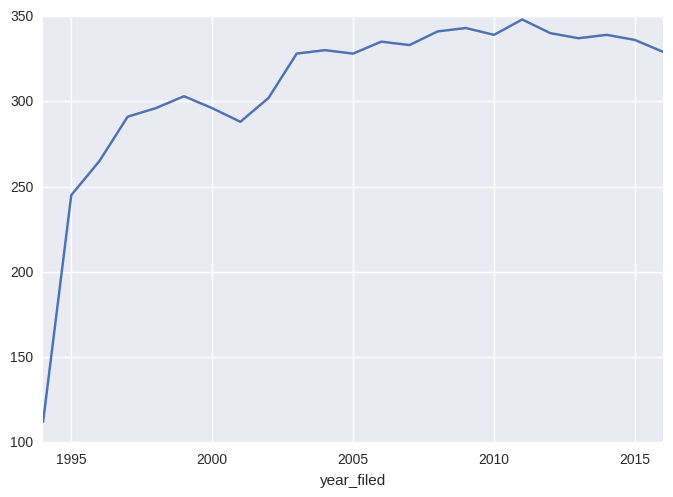

In [30]:
# Number of acts per year
unique_acts_per_year = act_df.groupby(["year_filed"])["clean_act_name"].nunique()
unique_acts_per_year.plot()

In [31]:
# Number of acts per year
unique_acts_per_cik = act_df.groupby(["company_cik"])["clean_act_name"].nunique()
unique_acts_per_cik.describe()

count    34224.000000
mean         5.909040
std          6.024014
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         68.000000
Name: clean_act_name, dtype: float64

In [32]:
act_presence_per_year = act_df.groupby(["year_filed", "company_cik"])["clean_act_name"].nunique()\
    .unstack().fillna(0).astype(int)

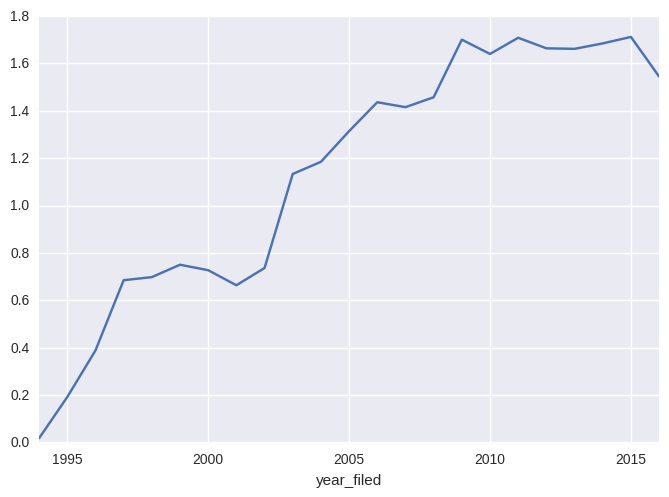

In [33]:
act_presence_per_year.mean(axis=1).plot()

In [34]:
# Get number of unique filings and CIKs per year
references_per_year = act_per_year.sum(axis=1)
filings_per_year = act_df.groupby(["year_filed"])["segment_id"].nunique()
cik_per_year = act_df.groupby(["year_filed"])["company_cik"].nunique()

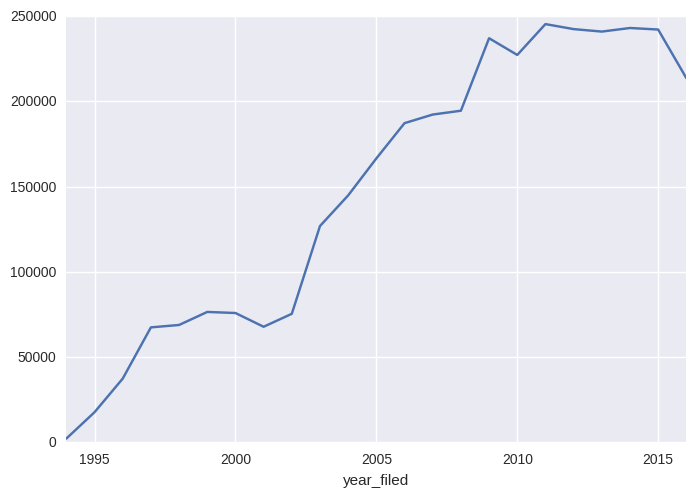

In [35]:
references_per_year.plot()

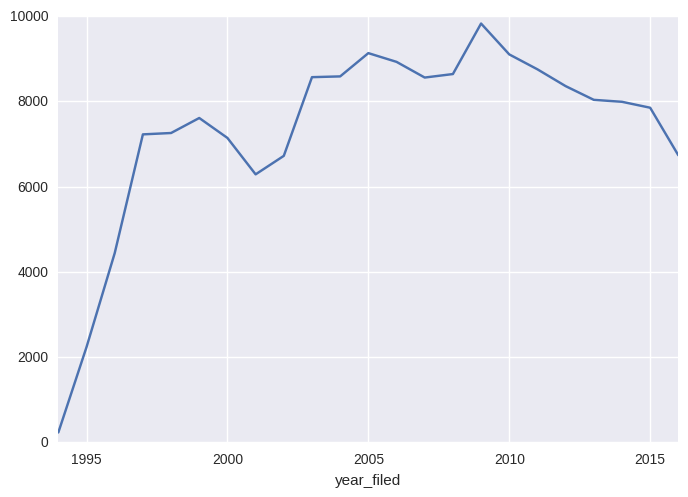

In [36]:
filings_per_year.plot()

In [37]:
act_df.loc[act_df["match_score"] > 0, :].shape

(3392667, 14)

In [38]:
act_df.loc[:, ]

company_cik                company_name  date_filed  segment_id  \
0           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
1           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
2           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
3           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
4           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
5           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
6           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
7           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
8           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
9           100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
10          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
11          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
12          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
13          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
14          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
15          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
16          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
17          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
18          100880.0  UNION OIL CO OF CALIFORNIA  1994-03-31   9134522.0   
19          107681.0       WINN DIXIE STORES INC  1994-09-16   9134271.0   
20          107681.0       WINN DIXIE STORES INC  1994-09-16   9134271.0   
21          107681.0       WINN DIXIE STORES INC  1994-09-16   9134271.0   
22          107681.0       WINN DIXIE STORES INC  1994-09-16   9134271.0   
23          100726.0                   UNIFI INC  1994-09-21   9134164.0   
24          100726.0                   UNIFI INC  1994-09-21   9134164.0   
25          100726.0                   UNIFI INC  1994-09-21   9134164.0   
26          100726.0                   UNIFI INC  1994-09-21   9134164.0   
27          106040.0        WESTERN DIGITAL CORP  1994-09-23   9133988.0   
28          106040.0        WESTERN DIGITAL CORP  1994-09-23   9133988.0   
29          106040.0        WESTERN DIGITAL CORP  1994-09-23   9133988.0   
...              ...                         ...         ...         ...   
3606858     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606859     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606860     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606861     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606862     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606863     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606864     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606865     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606866     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606867     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606868     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606869     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606870     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606871     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606872     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606873     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606874     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606875     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606876     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606877     934445.0         Eagle Mountain Corp  2016-09-12   9245666.0   
3606878     934445.0         Eagle Mountain Corp  2016-09

In [39]:
3392667 / act_df["segment_id"].nunique()

20.171033621689112

## Acts per Filing

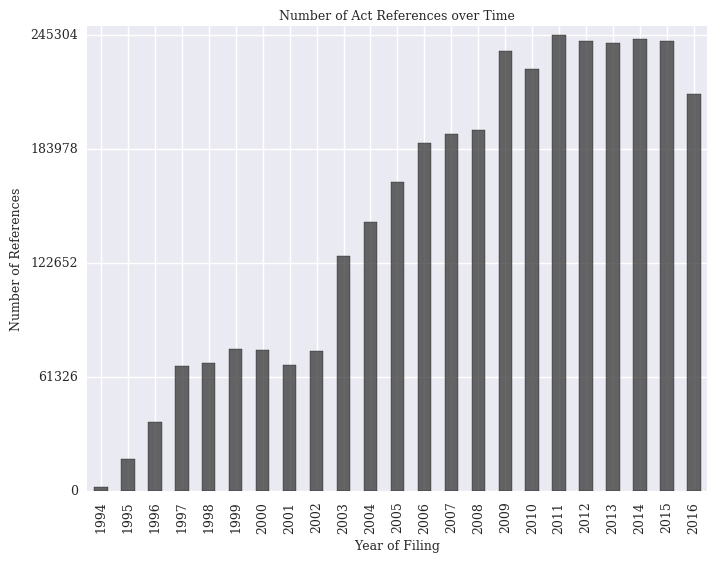

In [40]:
# Build normalize dataframe
total_act_per_year = act_per_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
total_act_per_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Act References over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of References", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, total_act_per_year.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "total_act_per_year.png"), dpi=300)
f.savefig(os.path.join("../figures/", "total_act_per_year.pdf"), dpi=300)

In [41]:
filings_per_year  = act_df.groupby("year_filed")["segment_id"].nunique()
cik_per_year  = act_df.groupby("year_filed")["company_cik"].nunique()
references_per_year = act_df.groupby("year_filed")["company_cik"].count()

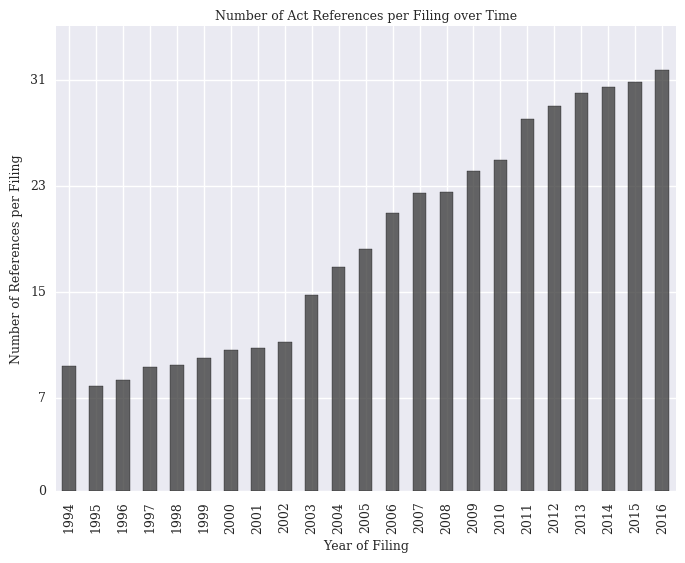

In [42]:
# Build normalize dataframe
act_per_filing_year = act_per_year.copy()
for i in act_per_filing_year.index:
    act_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_act_per_filing_year = act_per_filing_year.sum(axis=1)

f, ax = plt.subplots(figsize=(8, 6))
average_act_per_filing_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Act References per Filing over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, average_act_per_filing_year.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of References per Filing", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, average_act_per_filing_year.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "acts_per_filing.png"), dpi=300)
f.savefig(os.path.join("../figures/", "acts_per_filing.pdf"), dpi=300)

In [43]:
act_per_year = act_df.groupby(["year_filed", "clean_act_name"])["company_cik"].count()\
    .unstack().fillna(0).astype(int)

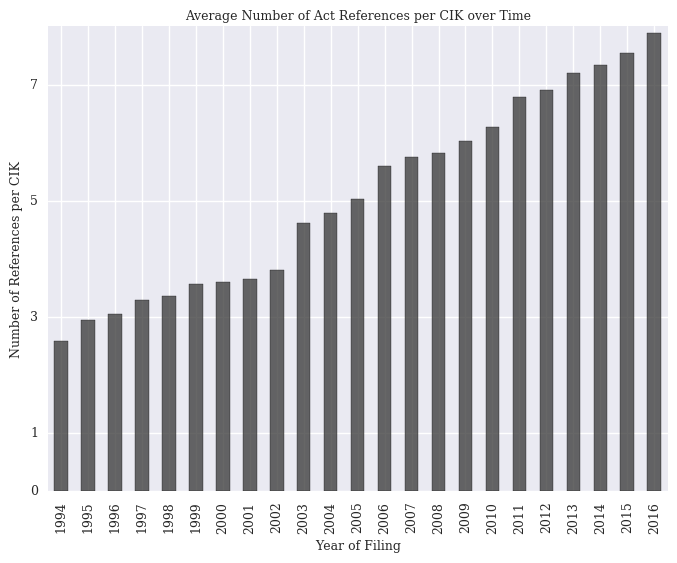

In [44]:
cik_act_count_df = act_df.groupby(["year_filed", "company_cik"])["clean_act_name"].nunique().unstack()
cik_act_count_ts = cik_act_count_df.mean(axis=1)

f, ax = plt.subplots(figsize=(8, 6))
cik_act_count_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Number of Act References per CIK over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, cik_act_count_ts.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of References per CIK", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, cik_act_count_ts.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "acts_per_cik_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "acts_per_cik_ts.pdf"), dpi=300)

In [45]:
filing_act_count_df = act_df.groupby(["year_filed", "segment_id"])["clean_act_name"].nunique().unstack()
filing_act_mean_ts = cik_act_count_df.mean(axis=1)
filing_act_mean_ts.to_csv("../data/output/figure3_data.csv")

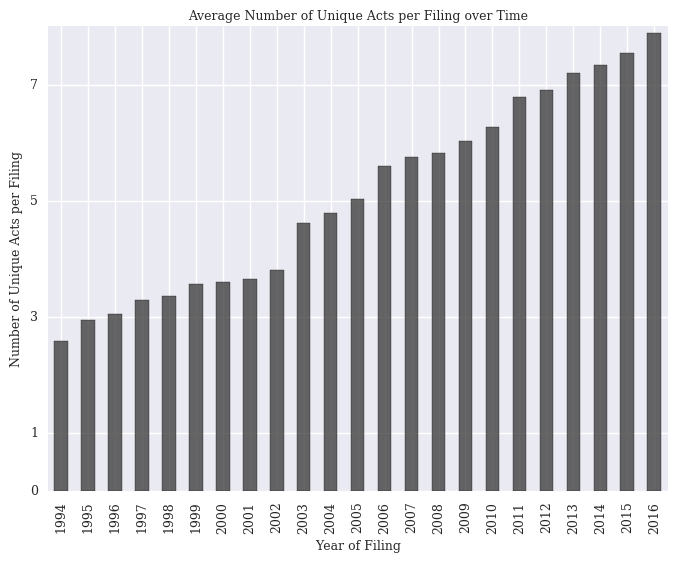

In [46]:
filing_act_count_df = act_df.groupby(["year_filed", "segment_id"])["clean_act_name"].nunique().unstack()
filing_act_mean_ts = cik_act_count_df.mean(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
filing_act_mean_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Number of Unique Acts per Filing over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, filing_act_mean_ts.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of Unique Acts per Filing", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, filing_act_mean_ts.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "filing_unique_act_mean_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "filing_unique_act_mean_ts.pdf"), dpi=300)

In [47]:
# Create base figure path
base_figure_path = "../figures/act/"
try:
    os.makedirs(base_figure_path)
except Exception as e:
    pass

# Setup PLOS ONE font dictionary
plos_one_fontdict = {'fontname': "Serif", 'fontsize': 9}

for act_name in act_per_year.columns:
    print(act_name)
    f, ax = plt.subplots(figsize=(8, 6))
    act_per_filing_year.loc[:, act_name].plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
    plt.title(act_name, fontdict=plos_one_fontdict)
    
    # x-axis
    plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
    ax.set_xticklabels(list(map(str, act_per_filing_year.index)), fontdict=plos_one_fontdict)
    
    # y-axis
    plt.ylabel("Number of References", fontdict=plos_one_fontdict)
    y_tick_list = numpy.around(numpy.linspace(0, act_per_filing_year.loc[:, act_name].max(), 5), decimals=3)
    ax.set_yticks(y_tick_list)
    ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)
    
    # Write to figure files
    clean_act_name = act_name.replace(" ", "_").replace("-", "_")
    f.savefig(os.path.join(base_figure_path, "act_per_filing_count_{0}.png".format(clean_act_name)), dpi=300)
    f.savefig(os.path.join(base_figure_path, "act_per_filing_count_{0}.pdf".format(clean_act_name)), dpi=300)
    
    # Cleanup
    plt.close(f)
    del f
    del ax
    gc.collect()

21st Century Communications And Video Accessibility
Accountable Pipeline Safety and Partnership
Age Discrimination In Employment
Air Transportation Safety And System Stabilization
Airline Deregulation
Airport Noise And Capacity
Alternative Energy Portfolio Standards
American Clean Energy And Security
American Jobs Creation
American Microturbine Manufacturing and Clean Energy Deployment
American Recovery And Reinvestment
American Taxpayer Relief
Americans With Disabilities
Anti Drug Abuse
Anti Kickback
Anti Price Discrimination
Antitrust Procedures And Penalties
Arms Export Control
Assignment Of Claims
Atomic Energy
Automobile Dealers' Day in Court
Aviation And Transportation Security
Aviation Noise And Capacity
Aviation Safety And Noise Abatement
Aviation Safety and Capacity Expansion
Balanced Budget
Balanced Budget Refinement
Bank Enterprise
Bank Holding Company
Bank Secrecy
Bank Service Company
Banking
Bankruptcy Reform
Benefits Improvement And Protection
Black Lung Benefits
Black Lu

In [48]:
# Get the mean profile
cik_act_df = act_df.groupby(["company_cik", "clean_act_name"])["segment_id"]\
    .nunique().unstack().fillna(0.0)

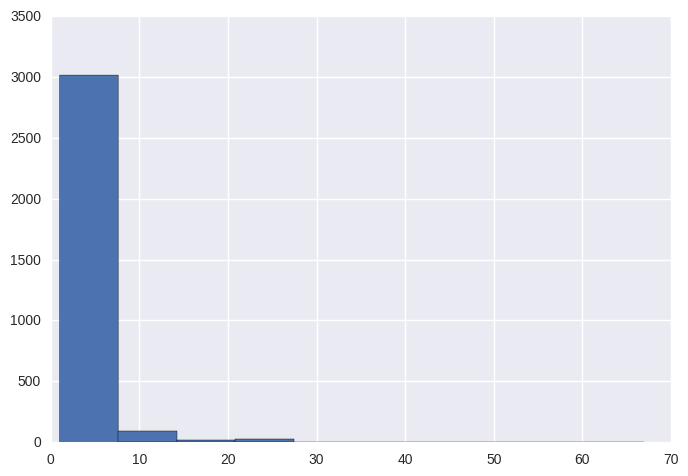

In [49]:
act_df.loc[(act_df["year_filed"] == 2000) & (act_df["clean_act_name"] == "Securities"), :].groupby("segment_id")["company_cik"].count().hist()

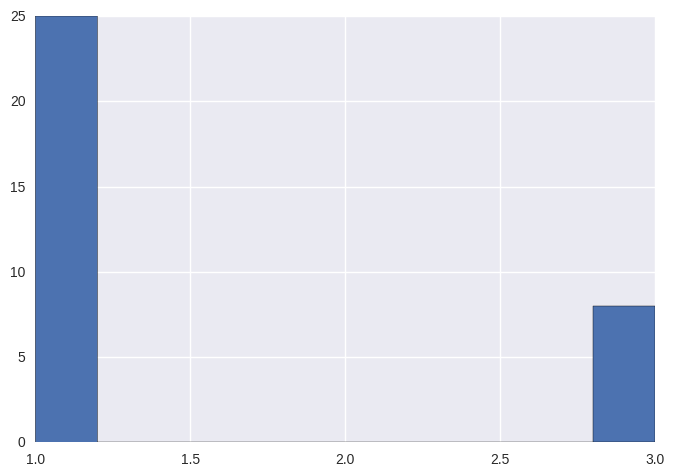

In [50]:
act_df.loc[(act_df["year_filed"] == 2010) & (act_df["clean_act_name"] == "Migratory Bird Treaty"), :].groupby("segment_id")["company_cik"].count().hist()

In [51]:
q = 90

# Build yearly median list
year_median_cik_list = []
year_adjusted_act_list = []
year_list = []
for year, year_act_df in act_df.groupby("year_filed"):
    # Get the grouping by CIK/act
    year_cik_act_df = year_act_df.groupby(["company_cik", "clean_act_name"])["segment_id"]\
        .count().unstack().fillna(0.0)
    year_median_cik_act_df = year_cik_act_df.quantile(q / 100.)
    
    # Setup raw and adjusted CIK data frames
    adjusted_cik_act_df = year_cik_act_df.copy()

    # Adjust by current quantile
    for i in range(year_cik_act_df.shape[0]):
        # Adjust each row
        adjusted_cik_act_df.iloc[i, :] -= year_median_cik_act_df
        adjusted_cik_act_df.iloc[i, :].fillna(0.0, inplace=True)
        neg_index = numpy.where(adjusted_cik_act_df.iloc[i, :] < 0)[0]
        if neg_index.shape[0] > 0:
            adjusted_cik_act_df.iloc[i, neg_index] = 0

    # Track
    year_list.append(year)
    year_median_cik_list.append(year_median_cik_act_df)
    year_adjusted_act_list.append(adjusted_cik_act_df.mean())
    
# Output
ts_year_median_cik_df = pandas.concat(year_median_cik_list, axis=1).fillna(0).astype(int)
ts_year_median_cik_df.columns = year_list
ts_act_subset = ts_year_median_cik_df.index[(ts_year_median_cik_df.sum(axis=1) > 0)]
ts_year_median_cik_df.loc[ts_act_subset, :].T.to_csv("../data/output/act_profile_q{0}_ts.csv".format(q),
                                                    index=True, encoding="utf-8")

# Output adjusted matrix
ts_year_adjusted_act_df = pandas.concat(year_adjusted_act_list, axis=1).fillna(0).astype(int)
ts_year_adjusted_act_df.columns = year_list
ts_year_adjusted_act_df.T.to_csv("../data/output/adjusted__q{0}_act_count_per_year_ts.csv".format(q),
                                                    index=True, encoding="utf-8")

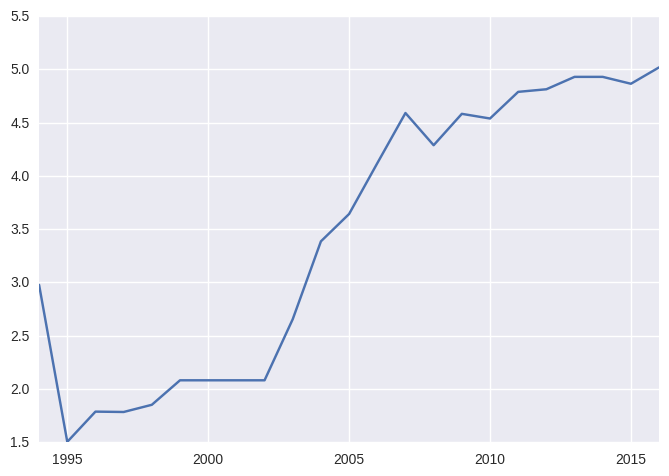

In [52]:
ts_year_median_cik_df.loc[ts_act_subset, :].T.std(axis=1).plot()

In [53]:
ts_year_median_cik_df.T.sum().sort_values()

21st Century Communications And Video Accessibility                    0
National Labor Relations                                               0
National Housing                                                       0
National Flood Insurance Reform                                        0
National Flood Insurance                                               0
National Environmental Policy                                          0
National Energy Policy                                                 0
National Emission Standards                                            0
National Dam Inspection                                                0
National Cooperative Research And Development                          0
National Manufactured Housing Construction And Safety Standards        0
National Bank                                                          0
Multi Family Assisted Housing Reform And Affordability                 0
Multi Employer Pension Plan Amendments             

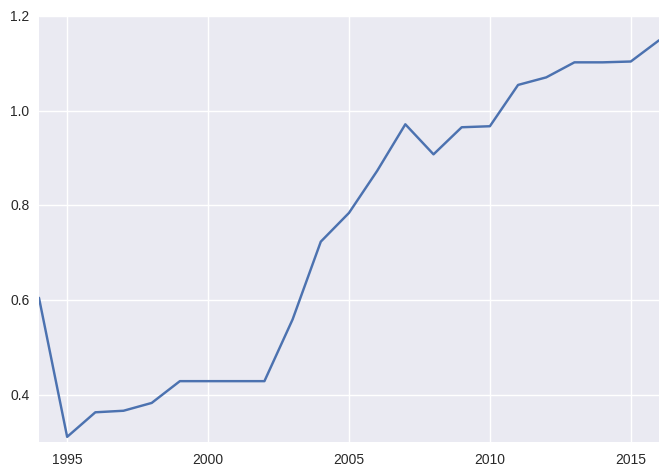

In [54]:
ts_year_median_cik_df.T.std(axis=1).plot()

In [55]:
act_df.shape[0] + agency_df.shape[0]

4648331

In [56]:
(act_df.shape[0], agency_df.shape[0])

(3392667, 1255664)

In [57]:
ts_year_median_cik_df.shape

(401, 23)

In [58]:
ts_year_median_cik_df.T.sum().sort_values().tail(10)

Foreign Corrupt Practices                                              5
American Jobs Creation                                                 6
Patient Protection And Affordable Care                                 6
Clean Air                                                              7
Comprehensive Environmental Response, Compensation, And Liability     10
Private Securities Litigation Reform                                  20
Dodd Frank Wall Street Reform And Consumer Protection                 41
Securities                                                            98
Sarbanes Oxley                                                       101
Securities Exchange                                                  297
dtype: int64

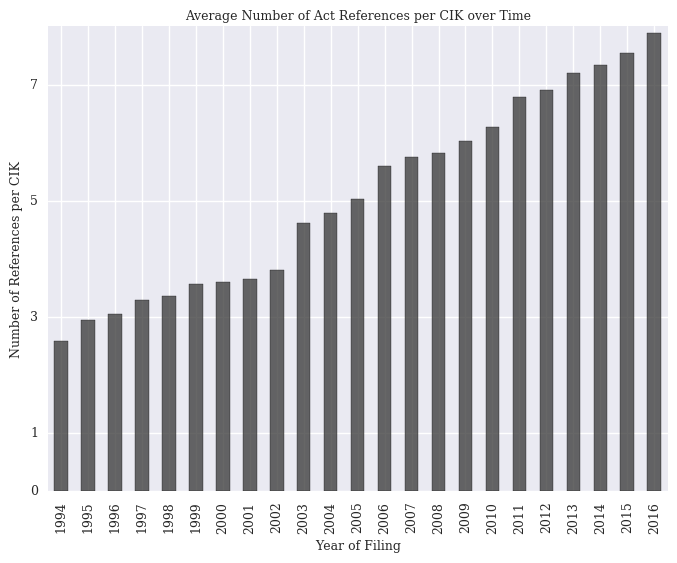

In [59]:
cik_act_count_df = act_df.groupby(["year_filed", "company_cik"])["clean_act_name"].nunique().unstack()
cik_act_count_ts = cik_act_count_df.mean(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
cik_act_count_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Number of Act References per CIK over Time", fontdict=plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=plos_one_fontdict)
ax.set_xticklabels(list(map(str, cik_act_count_ts.index)), fontdict=plos_one_fontdict)

# y-axis
plt.ylabel("Number of References per CIK", fontdict=plos_one_fontdict)
y_tick_list = numpy.linspace(0, cik_act_count_ts.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "acts_per_cik_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "acts_per_cik_ts.pdf"), dpi=300)

In [60]:
act_df.loc[act_df["clean_act_name"].str.contains("Year"), :].sort_values("date_filed").tail()

company_cik                   company_name  date_filed  segment_id  \
2885899     875523.0      LITTLE SWITZERLAND INC/DE  2000-10-20   8874543.0   
2889839     886744.0              GERON CORPORATION  2001-03-23   8864412.0   
2367629      65195.0                     MESTEK INC  2001-03-30   8855634.0   
2895064     818813.0                  BITSTREAM INC  2001-04-02   8853068.0   
118050     1040328.0  CHAMPPS ENTERTAINMENT INC/ MA  2001-10-02   8839311.0   

         segment_file_name                            segment_description  \
2885899           0001.txt                                      FORM 10-K   
2889839    f70239e10-k.txt  FORM 10-K FISCAL YEAR ENDED DECEMBER 31, 2000   
2367629           0001.txt                         MESTEK, INC. 2000 10-K   
2895064  a2043091z10-k.htm                                           10-K   
118050         cmpp10k.txt                                      2001 10-K   

        segment_type                                  original_act_name  \
2885899         10-K     Year 2000 Information And Readiness Disclosure   
2889839         10-K  Foregoing Year 2000 Readiness Disclosures Is S...   
2367629         10-K     Year 2000 Information And Readiness Disclosure   
2895064         10-K     Year 2000 Information And Readiness Disclosure   
118050          10-K     Year 2000 Information And Readiness Disclosure   

         original_act_year                                  clean_act_name  \
2885899                NaN  Year 2000 Information And Readiness Disclosure   
2889839                NaN  Year 2000 Information And Readiness Disclosure   
2367629                NaN  Year 2000 Information And Readiness Disclosure   
2895064                NaN  Year 2000 Information And Readiness Disclosure   
118050                 NaN  Year 2000 Information And Readiness Disclosure   

         clean_act_year  match_score              match_type  year_filed  
2885899          1998.0          100      no_year_exact_name        2000  
2889839          1998.0           90  no_year_fuzzy_no_remap        2001  
2367629          1998.0          100      no_year_exact_name        2001  
2895064          1998.0          100      no_year_exact_name        2001  
118050           1998.0          100      no_year_exact_name        2001

In [61]:
act_df.loc[act_df["clean_act_name"] == "Year 2000 Information and Readiness Disclosure", :].sort_values("date_filed").tail(5)

Empty DataFrame
Columns: [company_cik, company_name, date_filed, segment_id, segment_file_name, segment_description, segment_type, original_act_name, original_act_year, clean_act_name, clean_act_year, match_score, match_type, year_filed]
Index: []

In [62]:
act_df.loc[act_df["clean_act_name"] == "Civil Rights", :].to_csv("civil_rights.csv")

In [63]:
# Mean pairwise distance across time

l = []

for year, year_act_df in act_df.groupby("year_filed"):
    year_company_profile_df = (year_act_df.groupby(["company_cik", "clean_act_name"])["segment_id"].count().unstack() > 0).astype(int)
    P = scipy.spatial.distance.pdist(year_company_profile_df.values, metric="cityblock")
    l.append(numpy.mean(P))

In [64]:
year_company_profile_df.columns

Index(['21st Century Communications And Video Accessibility',
       'Accountable Pipeline Safety and Partnership',
       'Age Discrimination In Employment',
       'Air Transportation Safety And System Stabilization',
       'Airline Deregulation', 'Airport Noise And Capacity',
       'American Clean Energy And Security', 'American Jobs Creation',
       'American Recovery And Reinvestment', 'American Taxpayer Relief',
       ...
       'Uniformed Services Employment And Reemployment Rights',
       'Uniting And Strengthening America By Providing Appropriate Tools Required To Intercept And Obstruct Terrorism',
       'Usec Privatization', 'Veterans Health Care ',
       'Virginia Electric Utility Restructuring', 'Water Power',
       'Water Quality', 'Worker Adjustment And Retraining Notification',
       'Worker, Homeownership, And Business Assistance',
       'Worker, Retiree, And Employer Recovery'],
      dtype='object', name='clean_act_name', length=329)

In [65]:
scipy.spatial.distance.squareform(P)

array([[  0.,  11.,   4., ...,   5.,   6.,   9.],
       [ 11.,   0.,   9., ...,  10.,   9.,  12.],
       [  4.,   9.,   0., ...,   1.,   2.,   5.],
       ..., 
       [  5.,  10.,   1., ...,   0.,   1.,   4.],
       [  6.,   9.,   2., ...,   1.,   0.,   3.],
       [  9.,  12.,   5., ...,   4.,   3.,   0.]])

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = year_company_profile_df.values
X = linkage(Z, 'single', 'hamming')

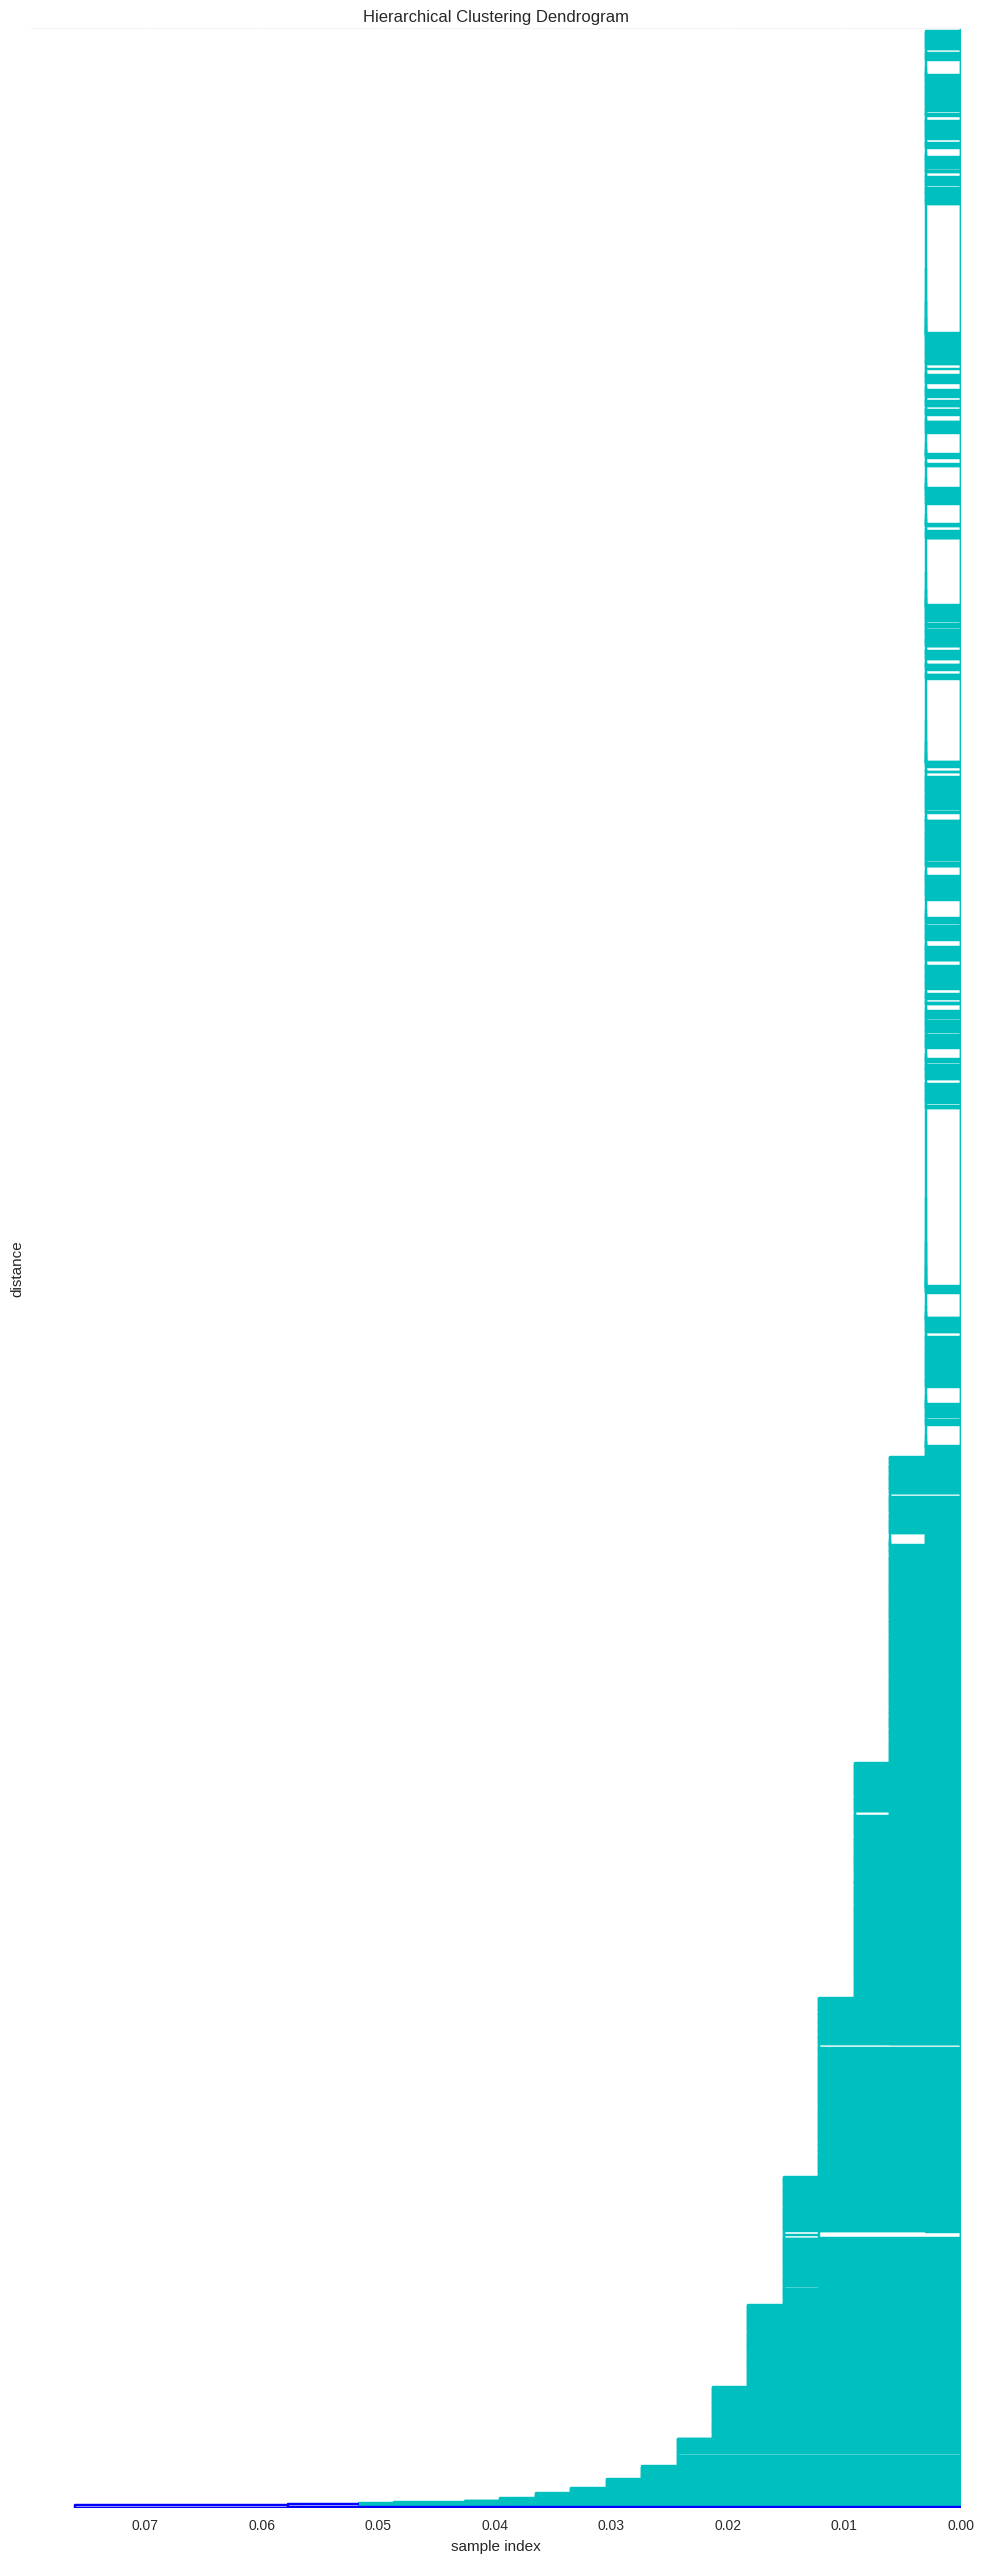

In [67]:
import sys
sys.setrecursionlimit(10000)

plt.figure(figsize=(12, 32))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    X,
    orientation="left",
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=[str('') for x in year_company_profile_df.index],
)
plt.show()
plt.savefig("../figures/act_dendrogram.png", dpi=300)

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = year_company_profile_df.values
X = linkage(Z.T, 'single', 'hamming')

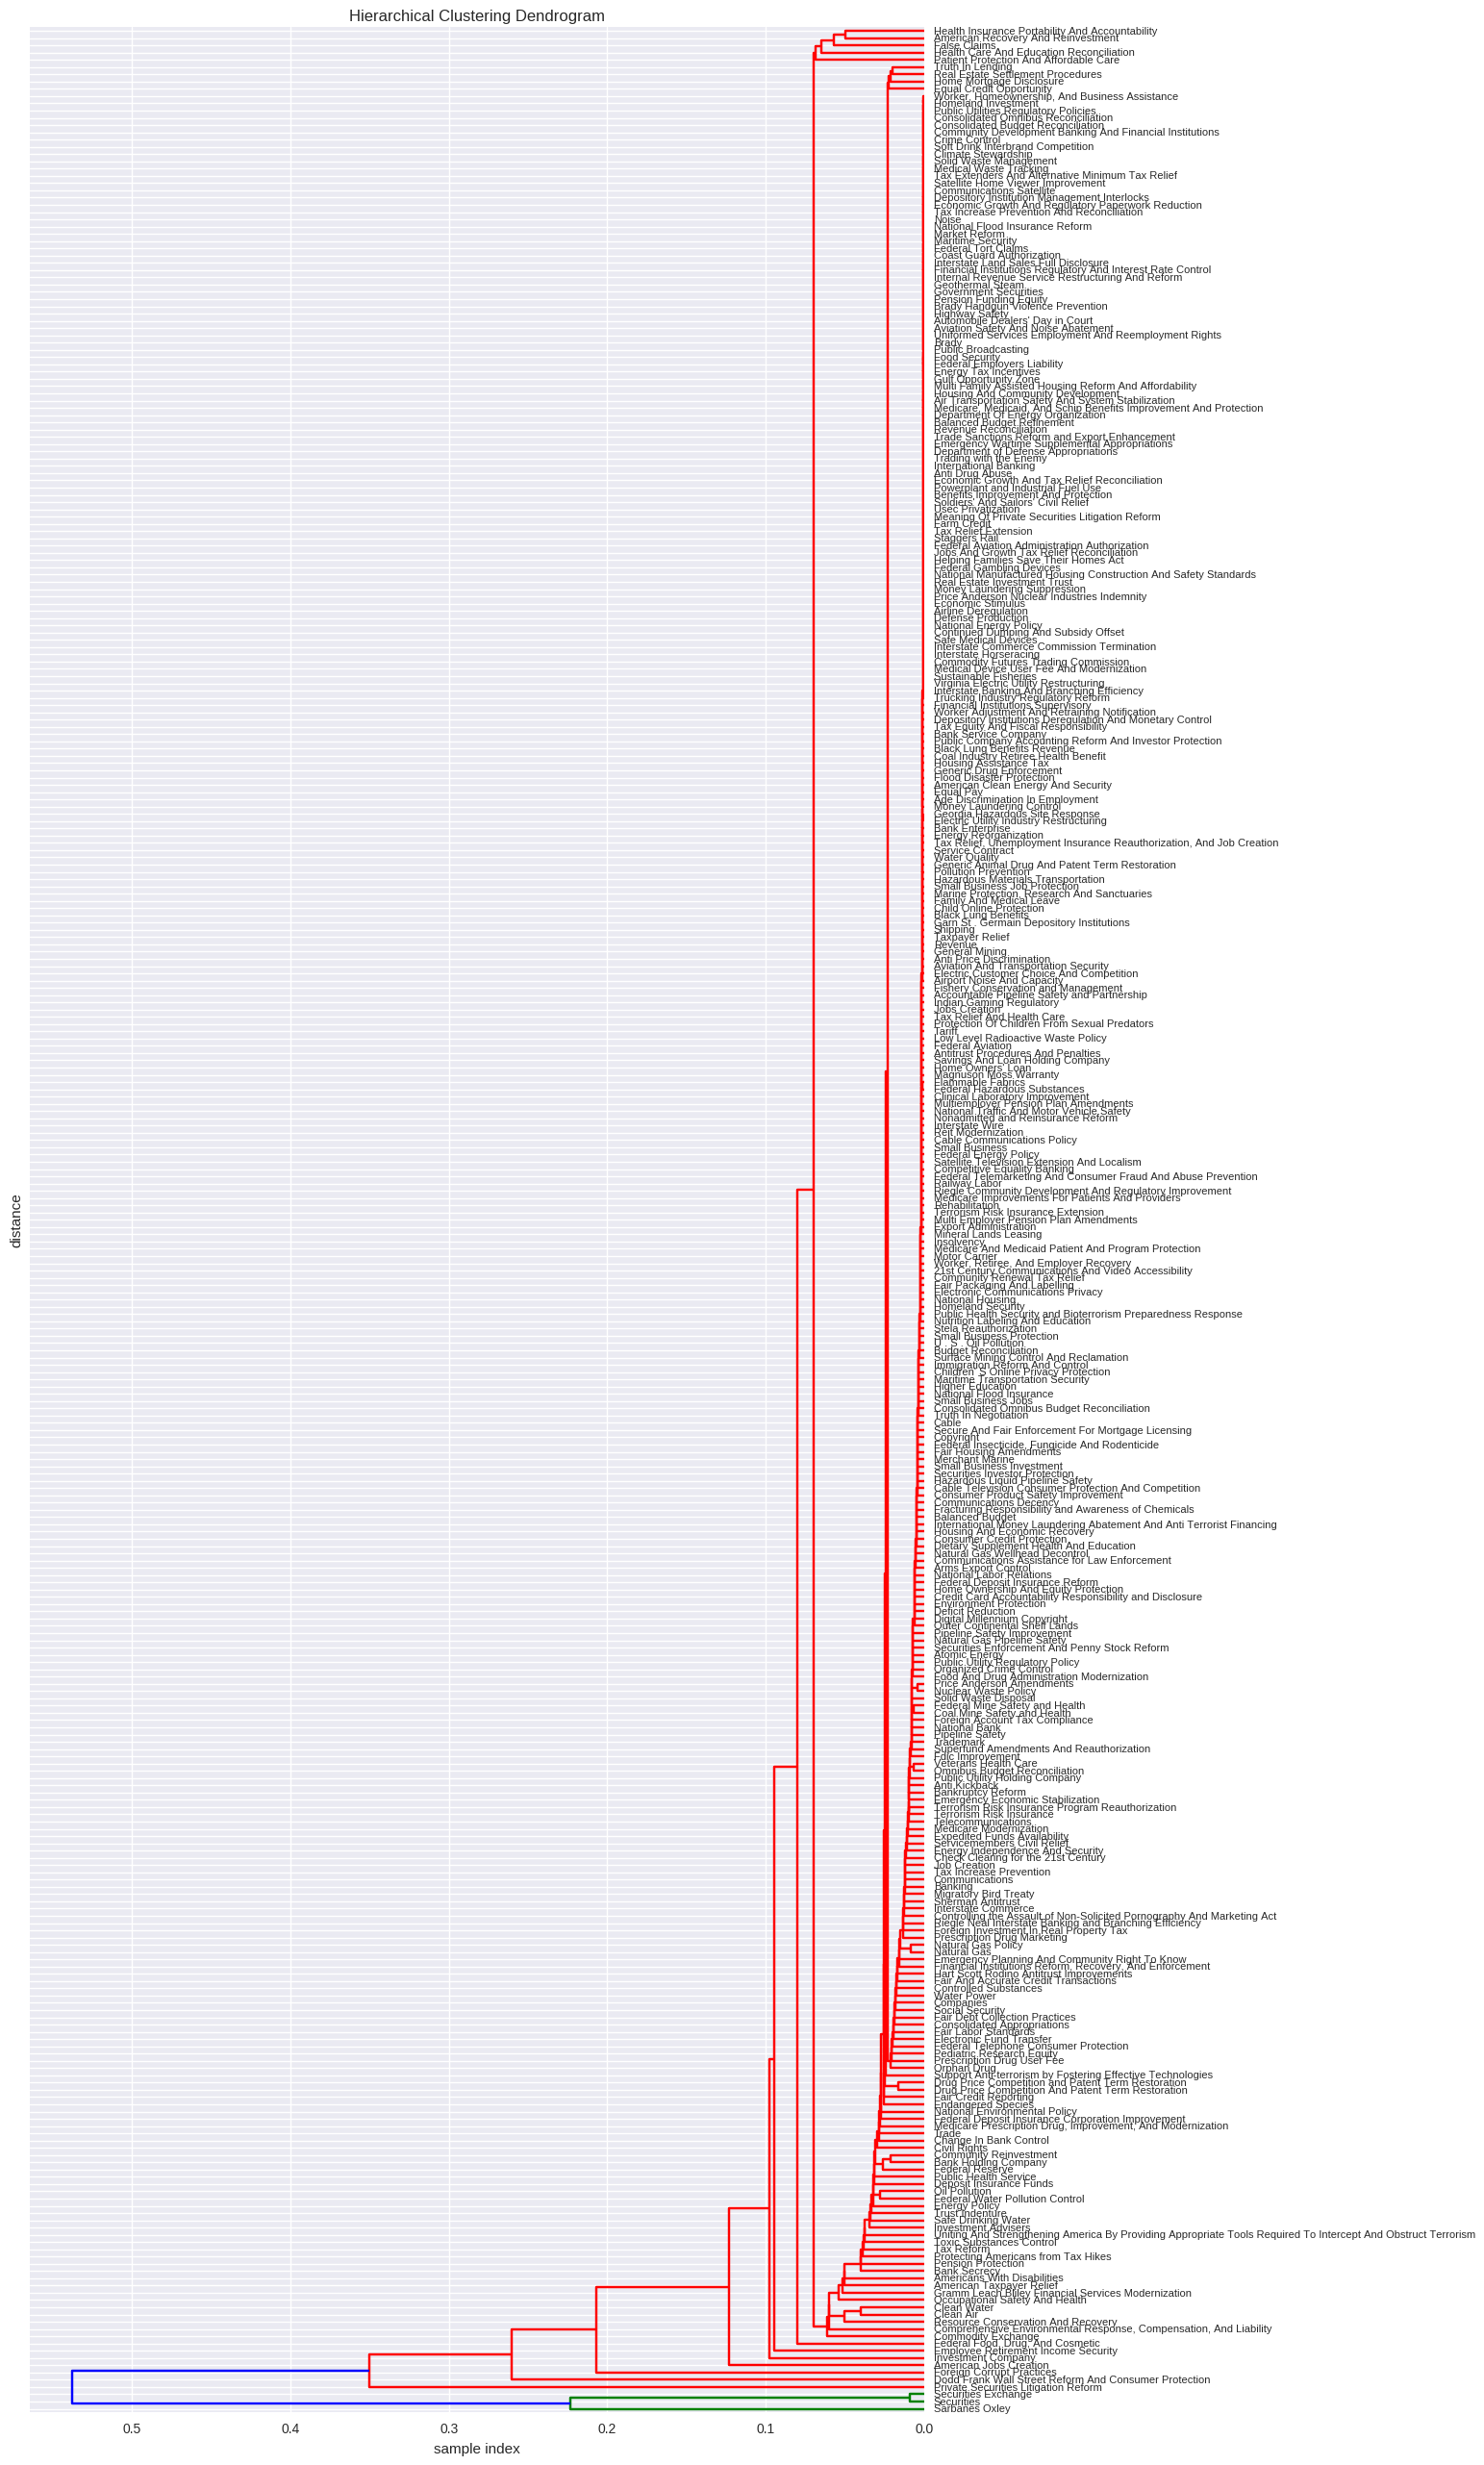

In [69]:
import sys
sys.setrecursionlimit(10000)

plt.figure(figsize=(12, 32))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    X,
    orientation="left",
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=[str(x) for x in year_company_profile_df.columns],
)
plt.show()
plt.savefig("../figures/act_dendrogram.png", dpi=300)

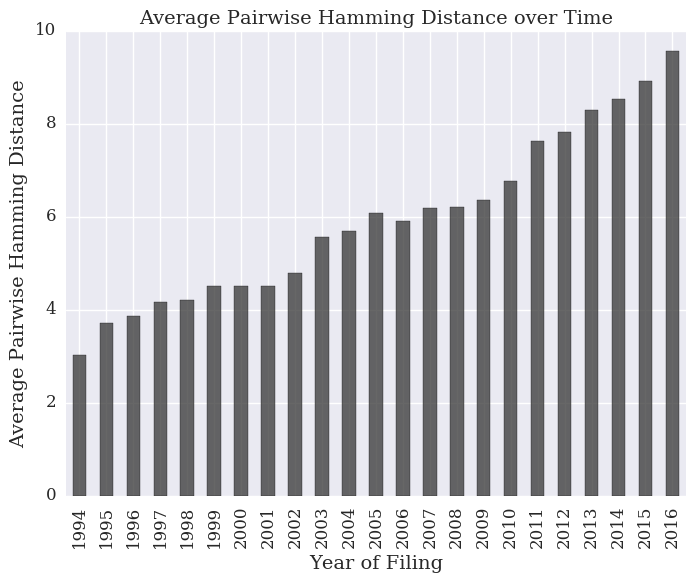

In [70]:
# Setup PLOS ONE font dictionary
title_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 14}
axis_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 12}

average_profile_distance_ts = pandas.DataFrame(l)
average_profile_distance_ts.columns = ["distance"]
average_profile_distance_ts.index = year_list

f, ax = plt.subplots(figsize=(8, 6))
average_profile_distance_ts["distance"].plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Pairwise Hamming Distance over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, average_profile_distance_ts.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Average Pairwise Hamming Distance", fontdict=title_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 10, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "average_distance_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "average_distance_ts.pdf"), dpi=300)

In [71]:
average_profile_distance_ts

distance
1994  3.030644
1995  3.707554
1996  3.873828
1997  4.169527
1998  4.203921
1999  4.510500
2000  4.521623
2001  4.520716
2002  4.782048
2003  5.561056
2004  5.693301
2005  6.089395
2006  5.921099
2007  6.189743
2008  6.202798
2009  6.368760
2010  6.777370
2011  7.623824
2012  7.834551
2013  8.299900
2014  8.526118
2015  8.914078
2016  9.564330

In [72]:
numpy.sign(average_profile_distance_ts.diff()).sum()

distance    18.0
dtype: float64

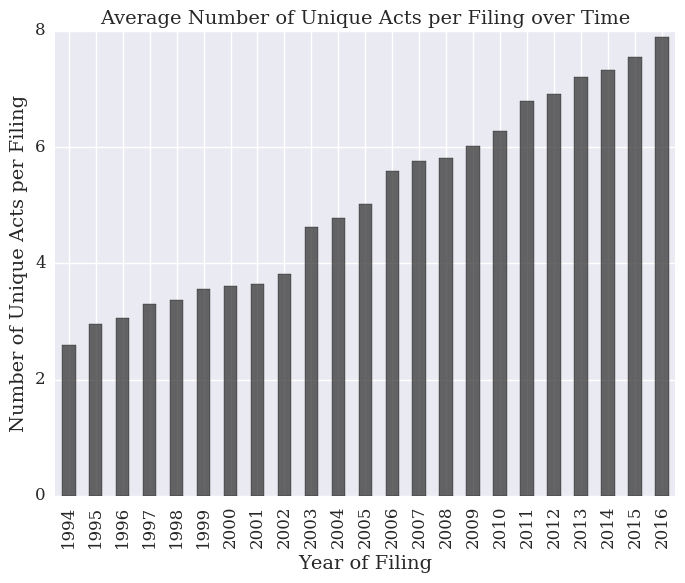

In [73]:
# Setup PLOS ONE font dictionary
title_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 14}
axis_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 12}

filing_act_count_df = act_df.groupby(["year_filed", "segment_id"])["clean_act_name"].nunique().unstack()
filing_act_mean_ts = cik_act_count_df.mean(axis=1)

f, ax = plt.subplots(figsize=(8, 6))
filing_act_mean_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Average Number of Unique Acts per Filing over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, filing_act_mean_ts.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of Unique Acts per Filing", fontdict=title_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 8, 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)

# Write to figure files
f.savefig(os.path.join("../figures/", "filing_unique_act_mean_ts.png"), dpi=300)
f.savefig(os.path.join("../figures/", "filing_unique_act_mean_ts.pdf"), dpi=300)

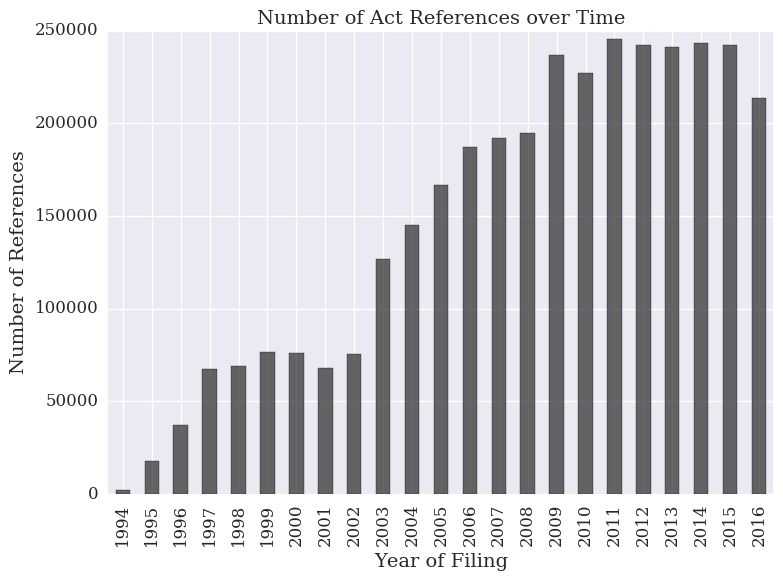

In [74]:
# Build normalize dataframe
total_act_per_year = act_per_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
total_act_per_year.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
plt.title("Number of Act References over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of References", fontdict=title_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 250000, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
plt.tight_layout()

# Write to figure files
f.savefig(os.path.join("../figures/", "total_act_per_year.png"), dpi=300)
f.savefig(os.path.join("../figures/", "total_act_per_year.pdf"), dpi=300)

In [75]:
# Build normalize dataframe
agency_count_per_year = agency_per_year.sum(axis=1)
total_act_per_year = act_per_year.sum(axis=1)

In [76]:
df = pandas.concat([total_act_per_year, agency_count_per_year], axis=1)
df.columns = ["act", "agency"]
df.to_csv("../data/output/figure1_data.csv")

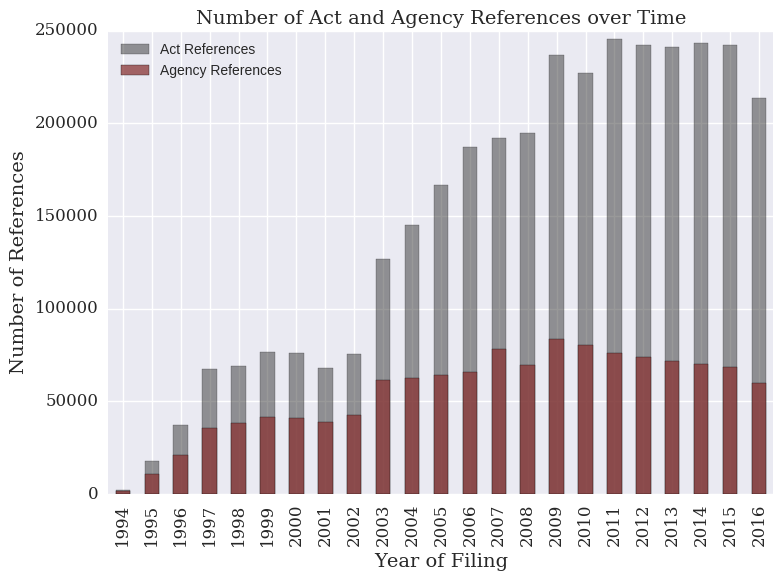

In [77]:
# Build normalize dataframe
agency_count_per_year = agency_per_year.sum(axis=1)
total_act_per_year = act_per_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
total_act_per_year.plot(kind="bar", color="#343434", alpha=0.5, ax=ax)
agency_count_per_year.plot(kind="bar", color="#893434", alpha=0.75, ax=ax)
plt.title("Number of Act and Agency References over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of References", fontdict=title_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 250000, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
plt.tight_layout()
plt.legend(("Act References", "Agency References"), loc="best")
# Write to figure files
f.savefig(os.path.join("../figures/", "total_act_per_year.png".format(clean_act_name)), dpi=300)
f.savefig(os.path.join("../figures/", "total_act_per_year.pdf".format(clean_act_name)), dpi=300)

In [78]:
# Build normalize dataframe
act_per_filing_year = act_per_year.copy()
for i in act_per_filing_year.index:
    act_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_act_per_filing_year = act_per_filing_year.sum(axis=1)
    
# Build normalize dataframe
agency_per_filing_year = agency_per_year.copy()
for i in act_per_filing_year.index:
    agency_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_agency_per_filing_year = agency_per_filing_year.sum(axis=1)

# Merge and output
df = pandas.concat([average_act_per_filing_year, average_agency_per_filing_year], axis=1)
df.columns = ["act", "agency"]
df.to_csv("../data/output/figure2_data.csv")

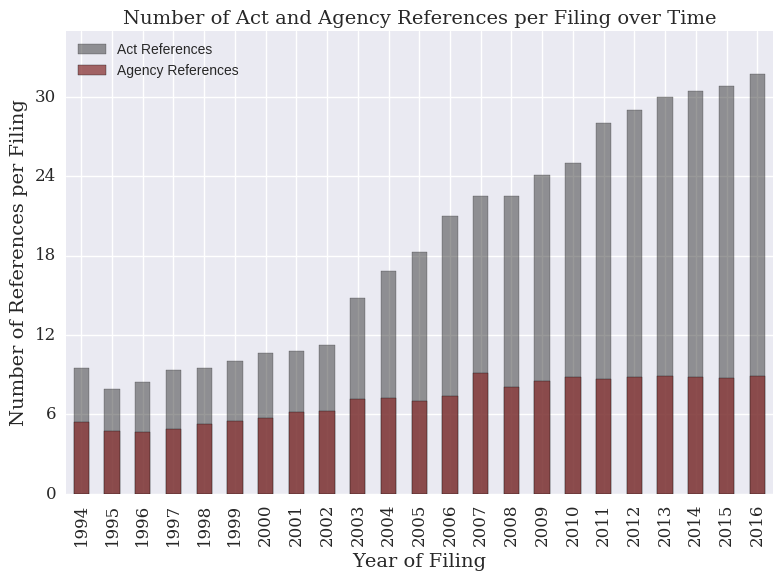

In [79]:
# Build normalize dataframe
act_per_filing_year = act_per_year.copy()
for i in act_per_filing_year.index:
    act_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_act_per_filing_year = act_per_filing_year.sum(axis=1)
    
# Build normalize dataframe
agency_per_filing_year = agency_per_year.copy()
for i in act_per_filing_year.index:
    agency_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_agency_per_filing_year = agency_per_filing_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
average_act_per_filing_year.plot(kind="bar", color="#343434", alpha=0.5, ax=ax)
average_agency_per_filing_year.plot(kind="bar", color="#893434", alpha=0.75, ax=ax)
plt.title("Number of Act and Agency References per Filing over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of References per Filing", fontdict=title_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 30, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
plt.tight_layout()
plt.legend(("Act References", "Agency References"), loc="best")

# Write to figure files
f.savefig(os.path.join("../figures/", "acts_per_filing_ts.png".format(clean_act_name)), dpi=300)
f.savefig(os.path.join("../figures/", "acts_per_filing_ts.pdf".format(clean_act_name)), dpi=300)